# **Weapon Detection**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Installing YoloV8**

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 116.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 95.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
!cp /content/drive/MyDrive/final1.v1i.yolov8.zip /content/

!unzip -q /content/final1.v1i.yolov8.zip -d /content/final_dataset

In [ ]:
yaml_text = """train: /content/final_dataset/train/images
val: /content/final_dataset/valid/images
test: /content/final_dataset/test/images
nc: 4
names: ['knife', 'gun', 'axe', 'stick-bat']
"""

with open("/content/data.yaml", "w") as f:
    f.write(yaml_text)

# **Training the model using a custom dataset with improved class balance**

In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8s.pt")
model.train(data="/content/data.yaml", epochs=25, imgsz=640)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 21.5M/21.5M [00:00<00:00, 39.1MB/s]


Ultralytics 8.3.123 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, fo

100%|██████████| 755k/755k [00:00<00:00, 97.9MB/s]

Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

Model summary: 129 layers, 11,137,148 parameters, 11,137,132 gradients, 28.7 GFLOPs

Transferred 349/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 315MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 820.0±217.5 MB/s, size: 55.1 KB)


train: Scanning /content/final_dataset/train/labels... 1633 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1633/1633 [00:00<00:00, 2286.50it/s]

train: New cache created: /content/final_dataset/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 242, len(boxes) = 2157. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 665.9±291.8 MB/s, size: 34.6 KB)


val: Scanning /content/final_dataset/valid/labels... 455 images, 0 backgrounds, 0 corrupt: 100%|██████████| 455/455 [00:00<00:00, 941.66it/s]

val: New cache created: /content/final_dataset/valid/labels.cache


WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 53, len(boxes) = 605. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      3.72G      1.583      2.865      1.747          3        640: 100%|██████████| 103/103 [00:35<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.33it/s]


                   all        455        605      0.272      0.223      0.182     0.0935

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      4.52G      1.726      2.522      1.847         11        640: 100%|██████████| 103/103 [00:31<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.41it/s]

                   all        455        605     0.0624      0.152     0.0427     0.0157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      4.56G      1.816      2.598      1.934          2        640: 100%|██████████| 103/103 [00:32<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.01it/s]


                   all        455        605     0.0947      0.139     0.0633     0.0249

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      4.61G      1.834      2.654       1.95          6        640: 100%|██████████| 103/103 [00:31<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.91it/s]


                   all        455        605      0.243      0.228      0.147      0.056

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      4.64G      1.737      2.556      1.904          4        640: 100%|██████████| 103/103 [00:31<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.41it/s]

                   all        455        605      0.193      0.233      0.139     0.0421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      4.68G      1.716        2.5      1.866          1        640: 100%|██████████| 103/103 [00:31<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.75it/s]

                   all        455        605      0.237      0.355      0.207     0.0834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25       4.7G       1.66      2.329      1.805          2        640: 100%|██████████| 103/103 [00:31<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.47it/s]

                   all        455        605      0.399      0.322      0.299      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      4.75G      1.566      2.259      1.756          5        640: 100%|██████████| 103/103 [00:32<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.90it/s]

                   all        455        605      0.325      0.345      0.279      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      4.79G       1.54      2.162      1.749          2        640: 100%|██████████| 103/103 [00:31<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.12it/s]

                   all        455        605      0.511      0.454      0.446      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      4.83G      1.507      2.095      1.715          1        640: 100%|██████████| 103/103 [00:32<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.40it/s]

                   all        455        605      0.514      0.366      0.411      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      4.85G      1.497      2.026      1.672          4        640: 100%|██████████| 103/103 [00:31<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.77it/s]

                   all        455        605      0.643      0.459      0.526      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25       4.9G      1.441      1.895      1.646          3        640: 100%|██████████| 103/103 [00:31<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.36it/s]

                   all        455        605      0.554      0.456      0.476      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      4.93G        1.4      1.815      1.611          2        640: 100%|██████████| 103/103 [00:32<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.95it/s]

                   all        455        605      0.602       0.53      0.566      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      4.97G      1.342      1.779      1.562          0        640: 100%|██████████| 103/103 [00:31<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.03it/s]


                   all        455        605      0.577      0.548      0.567      0.321

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      4.99G      1.341      1.723      1.572         12        640: 100%|██████████| 103/103 [00:31<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.46it/s]

                   all        455        605      0.664      0.564      0.595       0.34


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.04G      1.361      1.538      1.653          2        640: 100%|██████████| 103/103 [00:31<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.76it/s]

                   all        455        605      0.672      0.563      0.651      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.08G      1.325       1.39      1.591          1        640: 100%|██████████| 103/103 [00:30<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.48it/s]

                   all        455        605      0.675      0.623      0.671      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.12G      1.246      1.341      1.543          1        640: 100%|██████████| 103/103 [00:30<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.82it/s]

                   all        455        605      0.735      0.621      0.692      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.14G      1.248      1.232      1.544          1        640: 100%|██████████| 103/103 [00:30<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.49it/s]

                   all        455        605      0.781      0.605      0.725      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.19G      1.189      1.178      1.486          1        640: 100%|██████████| 103/103 [00:30<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.83it/s]

                   all        455        605       0.79      0.622      0.716      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.23G      1.151      1.146       1.47          1        640: 100%|██████████| 103/103 [00:30<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.47it/s]

                   all        455        605      0.772      0.602      0.734      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.26G      1.119      1.045      1.424          1        640: 100%|██████████| 103/103 [00:30<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.80it/s]

                   all        455        605      0.761      0.686      0.759      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.29G      1.084      1.003      1.404          1        640: 100%|██████████| 103/103 [00:30<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.48it/s]

                   all        455        605      0.792      0.704      0.783      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.33G      1.048     0.9209      1.362          1        640: 100%|██████████| 103/103 [00:30<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.91it/s]

                   all        455        605      0.814      0.693      0.797      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.37G      1.029     0.9218      1.345          1        640: 100%|██████████| 103/103 [00:30<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.50it/s]

                   all        455        605      0.807      0.694      0.796      0.531



25 epochs completed in 0.257 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.123 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.20it/s]


                   all        455        605      0.809      0.695      0.798      0.531
                 knife        143        166      0.763      0.699      0.778      0.508
                   gun        130        178      0.834      0.635      0.729      0.529
                   axe         35         46       0.84      0.685      0.874        0.6
             stick-bat        147        215        0.8      0.763      0.812      0.487
Speed: 0.3ms preprocess, 4.8ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cd32b663610>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

In [ ]:
!cp runs/detect/train/weights/best.pt /content/drive/MyDrive/best.pt

In [ ]:
!cp -r runs/detect/train /content/drive/MyDrive/yolo_training_logs1/

# **Traning result**

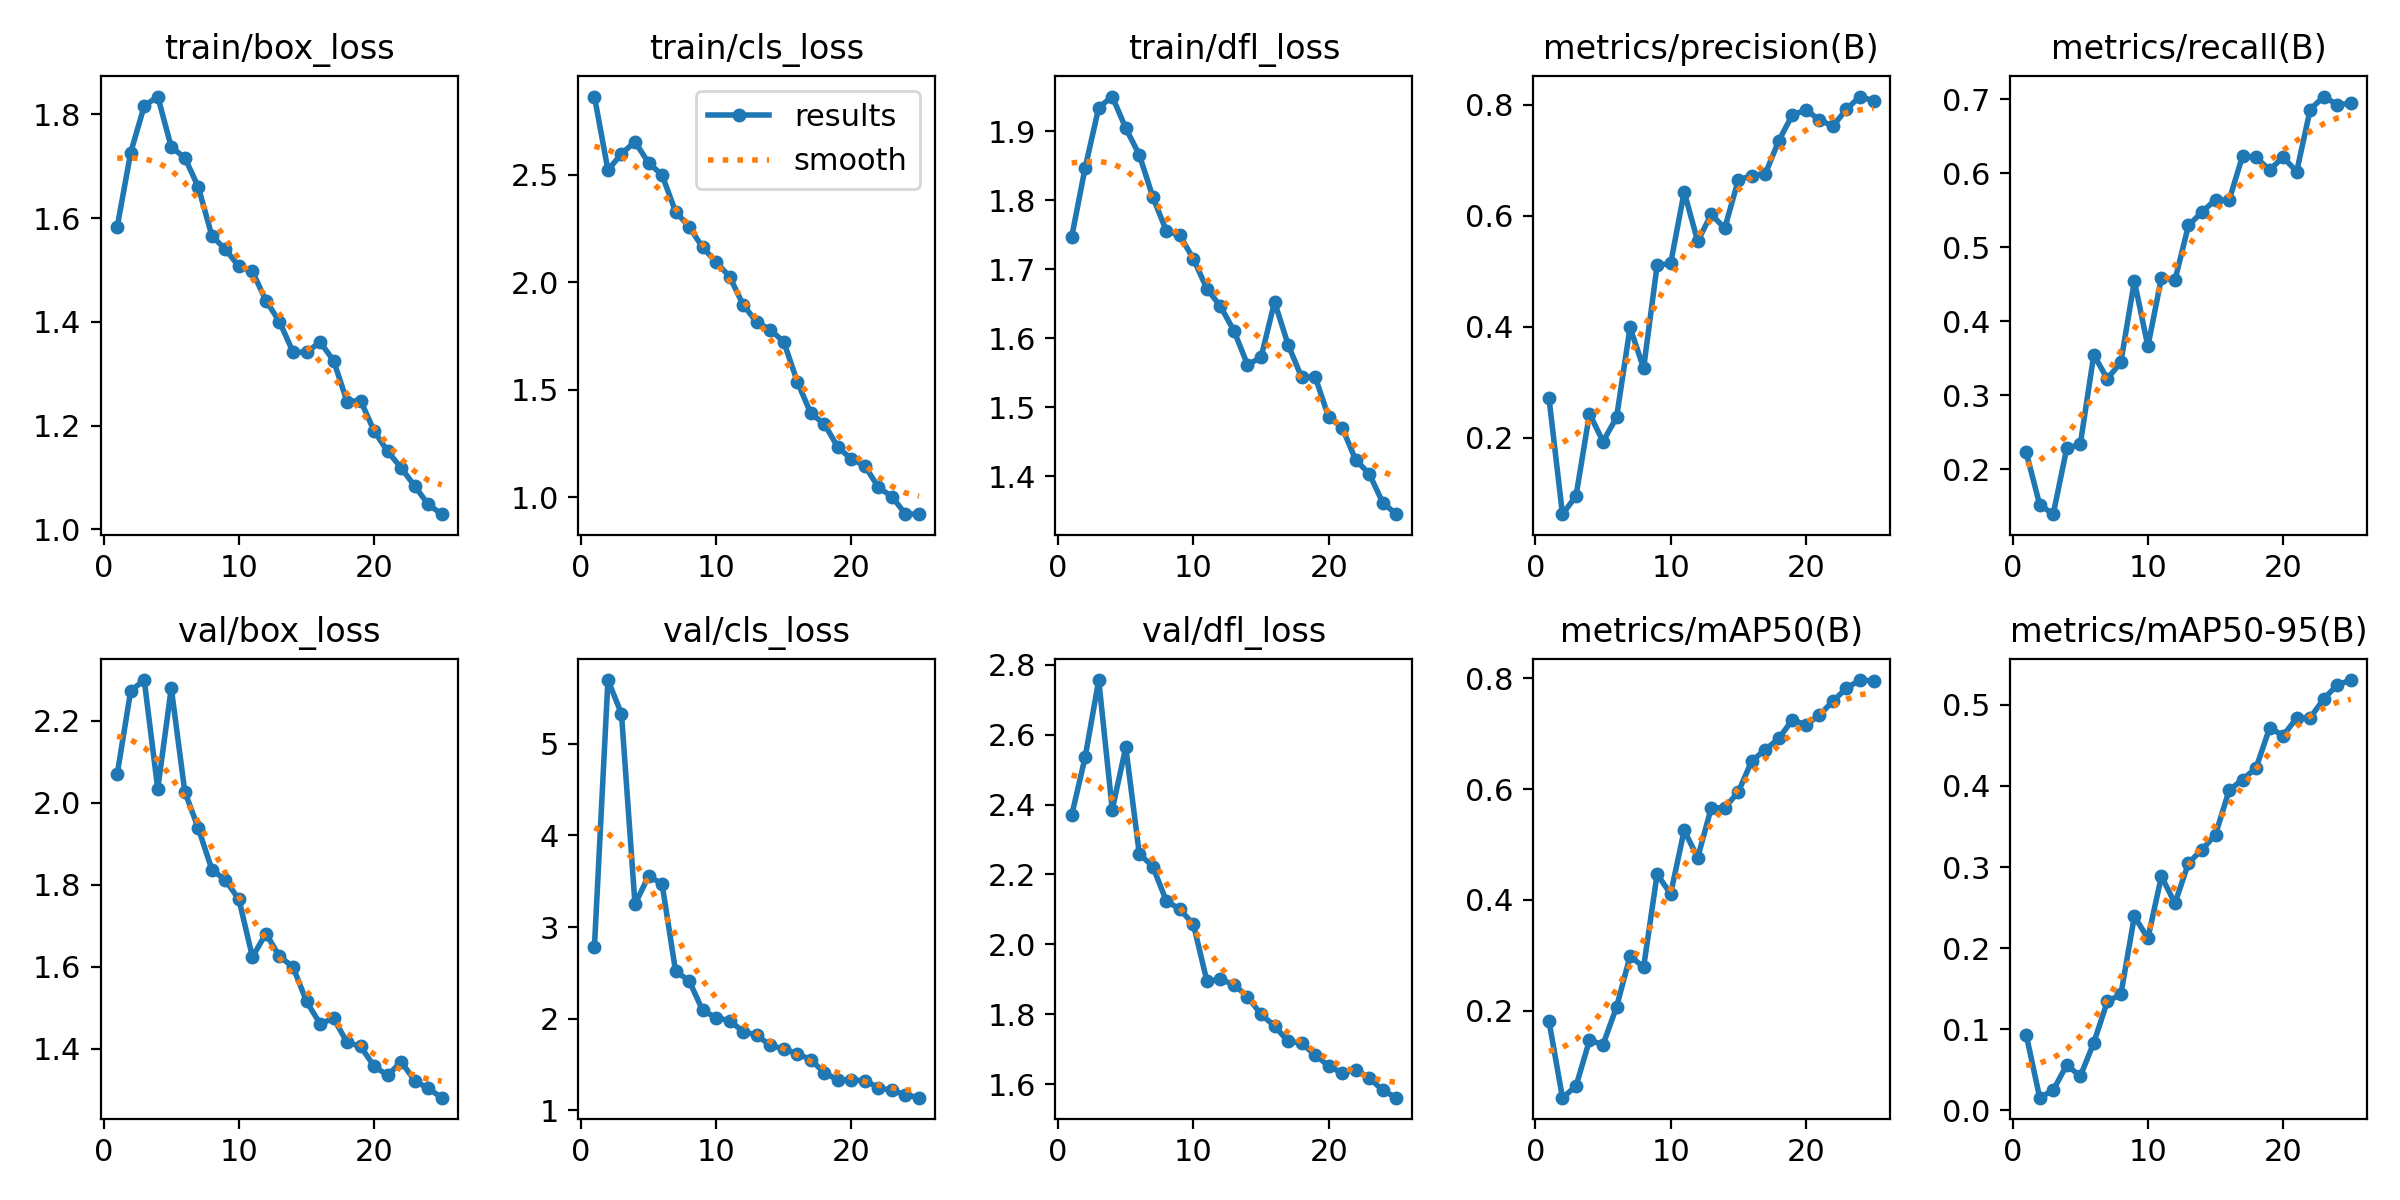

In [ ]:
from IPython.display import Image, display

display(Image(filename='runs/detect/train/results.png'))

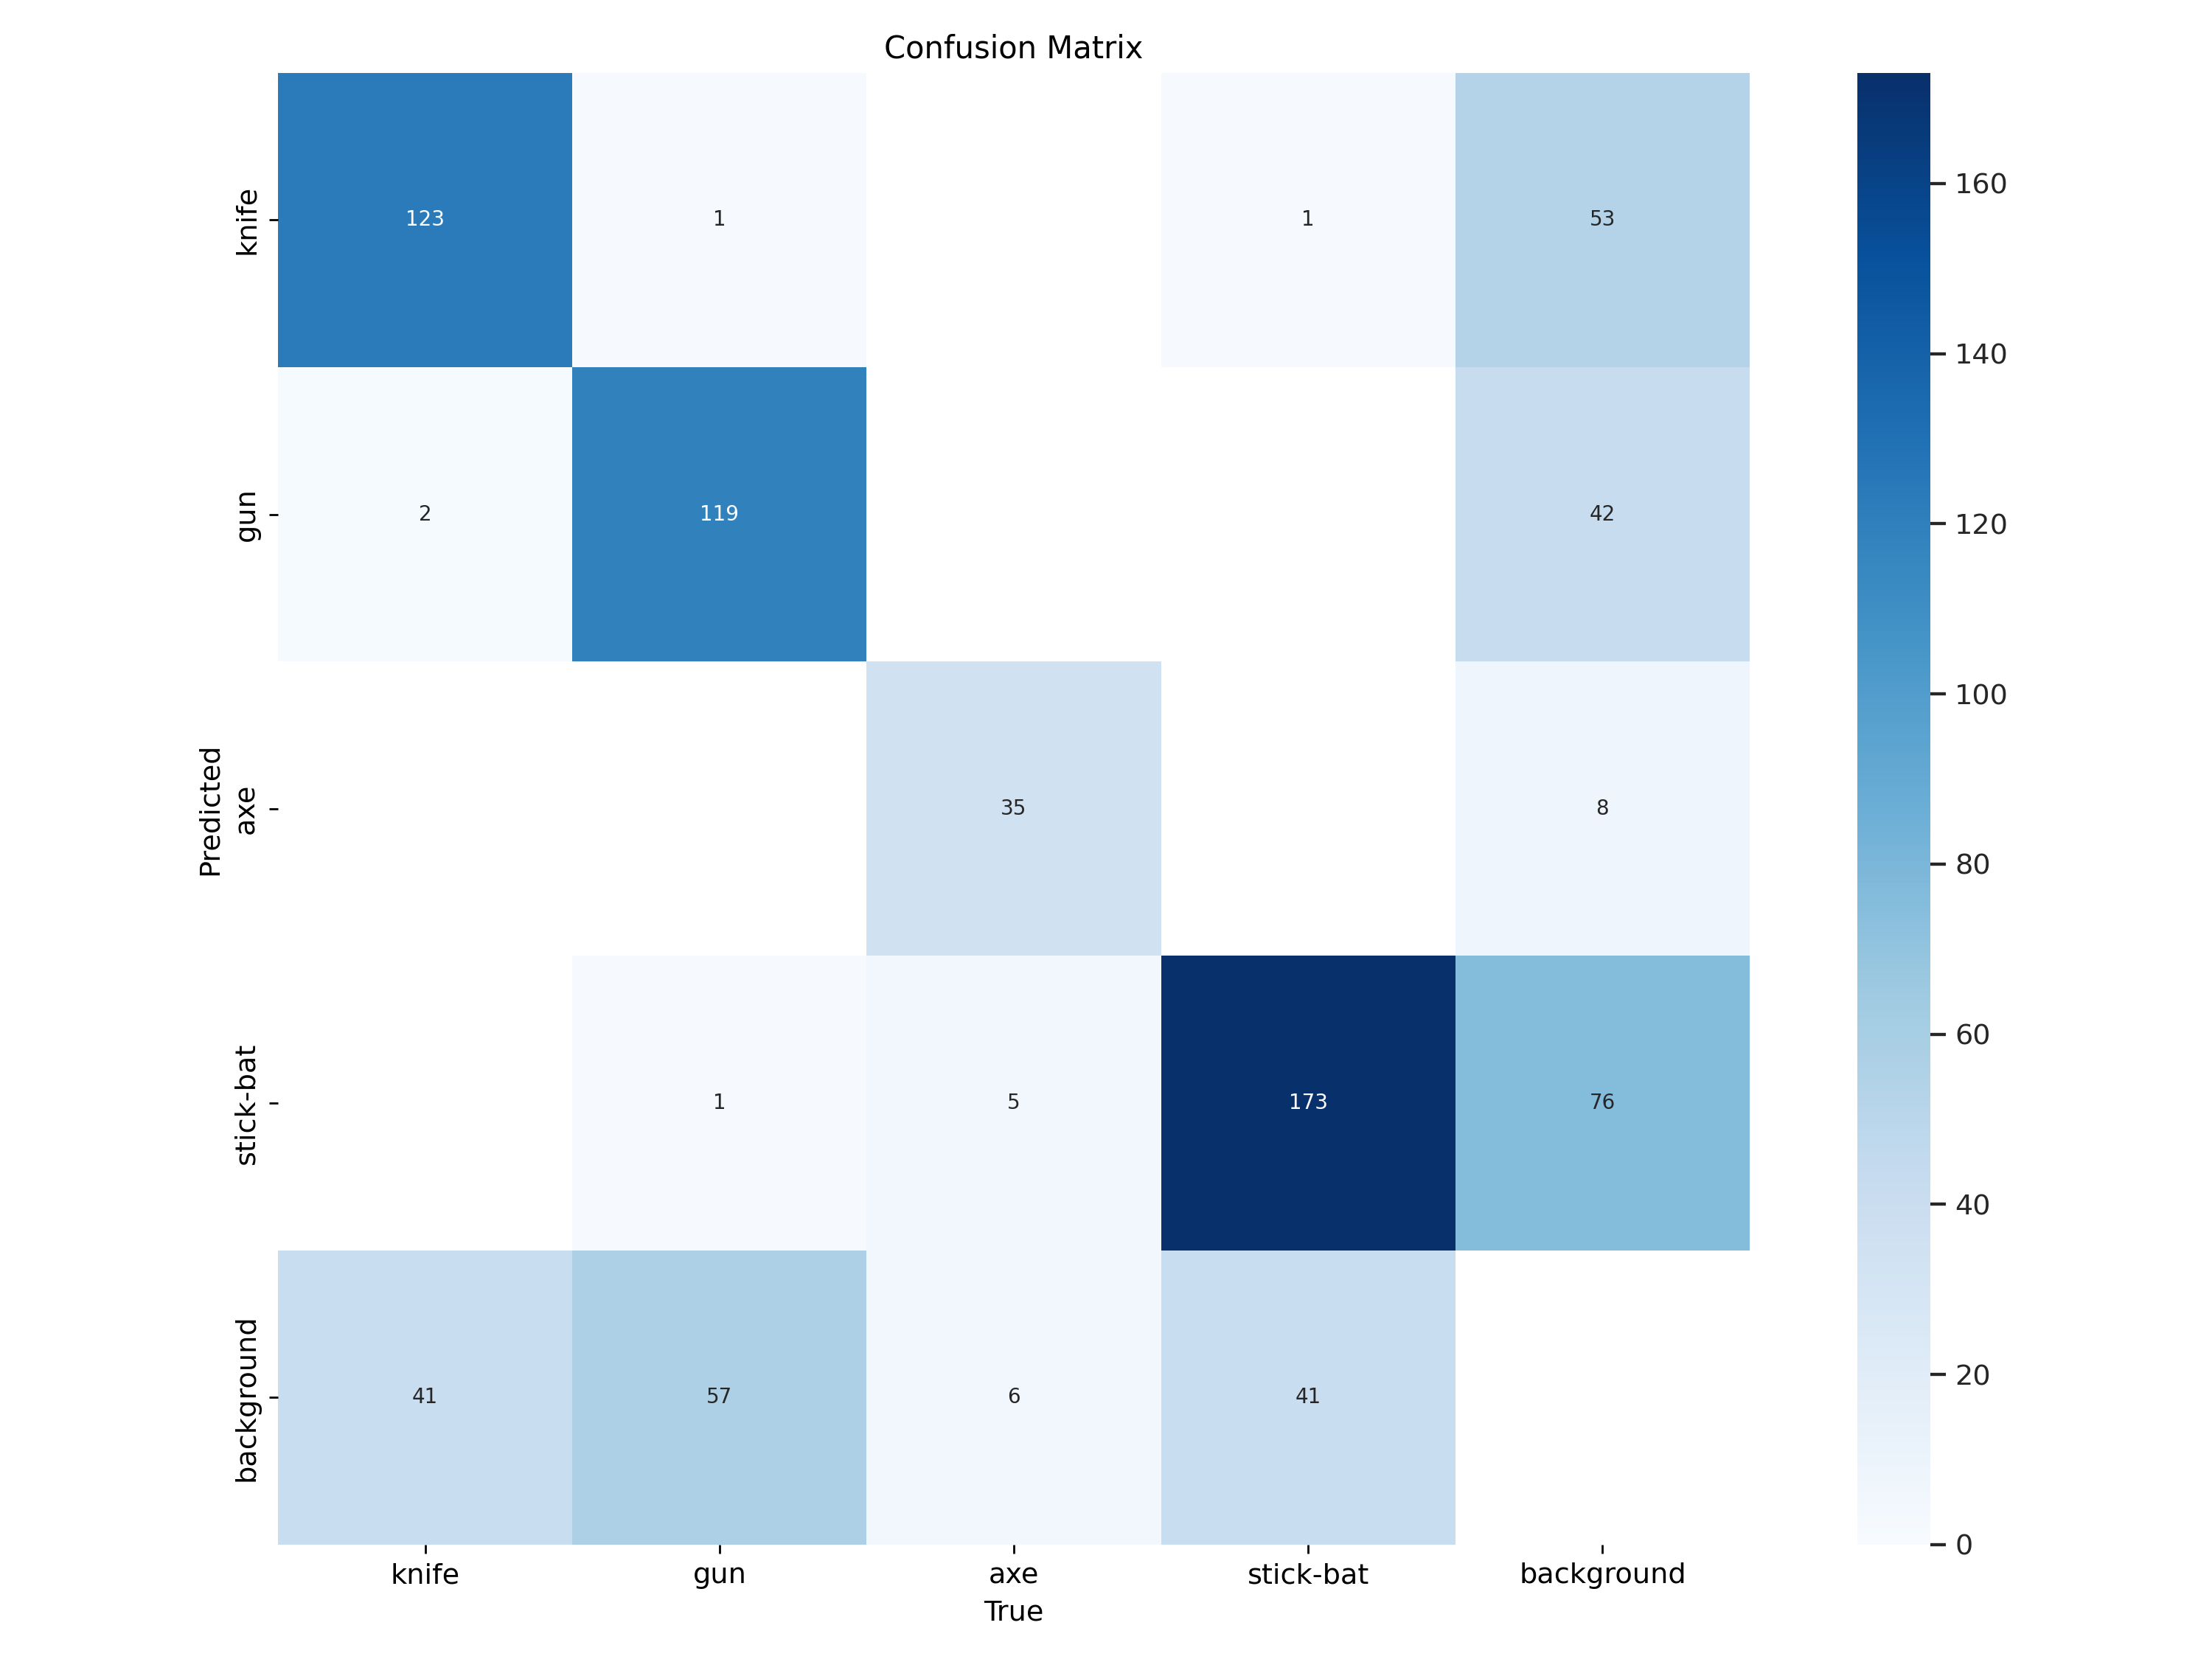

In [ ]:
display(Image(filename='runs/detect/train/confusion_matrix.png'))

In [ ]:
from ultralytics import YOLO

model = YOLO('runs/detect/train/weights/best.pt')

results = model.val()

Ultralytics 8.3.123 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 788.2±284.1 MB/s, size: 26.3 KB)


val: Scanning /content/final_dataset/valid/labels.cache... 455 images, 0 backgrounds, 0 corrupt: 100%|██████████| 455/455 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 53, len(boxes) = 605. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.37it/s]


                   all        455        605       0.81      0.694      0.798      0.531
                 knife        143        166      0.759      0.699      0.778      0.507
                   gun        130        178      0.834      0.635      0.729      0.529
                   axe         35         46      0.838      0.676      0.873      0.599
             stick-bat        147        215      0.809      0.767      0.812      0.488
Speed: 1.9ms preprocess, 9.1ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/val


In [ ]:
import os

print(os.listdir('runs/detect/val'))

['R_curve.png', 'val_batch0_pred.jpg', 'confusion_matrix_normalized.png', 'confusion_matrix.png', 'val_batch2_pred.jpg', 'val_batch0_labels.jpg', 'P_curve.png', 'val_batch1_labels.jpg', 'val_batch1_pred.jpg', 'F1_curve.png', 'val_batch2_labels.jpg', 'PR_curve.png']


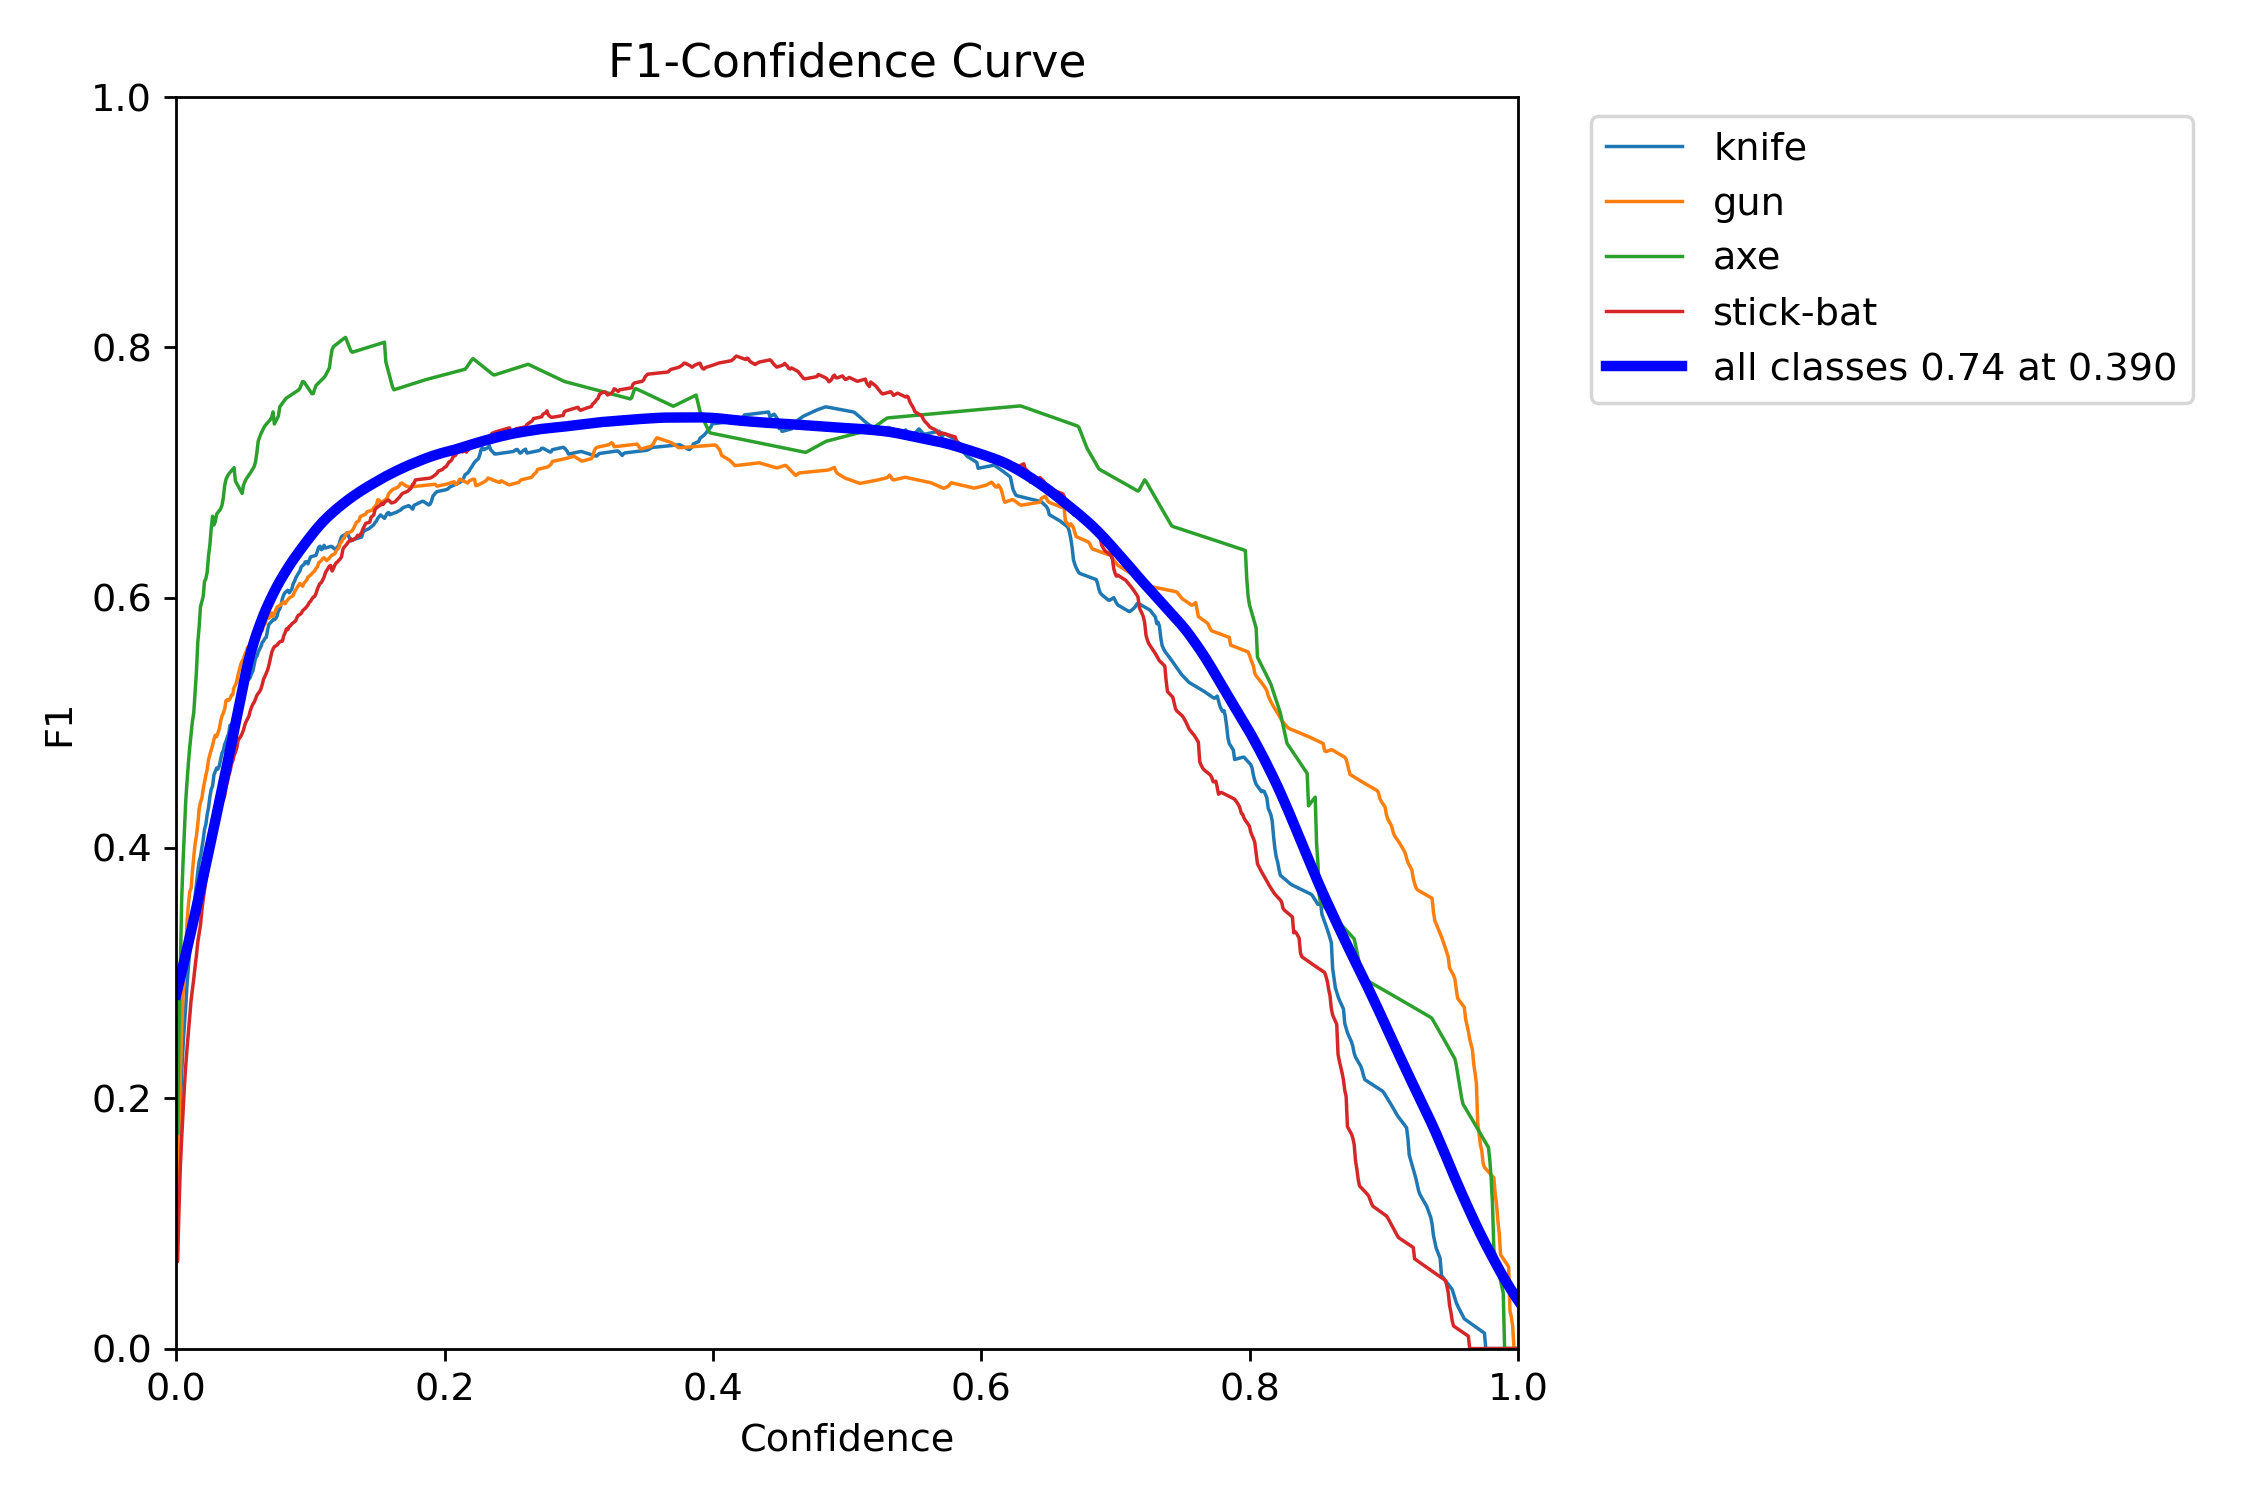

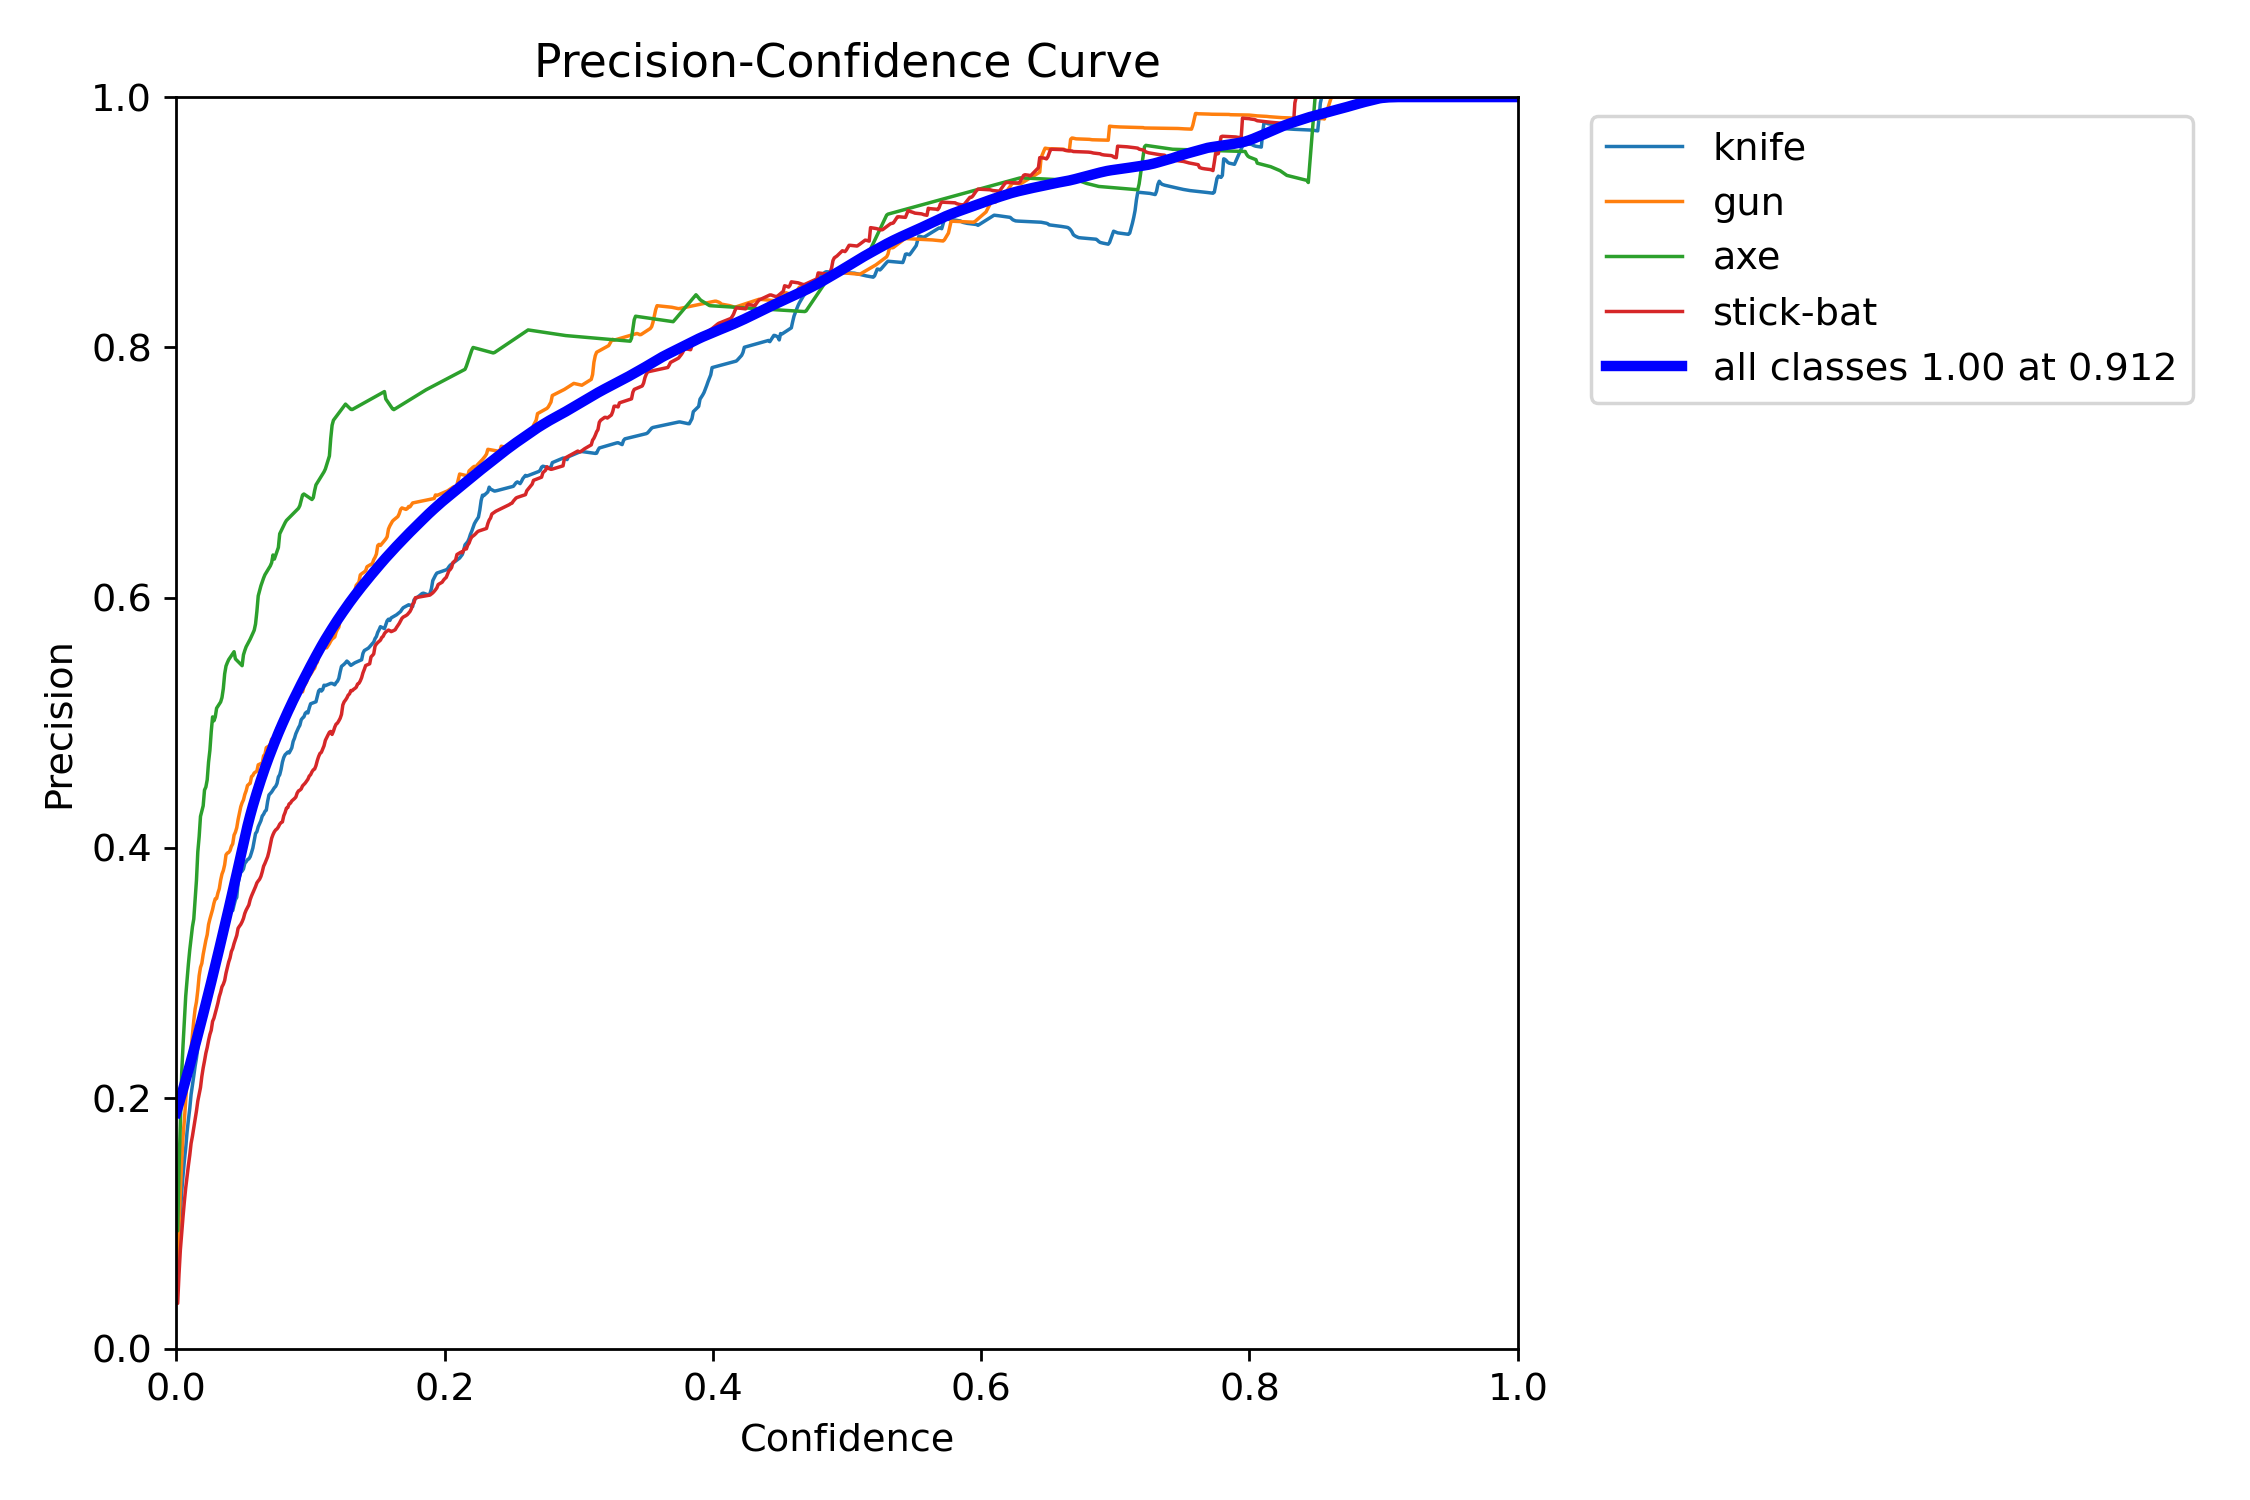

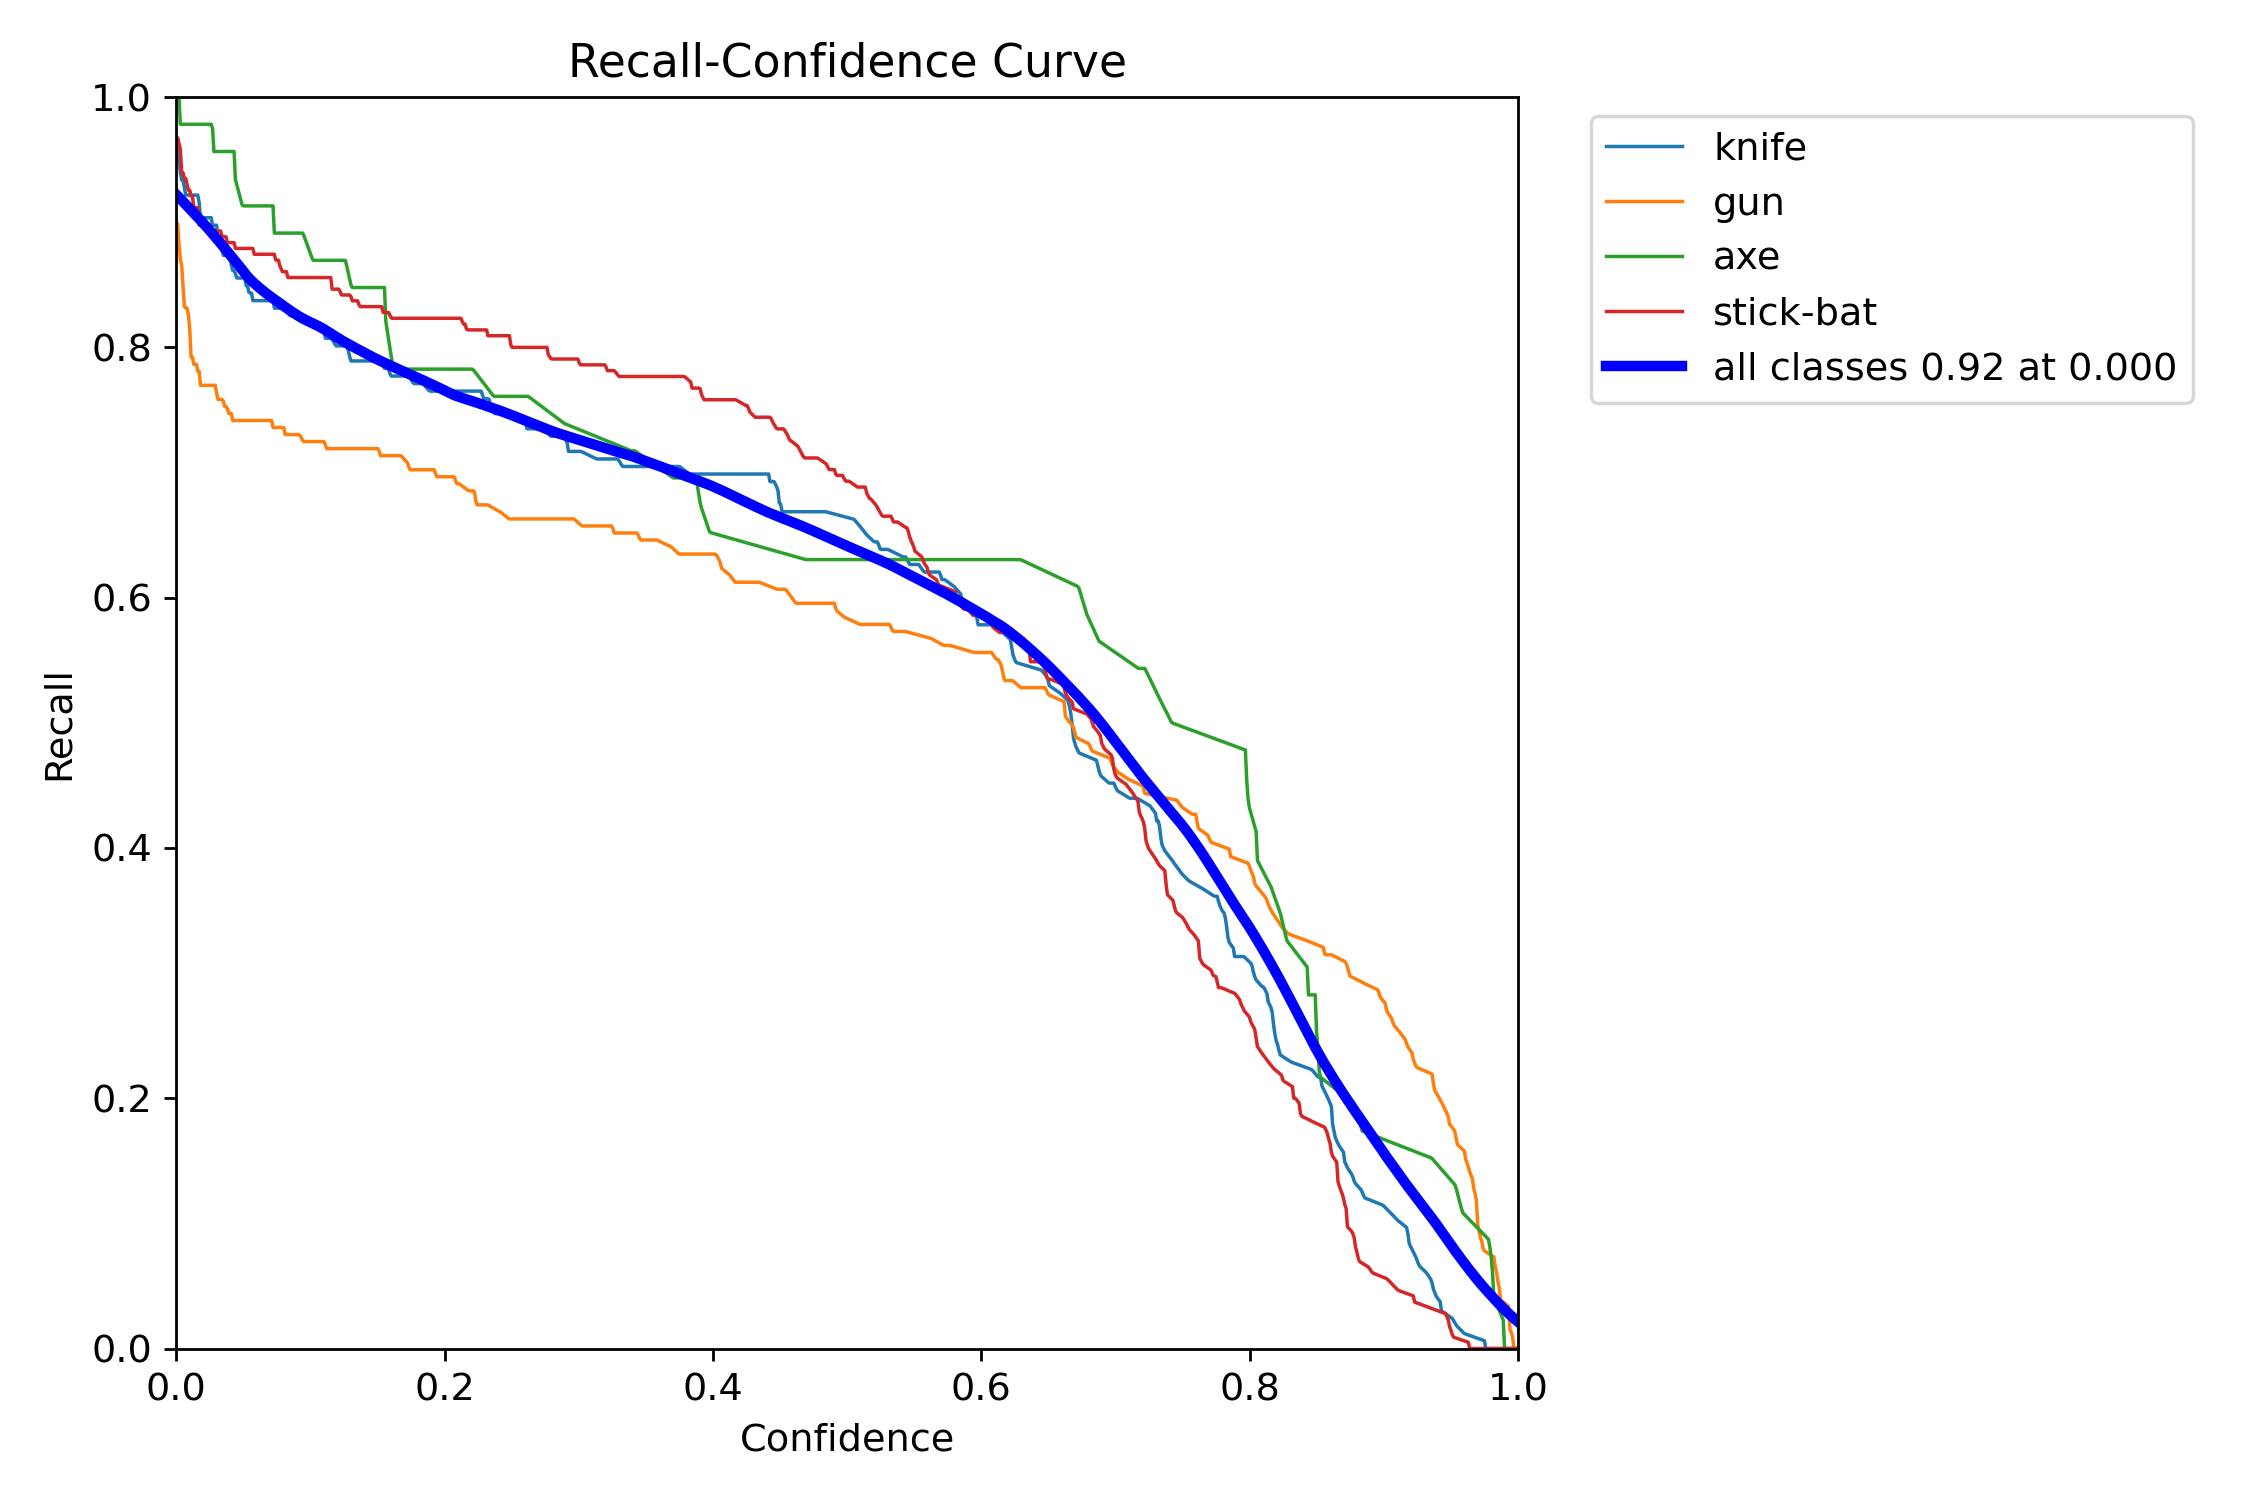

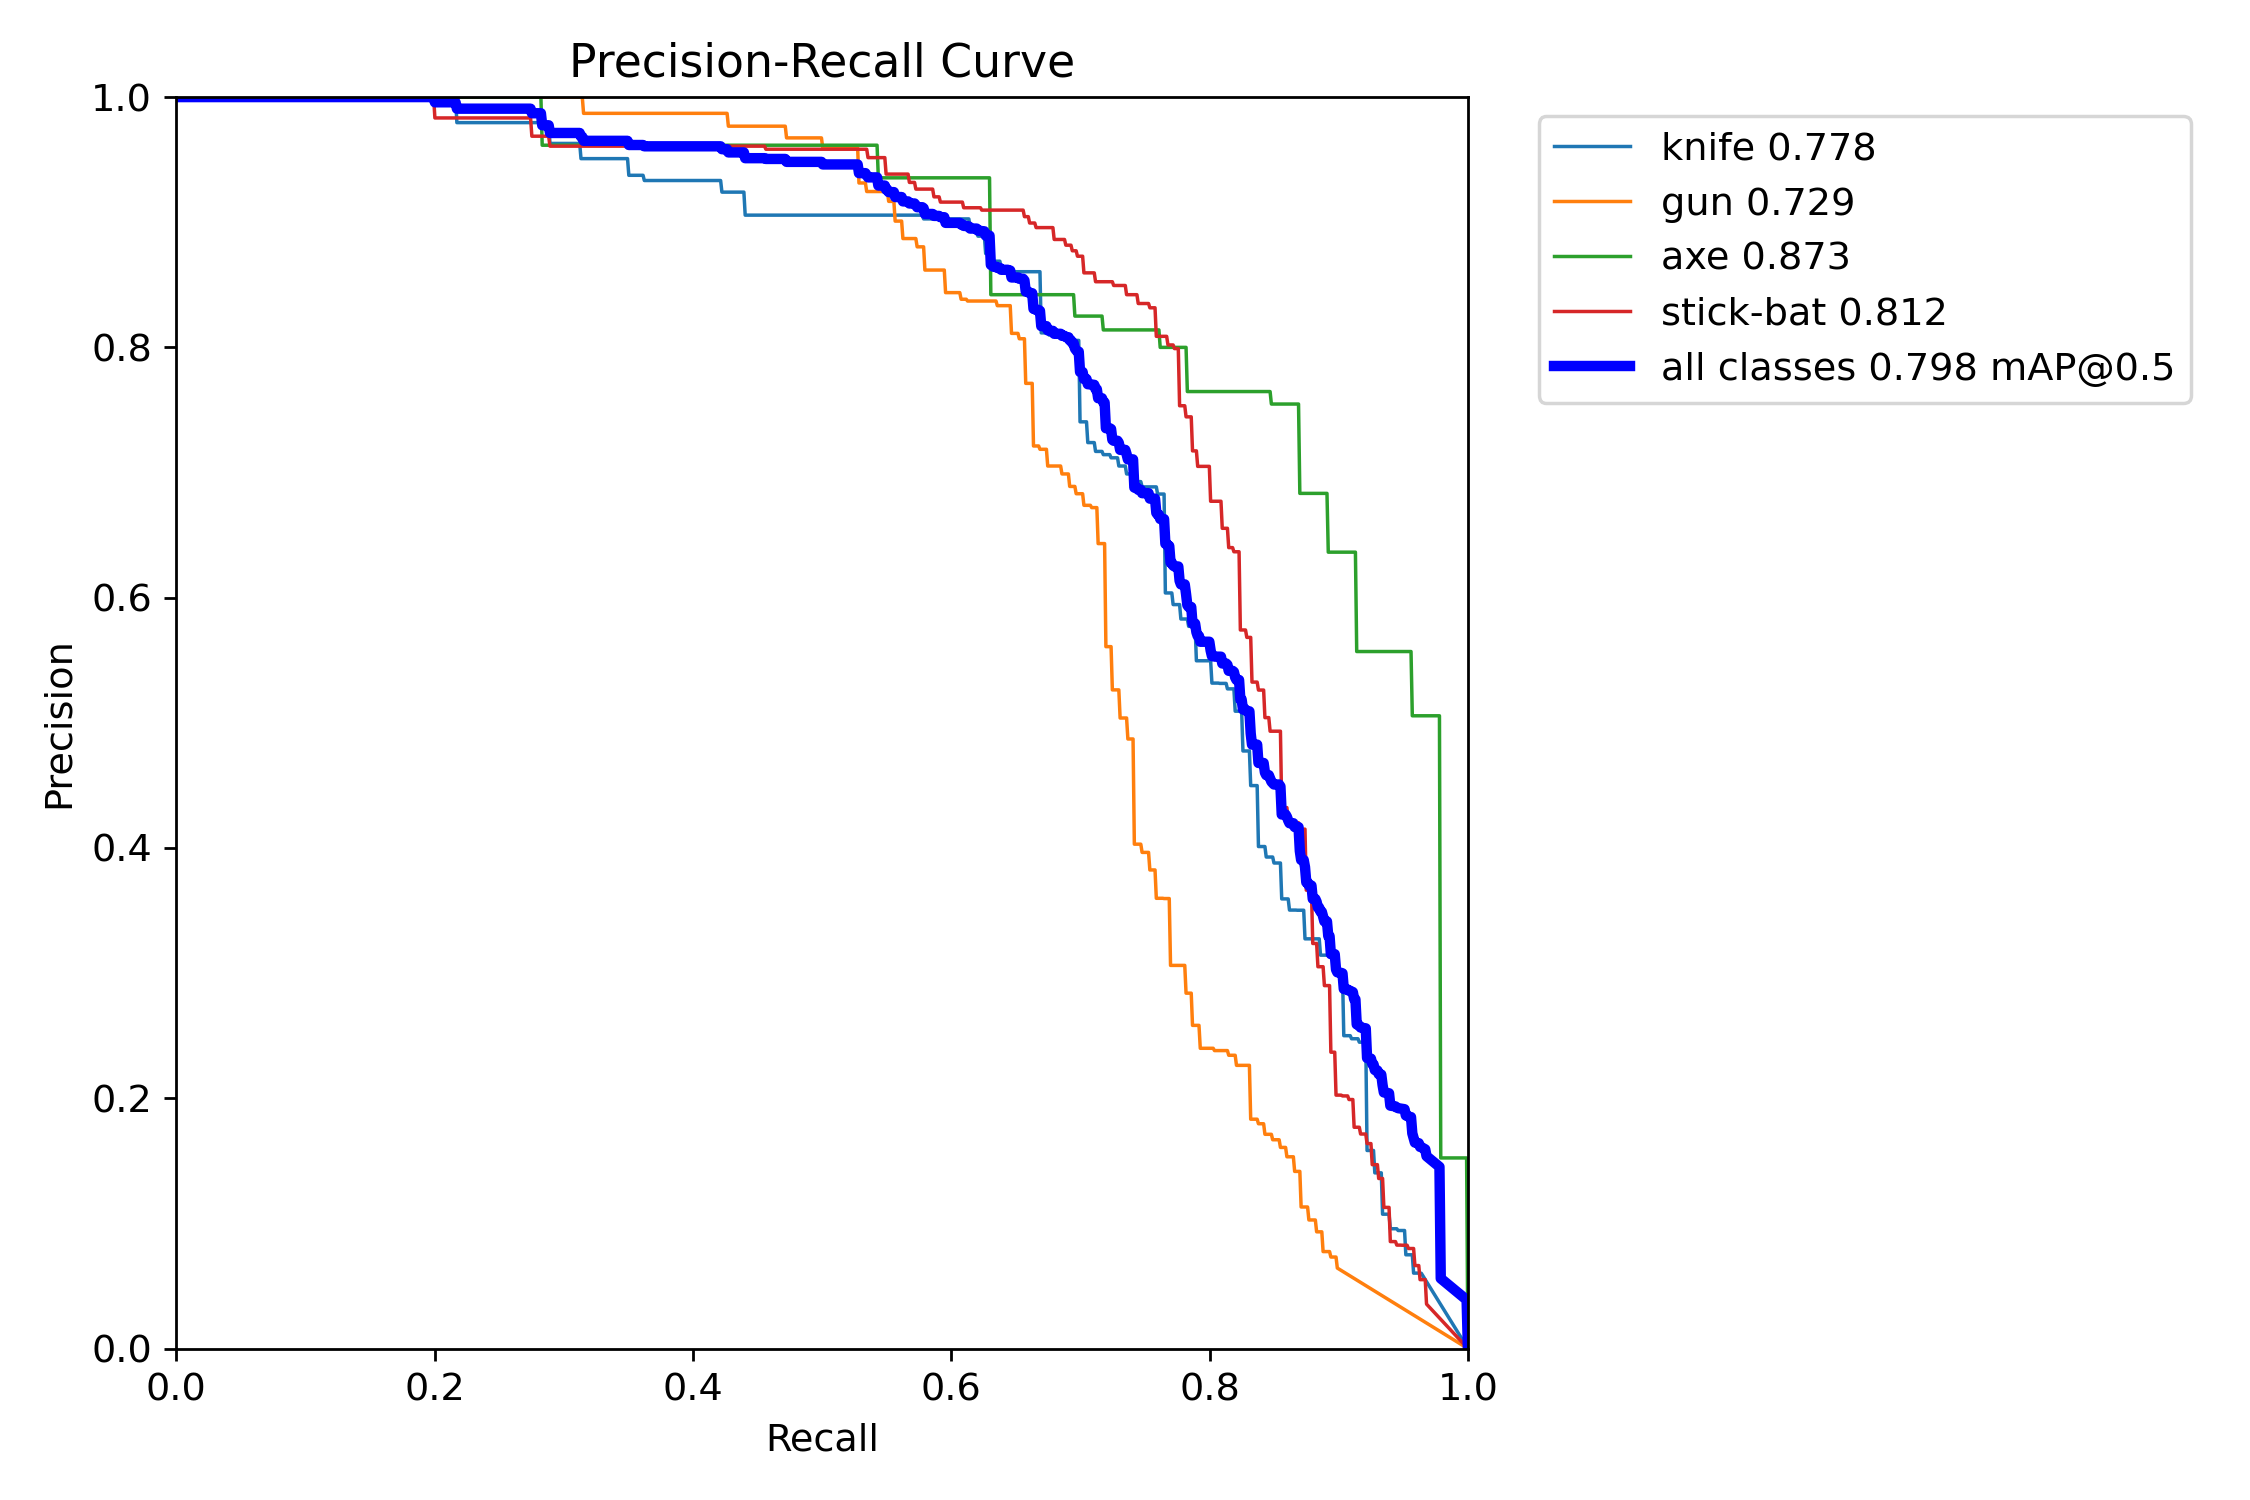

In [ ]:
from IPython.display import Image, display

display(Image(filename='runs/detect/val/F1_curve.png'))
display(Image(filename='runs/detect/val/P_curve.png'))
display(Image(filename='runs/detect/val/R_curve.png'))
display(Image(filename='runs/detect/val/PR_curve.png'))

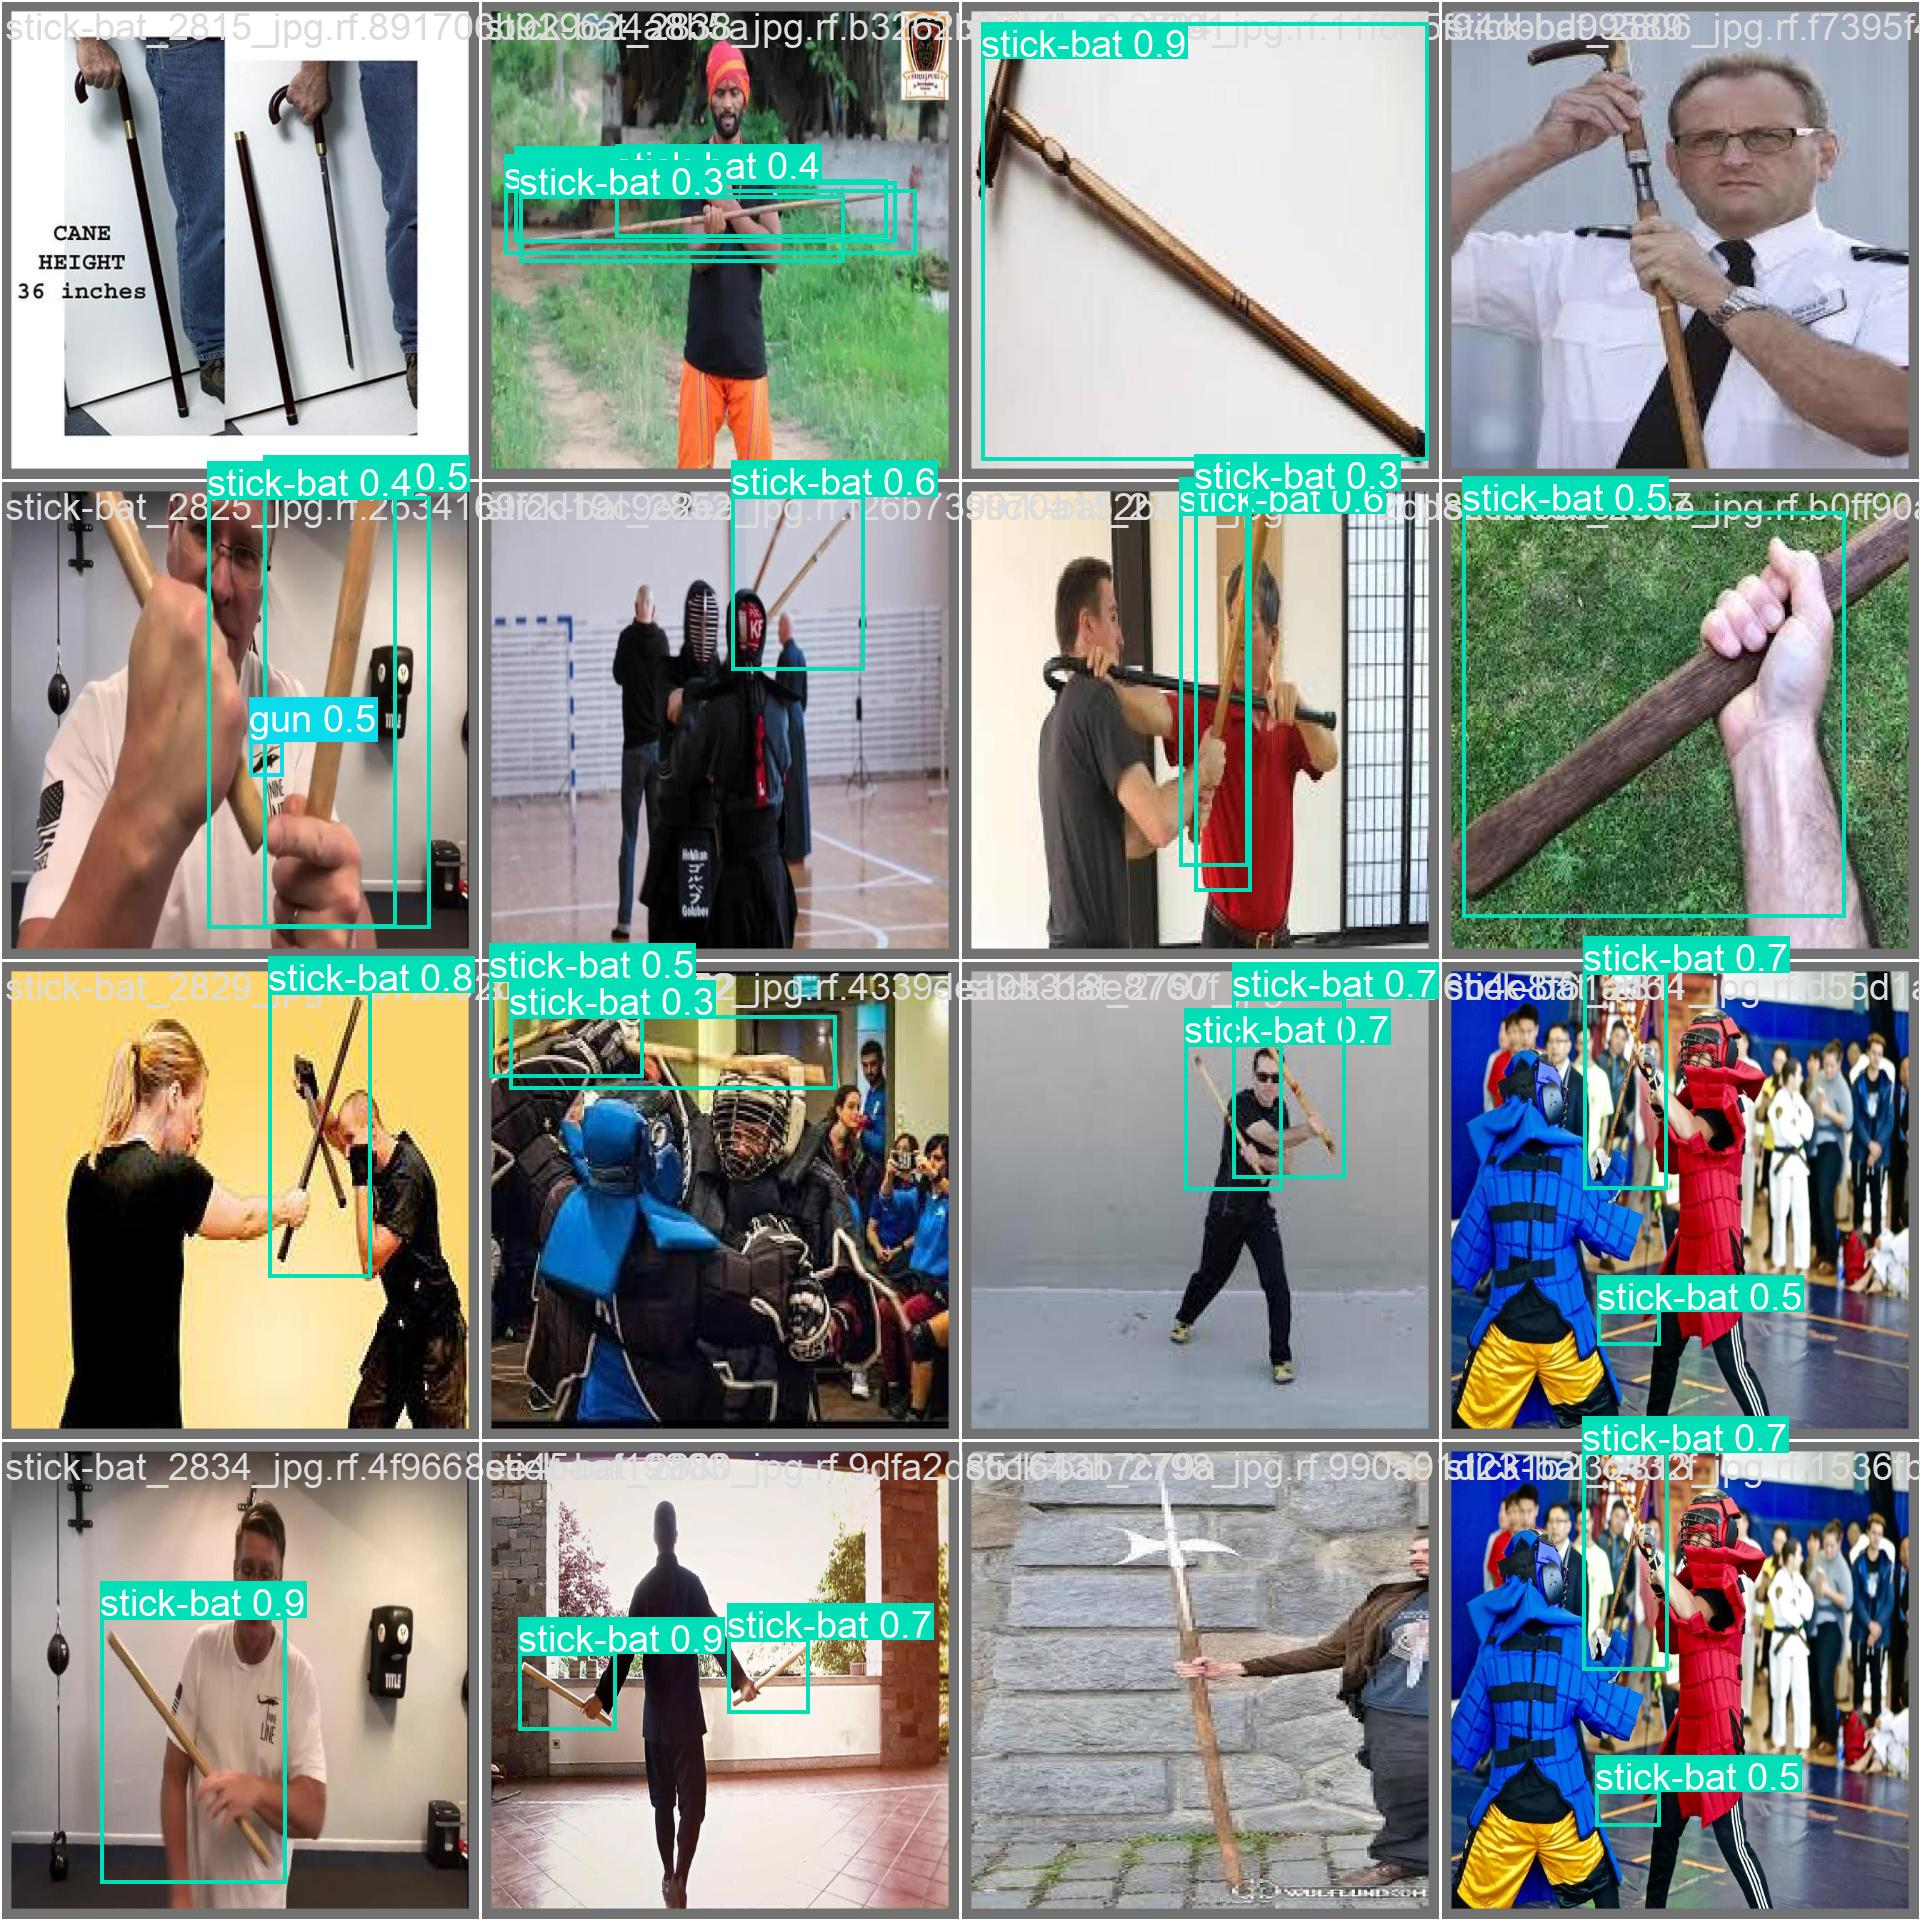

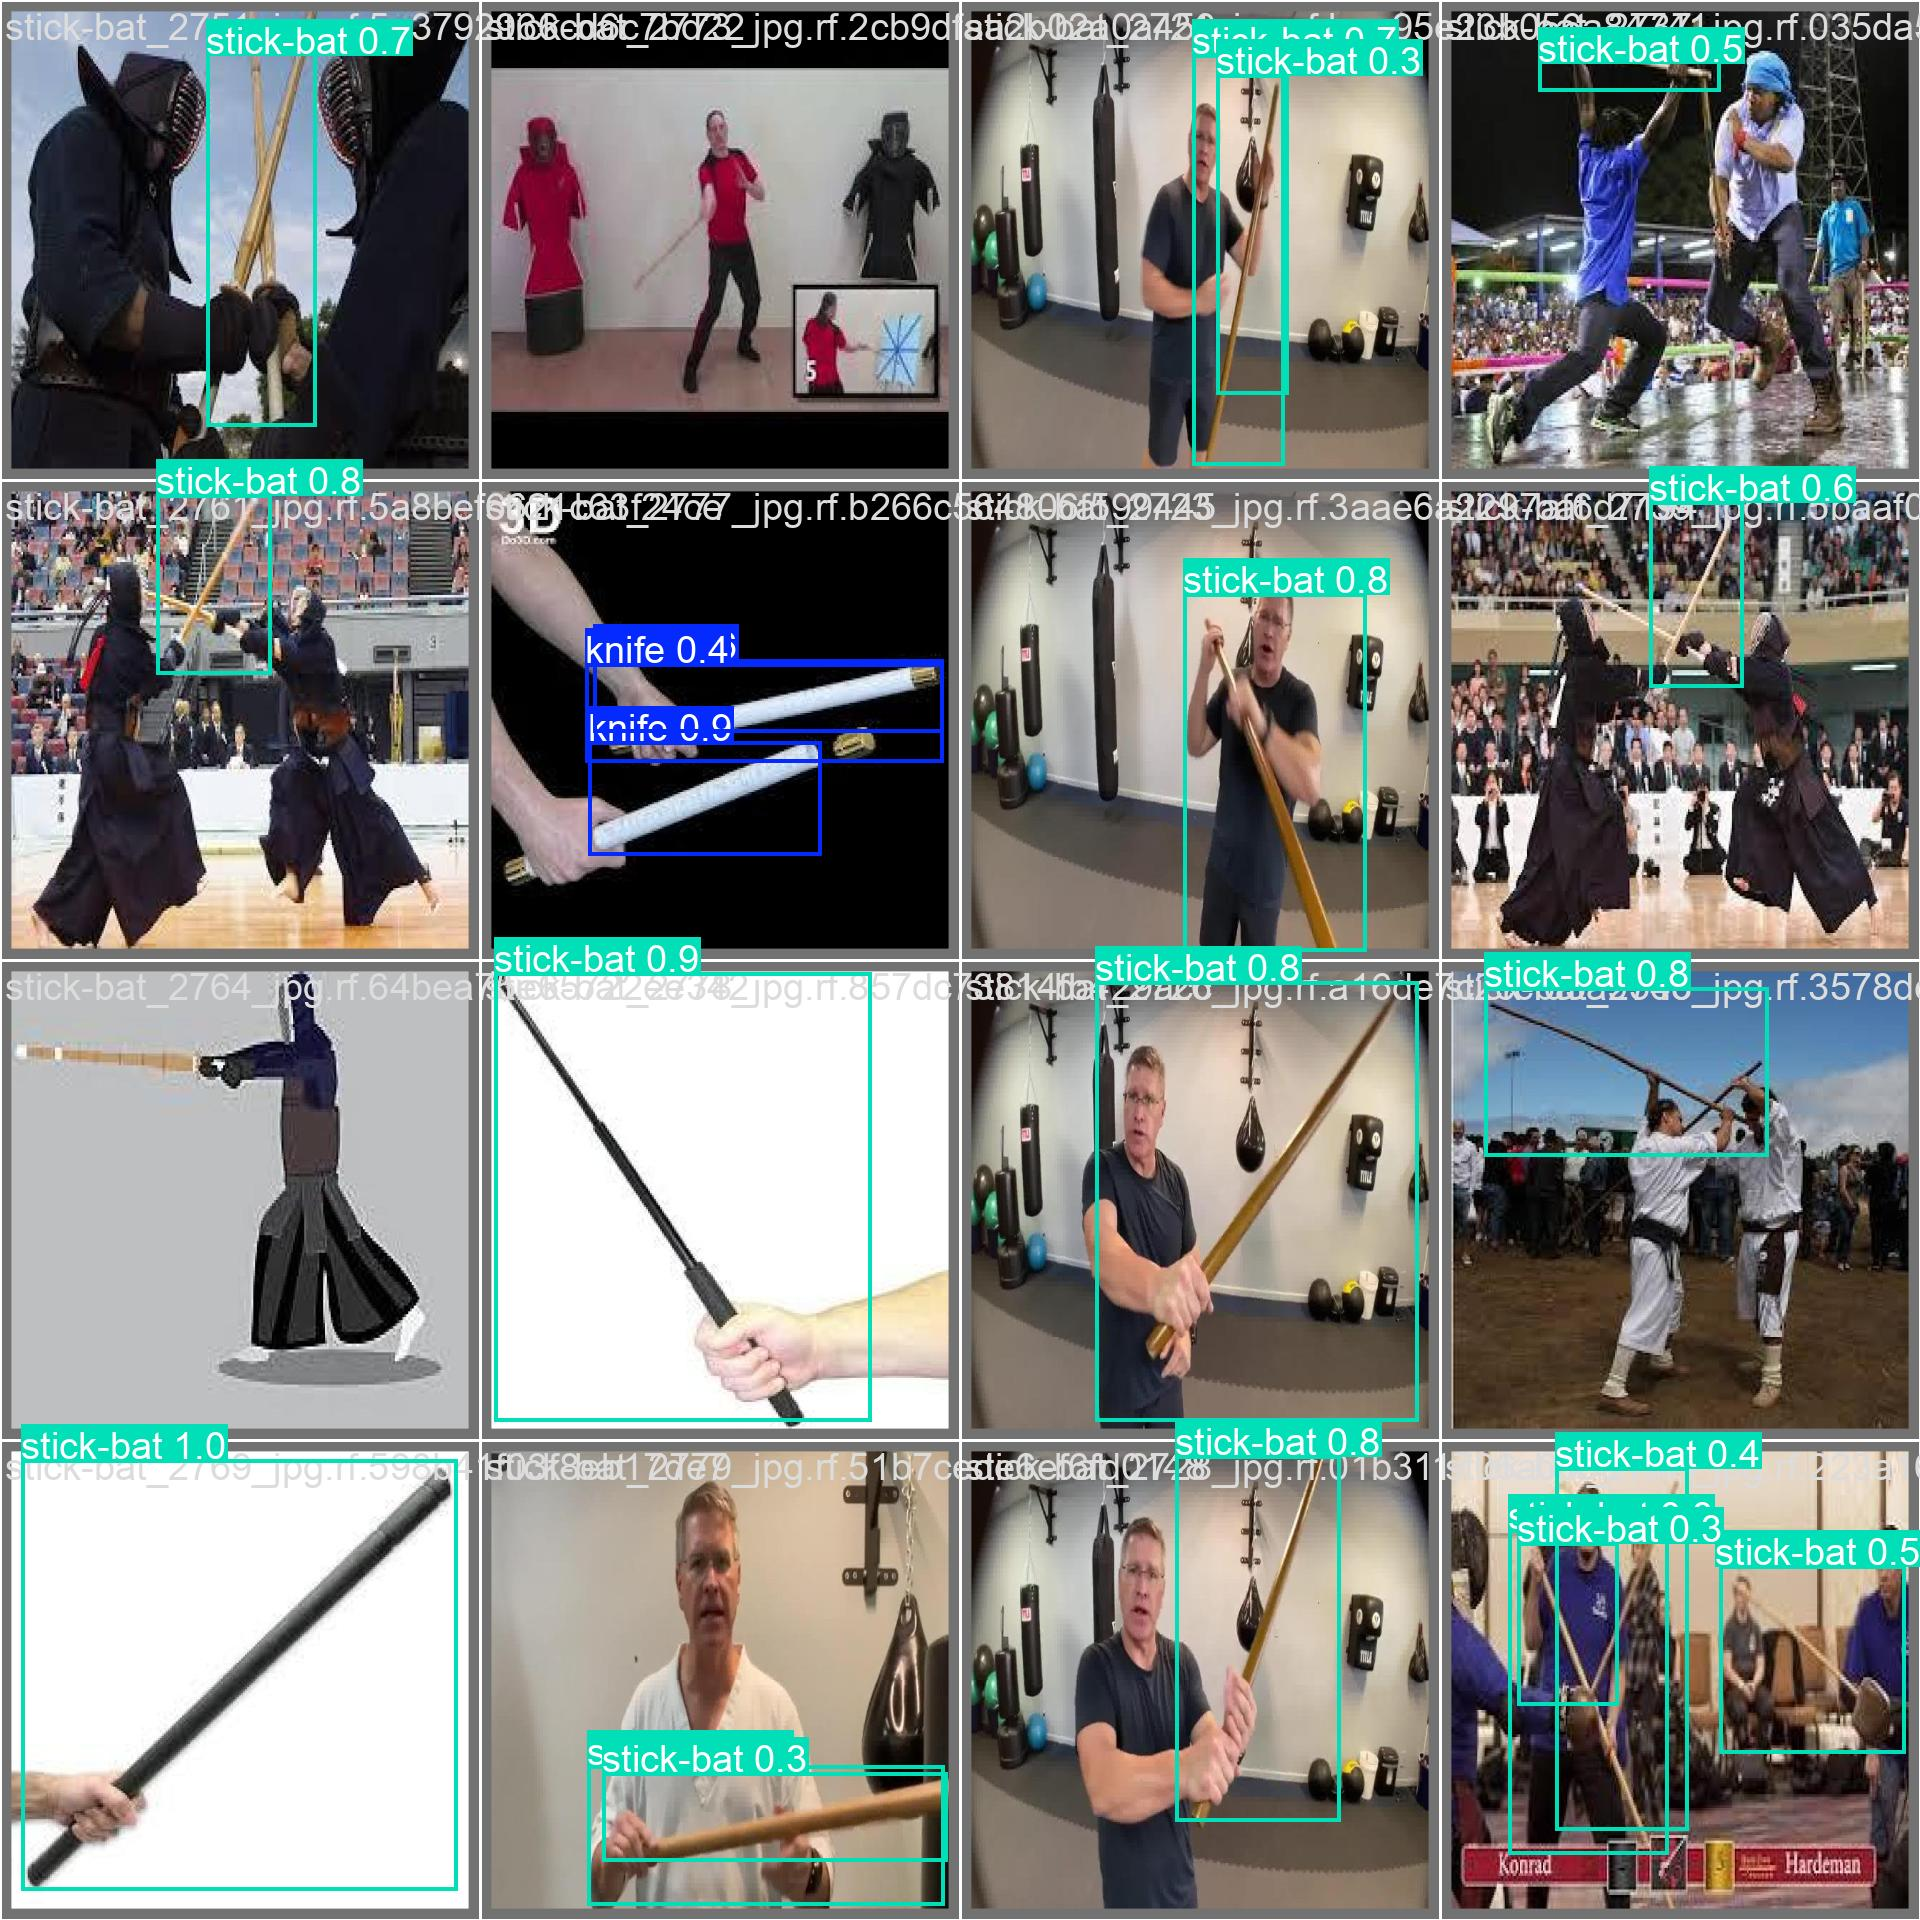

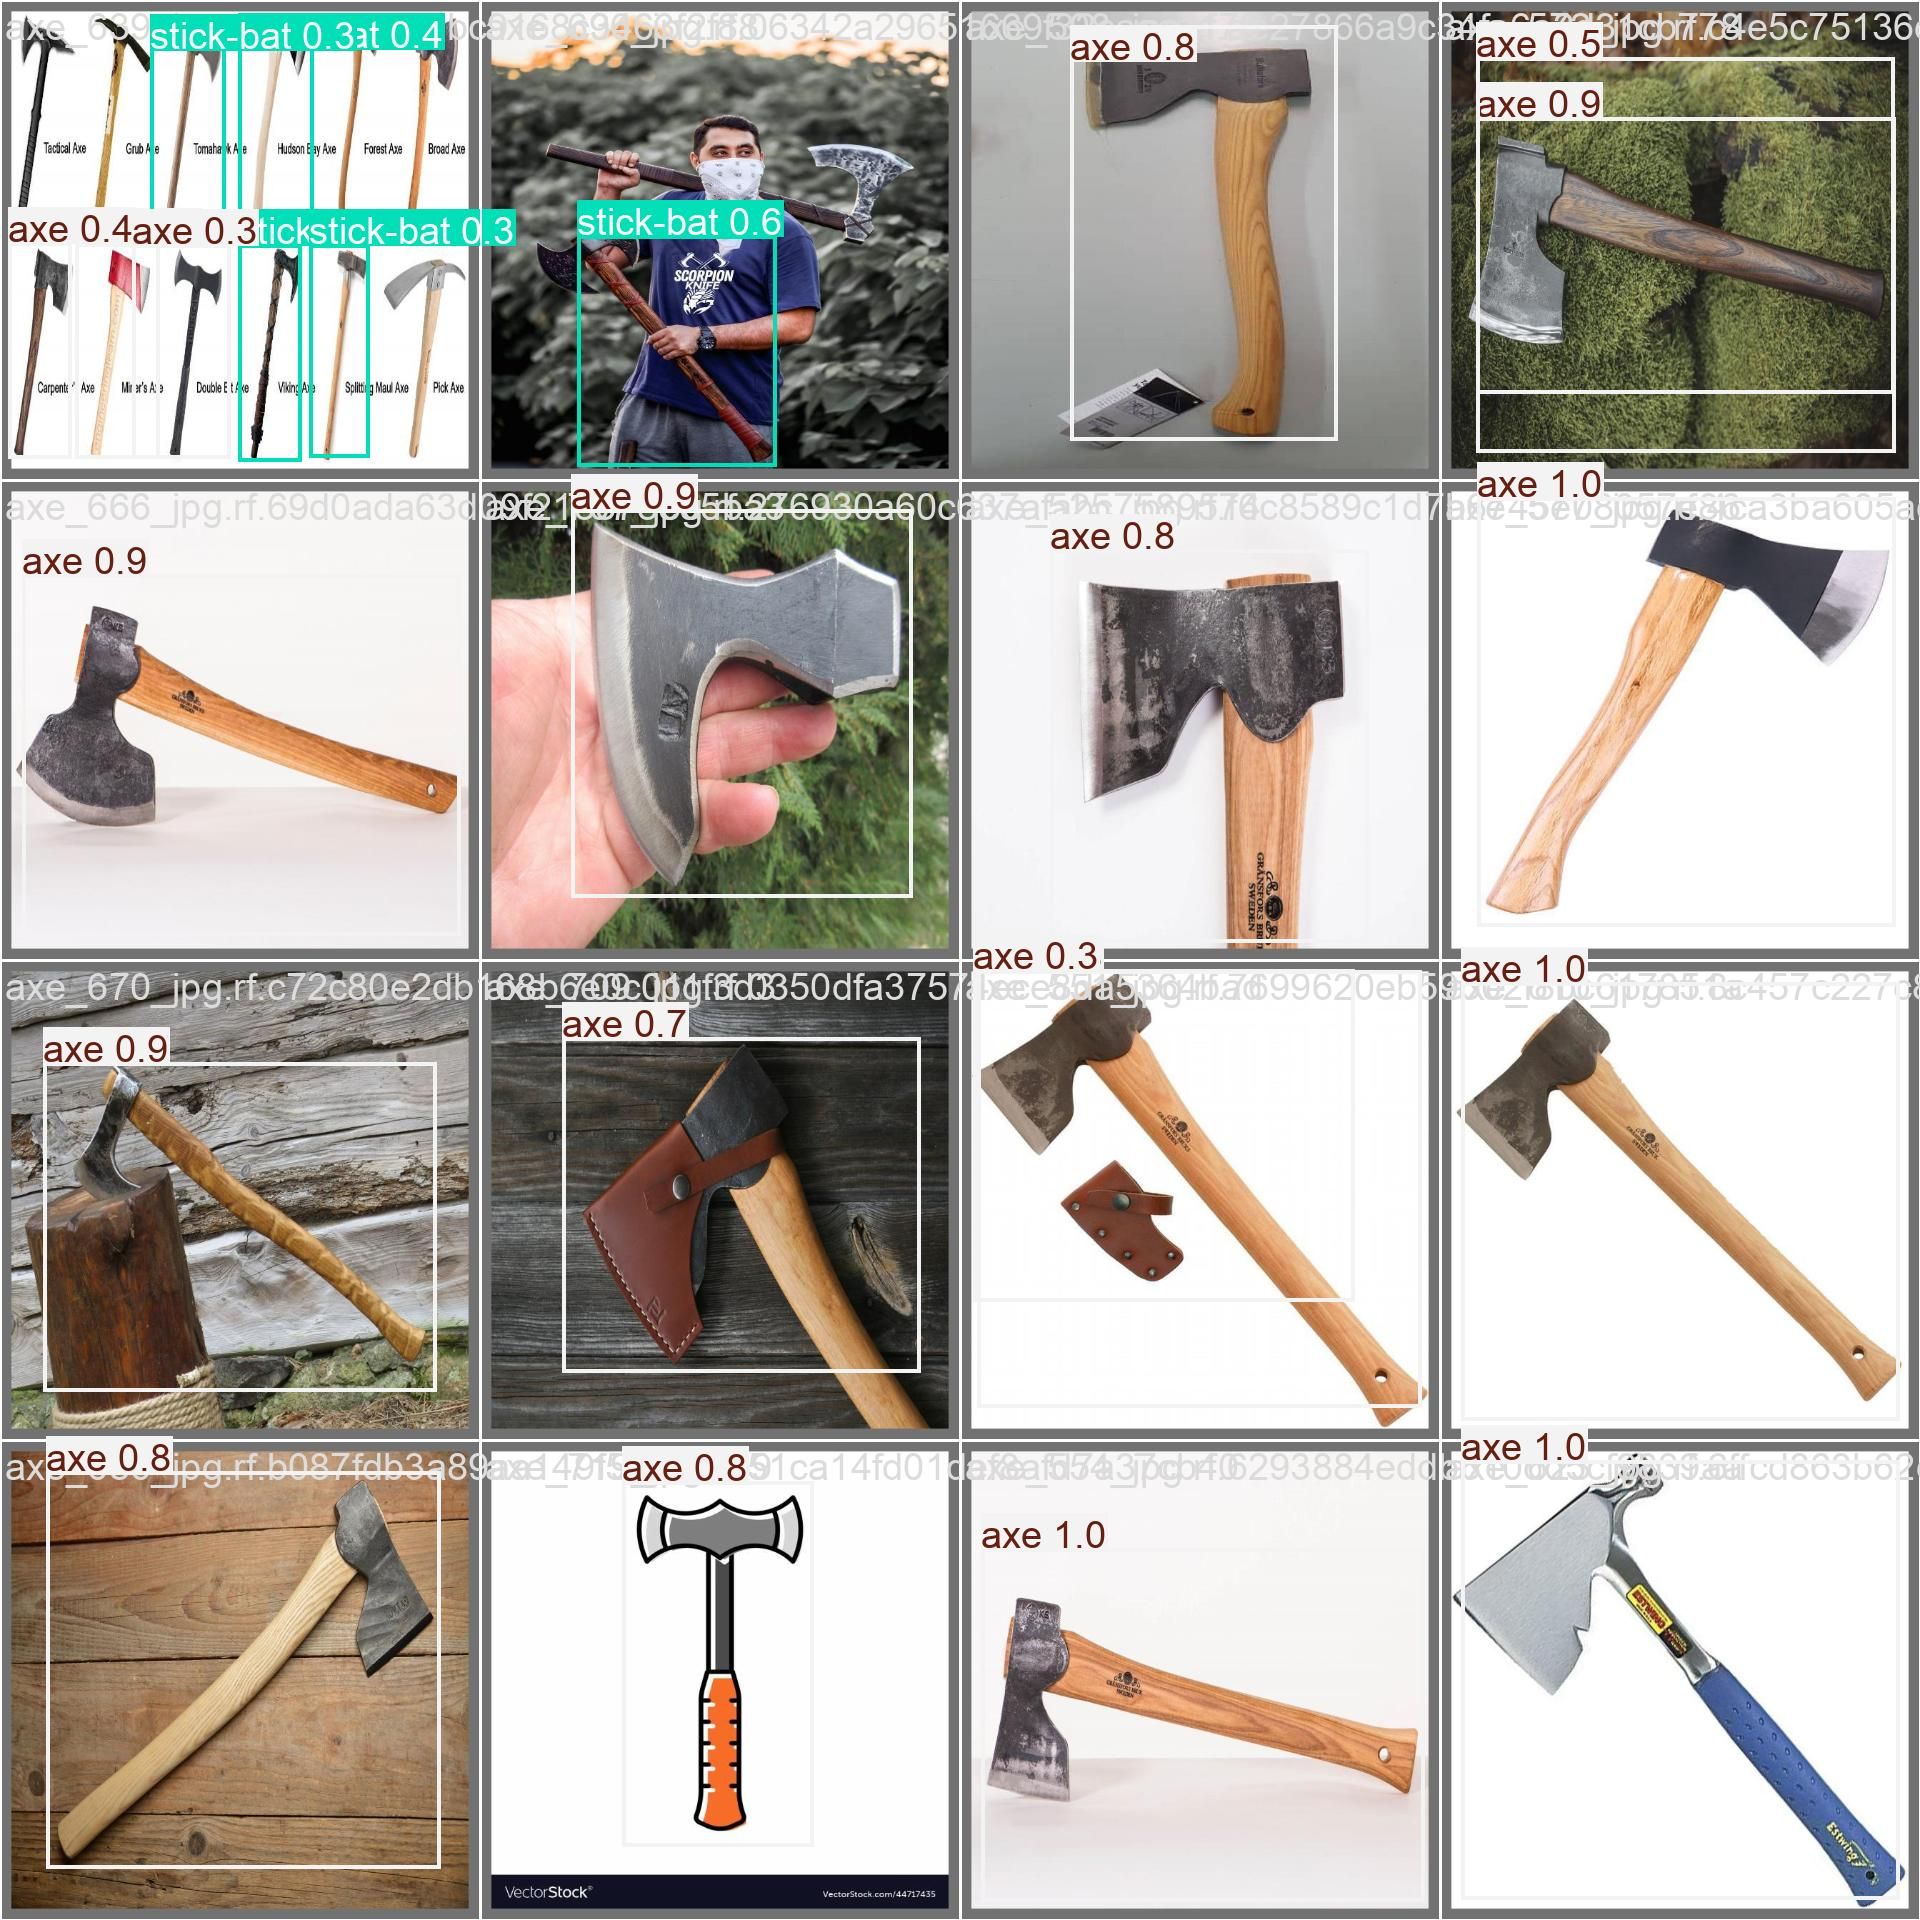

In [ ]:
display(Image(filename='runs/detect/val/val_batch0_pred.jpg'))
display(Image(filename='runs/detect/val/val_batch1_pred.jpg'))
display(Image(filename='runs/detect/val/val_batch2_pred.jpg'))

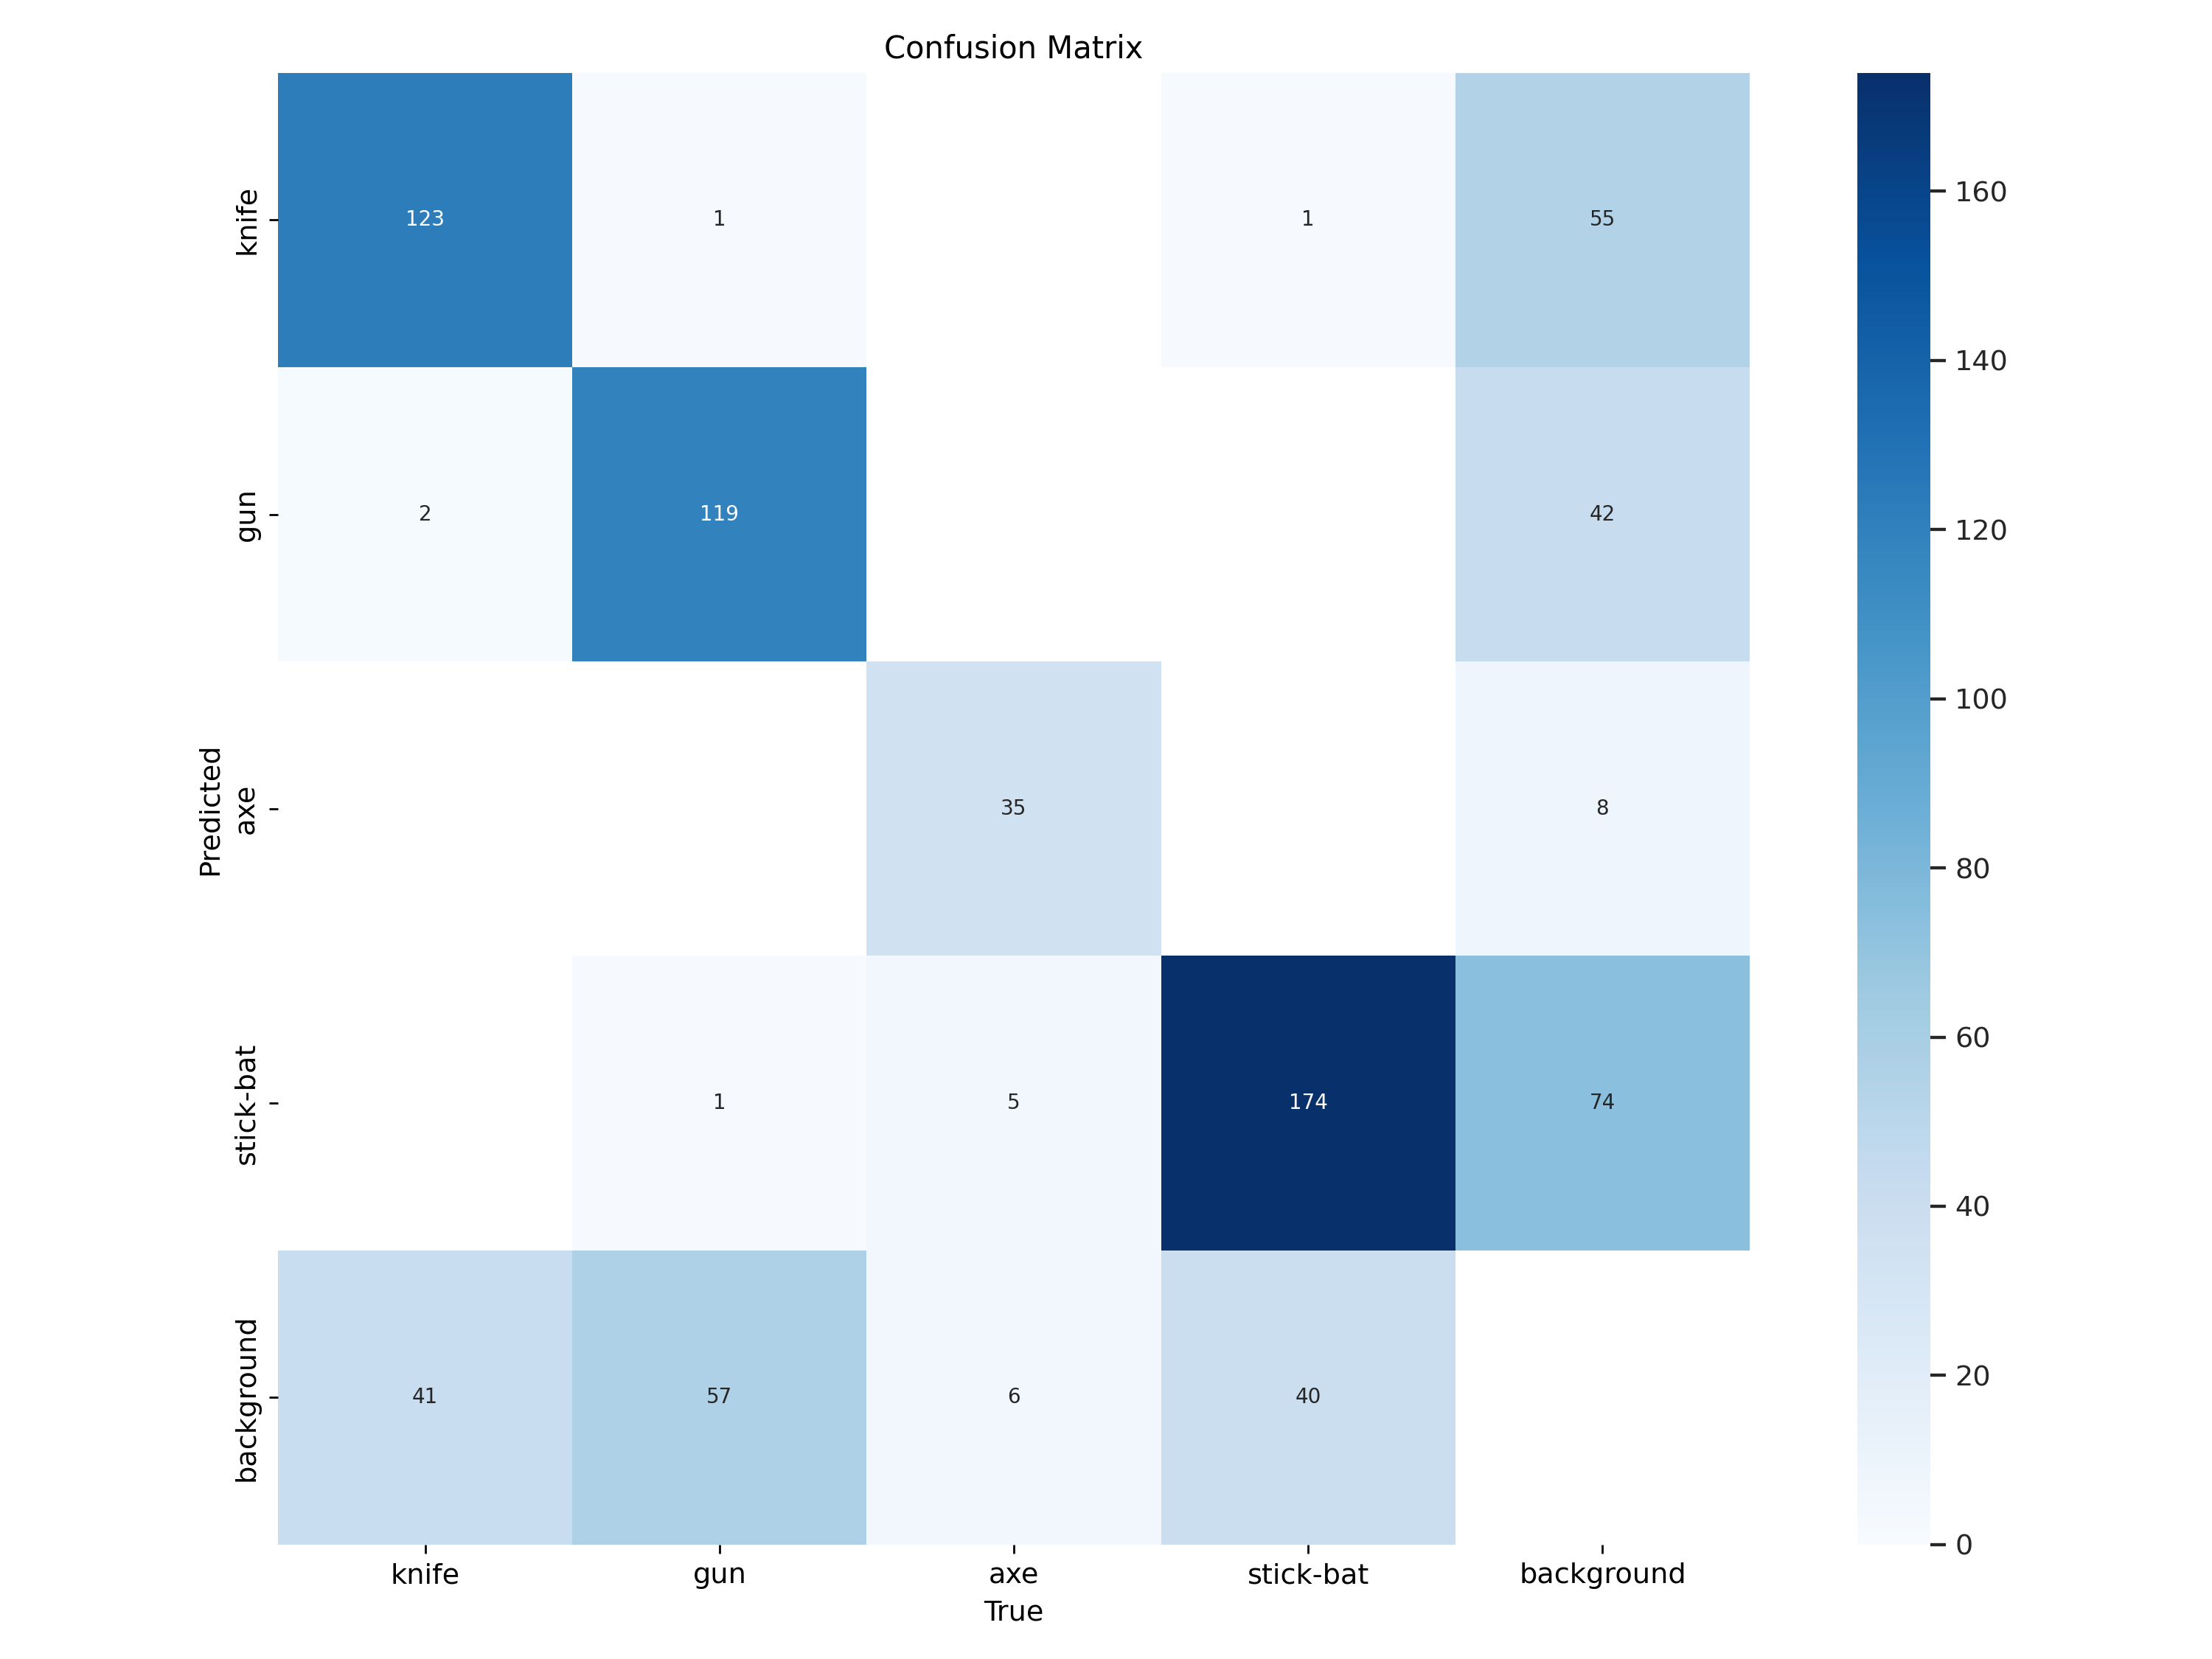

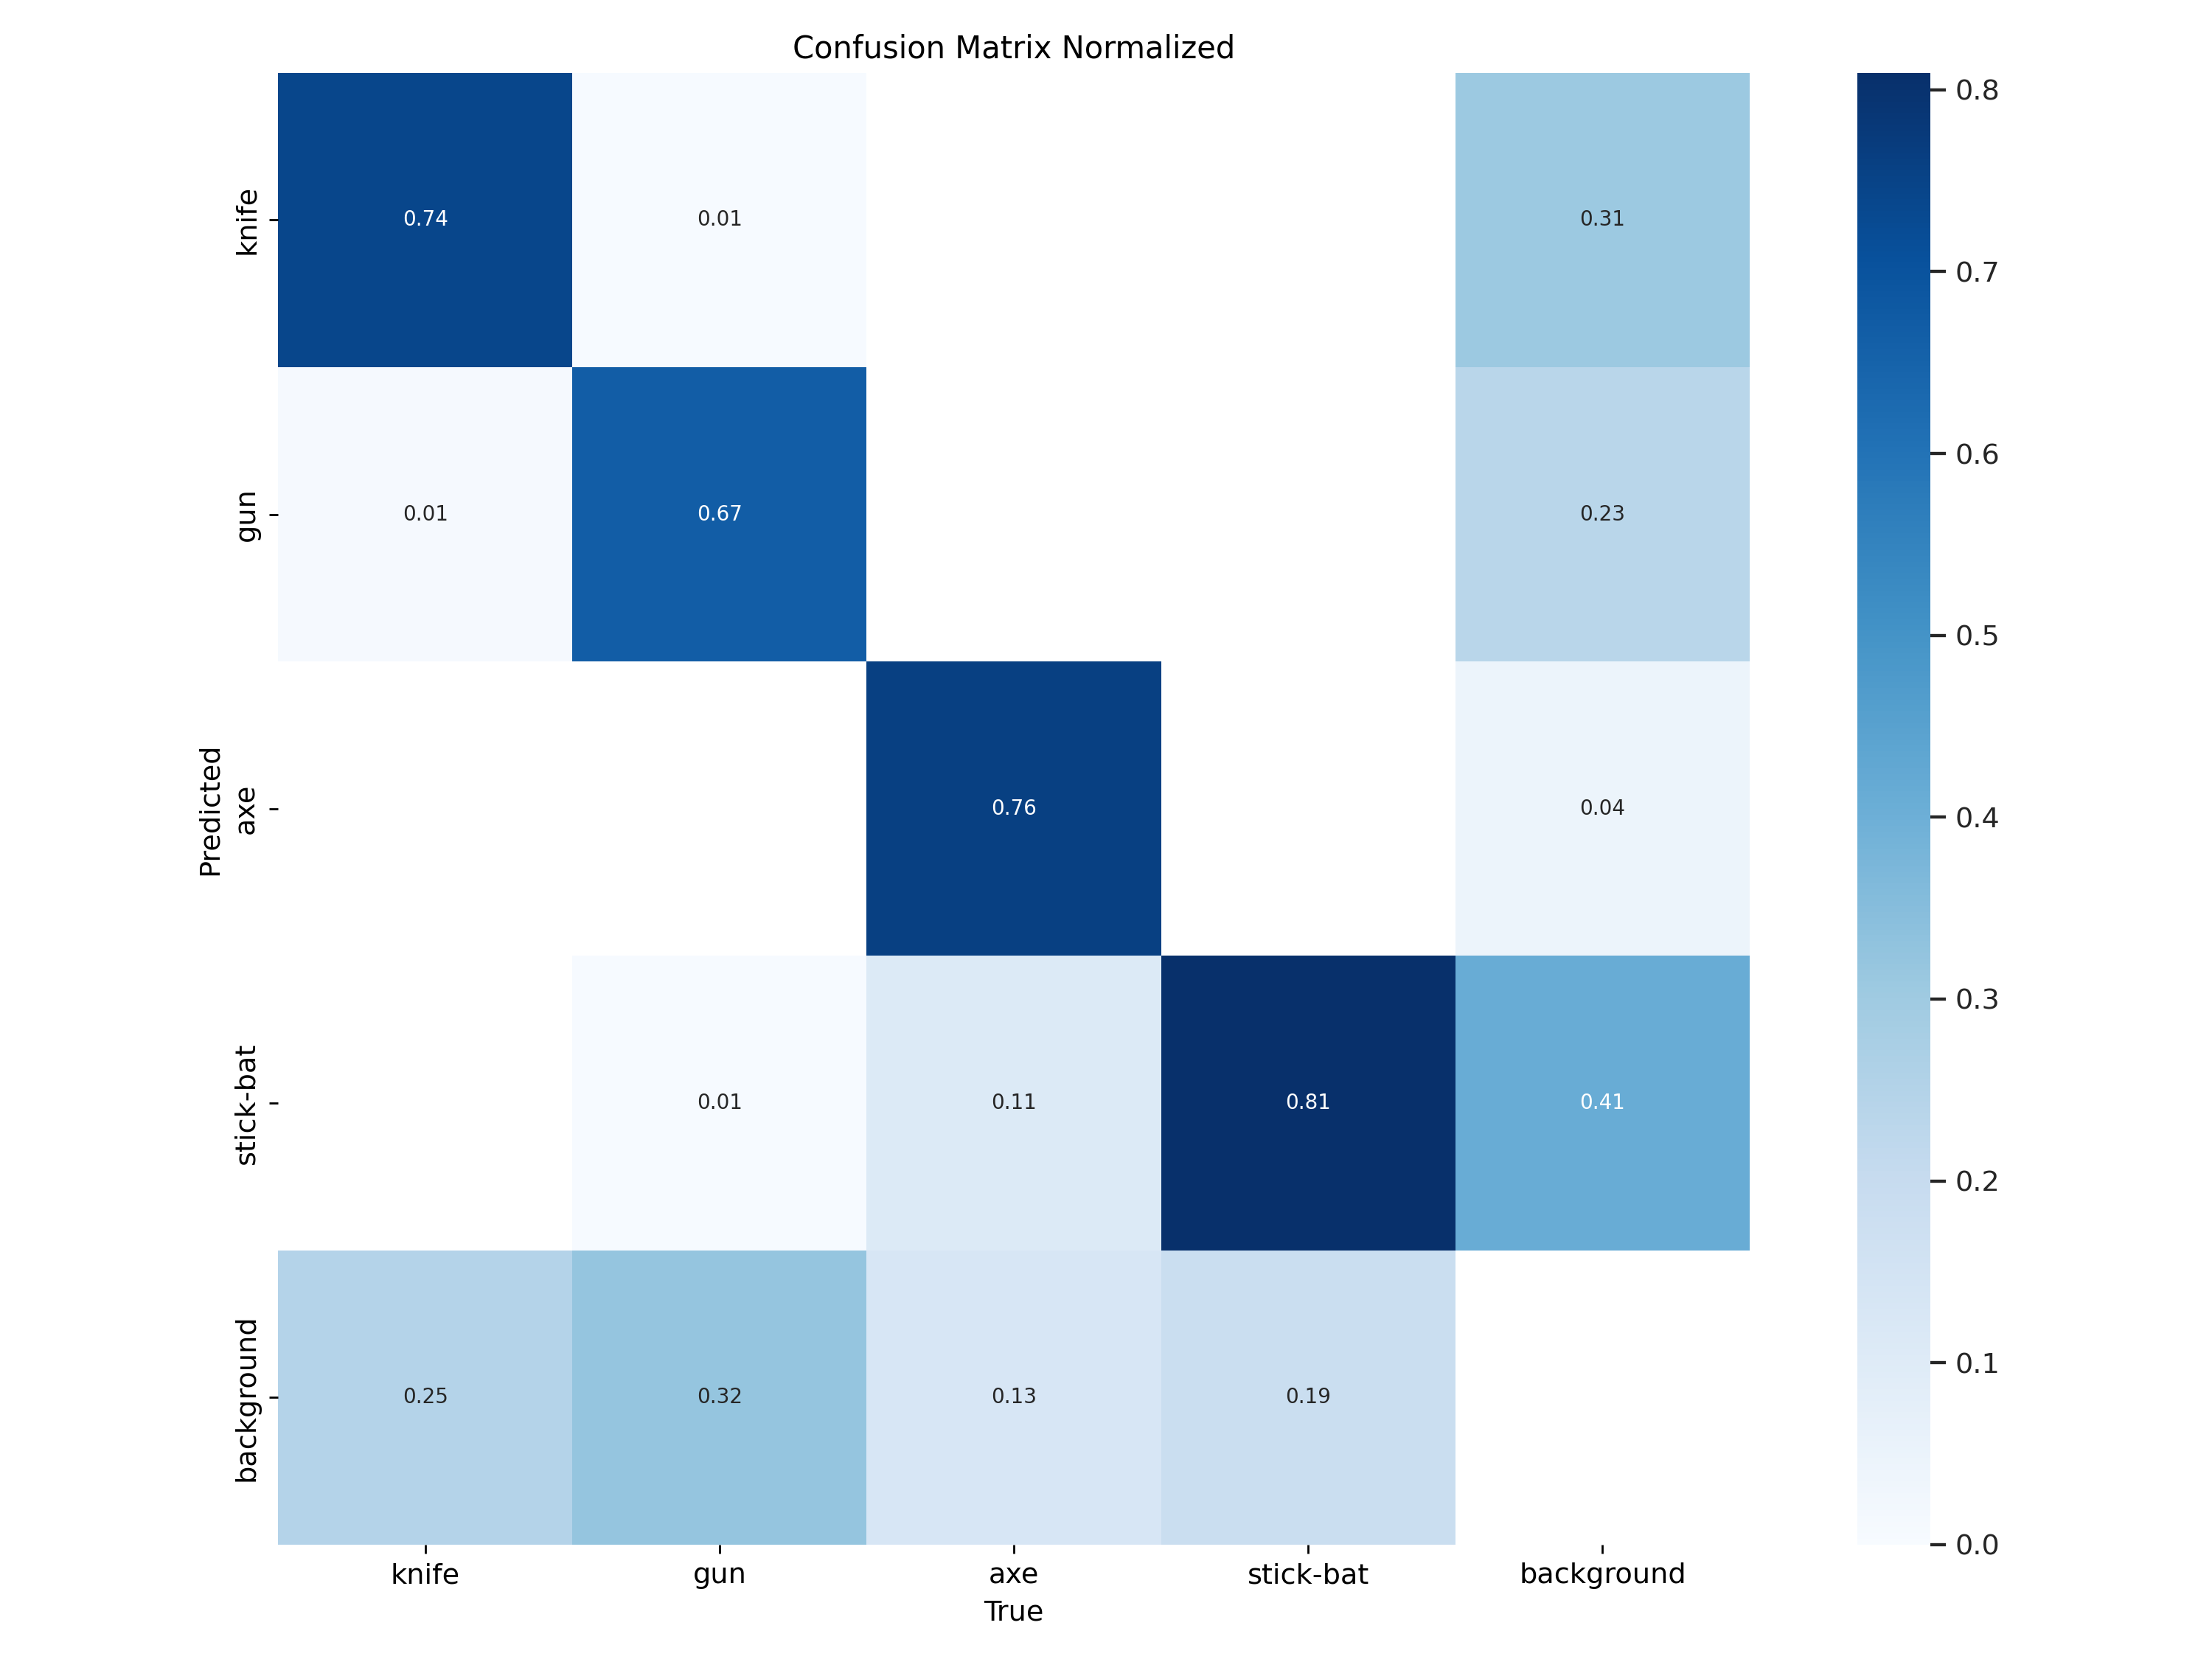

In [ ]:
display(Image(filename='runs/detect/val/confusion_matrix.png'))
display(Image(filename='runs/detect/val/confusion_matrix_normalized.png'))

# **Retraining the model with more training epochs**

In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8s.pt")

model.train(
    data="/content/data.yaml",
    epochs=50,
    imgsz=640,
    batch=16,
    patience=10,
    name="train1"
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 21.5M/21.5M [00:00<00:00, 270MB/s]


Ultralytics 8.3.123 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/data.yaml, epochs=50, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train1, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, fo

100%|██████████| 755k/755k [00:00<00:00, 21.2MB/s]

Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

 22        [15, 18, 21]  1   2117596  ultralytics.nn.modules.head.Detect           [4, [128, 256, 512]]          
Model summary: 129 layers, 11,137,148 parameters, 11,137,132 gradients, 28.7 GFLOPs

Transferred 349/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 80.0MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 851.6±299.2 MB/s, size: 55.1 KB)


train: Scanning /content/final_dataset/train/labels... 1633 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1633/1633 [00:00<00:00, 2531.44it/s]

train: New cache created: /content/final_dataset/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 242, len(boxes) = 2157. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.1±0.2 ms, read: 612.0±428.6 MB/s, size: 34.6 KB)


val: Scanning /content/final_dataset/valid/labels... 455 images, 0 backgrounds, 0 corrupt: 100%|██████████| 455/455 [00:00<00:00, 993.87it/s]

val: New cache created: /content/final_dataset/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 53, len(boxes) = 605. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train1/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train1
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      3.72G      1.583      2.865      1.747          3        640: 100%|██████████| 103/103 [00:34<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.40it/s]


                   all        455        605      0.272      0.223      0.182     0.0935

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.52G      1.722      2.522      1.849         11        640: 100%|██████████| 103/103 [00:31<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.53it/s]

                   all        455        605      0.324      0.116     0.0339     0.0103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.56G      1.812      2.688      1.946          2        640: 100%|██████████| 103/103 [00:31<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.80it/s]

                   all        455        605      0.294     0.0763     0.0185    0.00546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.61G      1.864      2.802          2          6        640: 100%|██████████| 103/103 [00:31<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.38it/s]

                   all        455        605      0.094      0.217     0.0764     0.0281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.64G      1.802      2.673       1.95          4        640: 100%|██████████| 103/103 [00:31<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.11it/s]

                   all        455        605       0.19      0.173      0.135     0.0553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.68G      1.753      2.581      1.914          1        640: 100%|██████████| 103/103 [00:30<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.19it/s]


                   all        455        605      0.463      0.277      0.183     0.0887

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50       4.7G      1.699      2.398      1.857          2        640: 100%|██████████| 103/103 [00:31<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.47it/s]

                   all        455        605      0.309      0.379      0.271      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.75G      1.624      2.338      1.804          5        640: 100%|██████████| 103/103 [00:30<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.92it/s]

                   all        455        605      0.319      0.348      0.262      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.79G      1.599      2.268      1.785          2        640: 100%|██████████| 103/103 [00:30<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.55it/s]

                   all        455        605       0.54      0.322       0.33      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.83G      1.565      2.233       1.76          1        640: 100%|██████████| 103/103 [00:31<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.83it/s]

                   all        455        605      0.445      0.369      0.355      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.85G      1.544      2.204      1.724          4        640: 100%|██████████| 103/103 [00:30<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.57it/s]

                   all        455        605      0.445      0.401       0.36      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50       4.9G      1.504      2.064      1.704          3        640: 100%|██████████| 103/103 [00:31<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.07it/s]

                   all        455        605      0.572      0.442      0.457      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.94G      1.476      1.966      1.674          2        640: 100%|██████████| 103/103 [00:30<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.27it/s]


                   all        455        605      0.488      0.438      0.434       0.25

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.97G      1.423      1.985      1.636          0        640: 100%|██████████| 103/103 [00:31<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.51it/s]

                   all        455        605      0.535      0.455      0.463      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.99G      1.452      1.918      1.651         12        640: 100%|██████████| 103/103 [00:31<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.06it/s]


                   all        455        605      0.663      0.493       0.54      0.293

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      5.04G      1.408      1.826      1.611          2        640: 100%|██████████| 103/103 [00:30<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.61it/s]

                   all        455        605      0.594      0.488      0.524      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      5.08G      1.394      1.822       1.62          1        640: 100%|██████████| 103/103 [00:30<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.87it/s]

                   all        455        605       0.72      0.448      0.552       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      5.12G      1.378      1.777      1.588          1        640: 100%|██████████| 103/103 [00:30<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.51it/s]

                   all        455        605      0.652      0.502       0.58      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      5.14G      1.374      1.727      1.601          2        640: 100%|██████████| 103/103 [00:30<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.88it/s]

                   all        455        605      0.697      0.532      0.613      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      5.19G      1.321      1.697      1.555          2        640: 100%|██████████| 103/103 [00:30<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.56it/s]

                   all        455        605       0.68      0.512      0.607       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      5.22G      1.332      1.668      1.562          2        640: 100%|██████████| 103/103 [00:31<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.23it/s]

                   all        455        605       0.68      0.528      0.613      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      5.26G      1.336      1.617      1.559          3        640: 100%|██████████| 103/103 [00:30<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.46it/s]

                   all        455        605      0.748      0.536      0.648      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      5.28G      1.285      1.541      1.521          2        640: 100%|██████████| 103/103 [00:31<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.39it/s]

                   all        455        605      0.782      0.504      0.633      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      5.33G      1.284      1.561      1.524          1        640: 100%|██████████| 103/103 [00:30<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.14it/s]


                   all        455        605      0.716      0.551      0.646      0.392

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      5.37G      1.249      1.515      1.507          2        640: 100%|██████████| 103/103 [00:30<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.53it/s]

                   all        455        605      0.677      0.584      0.679      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      5.41G      1.232      1.466       1.48          5        640: 100%|██████████| 103/103 [00:30<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.91it/s]

                   all        455        605      0.714      0.599      0.678      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      5.75G      1.253      1.482      1.497          1        640: 100%|██████████| 103/103 [00:30<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.49it/s]

                   all        455        605      0.776      0.638      0.736      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50       5.8G      1.243      1.471      1.469          0        640: 100%|██████████| 103/103 [00:31<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.83it/s]

                   all        455        605      0.748      0.597      0.703      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      5.84G      1.213      1.425       1.47          2        640: 100%|██████████| 103/103 [00:30<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.50it/s]

                   all        455        605       0.69      0.626      0.707      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      5.88G      1.208       1.36      1.448          2        640: 100%|██████████| 103/103 [00:31<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.05it/s]

                   all        455        605      0.818      0.626      0.735       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50       5.9G      1.197      1.365      1.458          2        640: 100%|██████████| 103/103 [00:31<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.34it/s]

                   all        455        605      0.749      0.675      0.745      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      5.95G      1.151      1.299      1.415          3        640: 100%|██████████| 103/103 [00:31<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.45it/s]

                   all        455        605      0.809      0.641      0.747      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      5.99G      1.173      1.274      1.426          4        640: 100%|██████████| 103/103 [00:30<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.06it/s]

                   all        455        605      0.803      0.607       0.74      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      6.02G      1.134       1.25      1.405          5        640: 100%|██████████| 103/103 [00:30<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.50it/s]

                   all        455        605      0.806      0.681      0.769      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      6.04G      1.141      1.242      1.402          3        640: 100%|██████████| 103/103 [00:30<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.84it/s]

                   all        455        605      0.786      0.653      0.735      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      6.09G       1.14      1.273      1.403          1        640: 100%|██████████| 103/103 [00:30<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.59it/s]

                   all        455        605       0.81      0.649      0.769       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      6.13G      1.137      1.246      1.411          8        640: 100%|██████████| 103/103 [00:30<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.89it/s]

                   all        455        605      0.801      0.691      0.759      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      6.17G      1.105      1.175      1.374          4        640: 100%|██████████| 103/103 [00:31<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.53it/s]

                   all        455        605       0.79      0.676      0.783       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      6.19G      1.092      1.173      1.374          1        640: 100%|██████████| 103/103 [00:31<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.25it/s]

                   all        455        605      0.865      0.681      0.797      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      6.24G      1.064      1.127      1.341          2        640: 100%|██████████| 103/103 [00:30<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.25it/s]

                   all        455        605        0.9      0.663      0.806      0.545


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      6.28G      1.037     0.9153      1.343          1        640: 100%|██████████| 103/103 [00:31<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.55it/s]

                   all        455        605      0.788       0.69      0.775      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      6.31G     0.9988     0.8765      1.322          1        640: 100%|██████████| 103/103 [00:30<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.84it/s]

                   all        455        605      0.814       0.72        0.8      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      6.33G     0.9655     0.7985      1.288          1        640: 100%|██████████| 103/103 [00:29<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.57it/s]

                   all        455        605       0.87      0.749      0.827      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      6.38G     0.9523     0.8109      1.291          1        640: 100%|██████████| 103/103 [00:30<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.89it/s]


                   all        455        605       0.88      0.718      0.812      0.551

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      6.42G     0.9183     0.7653      1.263          1        640: 100%|██████████| 103/103 [00:30<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.61it/s]

                   all        455        605      0.855      0.732      0.815      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      6.46G     0.9102     0.7539      1.269          1        640: 100%|██████████| 103/103 [00:29<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.04it/s]


                   all        455        605      0.832      0.718      0.805      0.546

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      6.48G     0.8837     0.6963      1.237          1        640: 100%|██████████| 103/103 [00:30<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.57it/s]

                   all        455        605      0.864       0.71      0.809      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      6.53G     0.8764     0.6962      1.233          1        640: 100%|██████████| 103/103 [00:29<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.08it/s]

                   all        455        605      0.861       0.73      0.816      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      6.57G     0.8669      0.694      1.231          1        640: 100%|██████████| 103/103 [00:30<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.57it/s]

                   all        455        605      0.871      0.718      0.813      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50       6.6G     0.8589     0.7032      1.229          7        640: 100%|██████████| 103/103 [00:30<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.17it/s]

                   all        455        605      0.885       0.71      0.812      0.555



50 epochs completed in 0.503 hours.
Optimizer stripped from runs/detect/train1/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train1/weights/best.pt, 22.5MB

Validating runs/detect/train1/weights/best.pt...
Ultralytics 8.3.123 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.54it/s]


                   all        455        605       0.86      0.731      0.816      0.559
                 knife        143        166      0.821      0.711      0.799      0.521
                   gun        130        178      0.878      0.674      0.754      0.526
                   axe         35         46      0.881      0.802       0.86      0.644
             stick-bat        147        215      0.859      0.735      0.849      0.544
Speed: 0.2ms preprocess, 4.8ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to runs/detect/train1


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d82787157d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

In [ ]:
!cp runs/detect/train1/weights/best.pt /content/drive/MyDrive/best1.pt

In [ ]:
!cp -r runs/detect/train1 /content/drive/MyDrive/yolo_training_logs2/

# **Traning result**

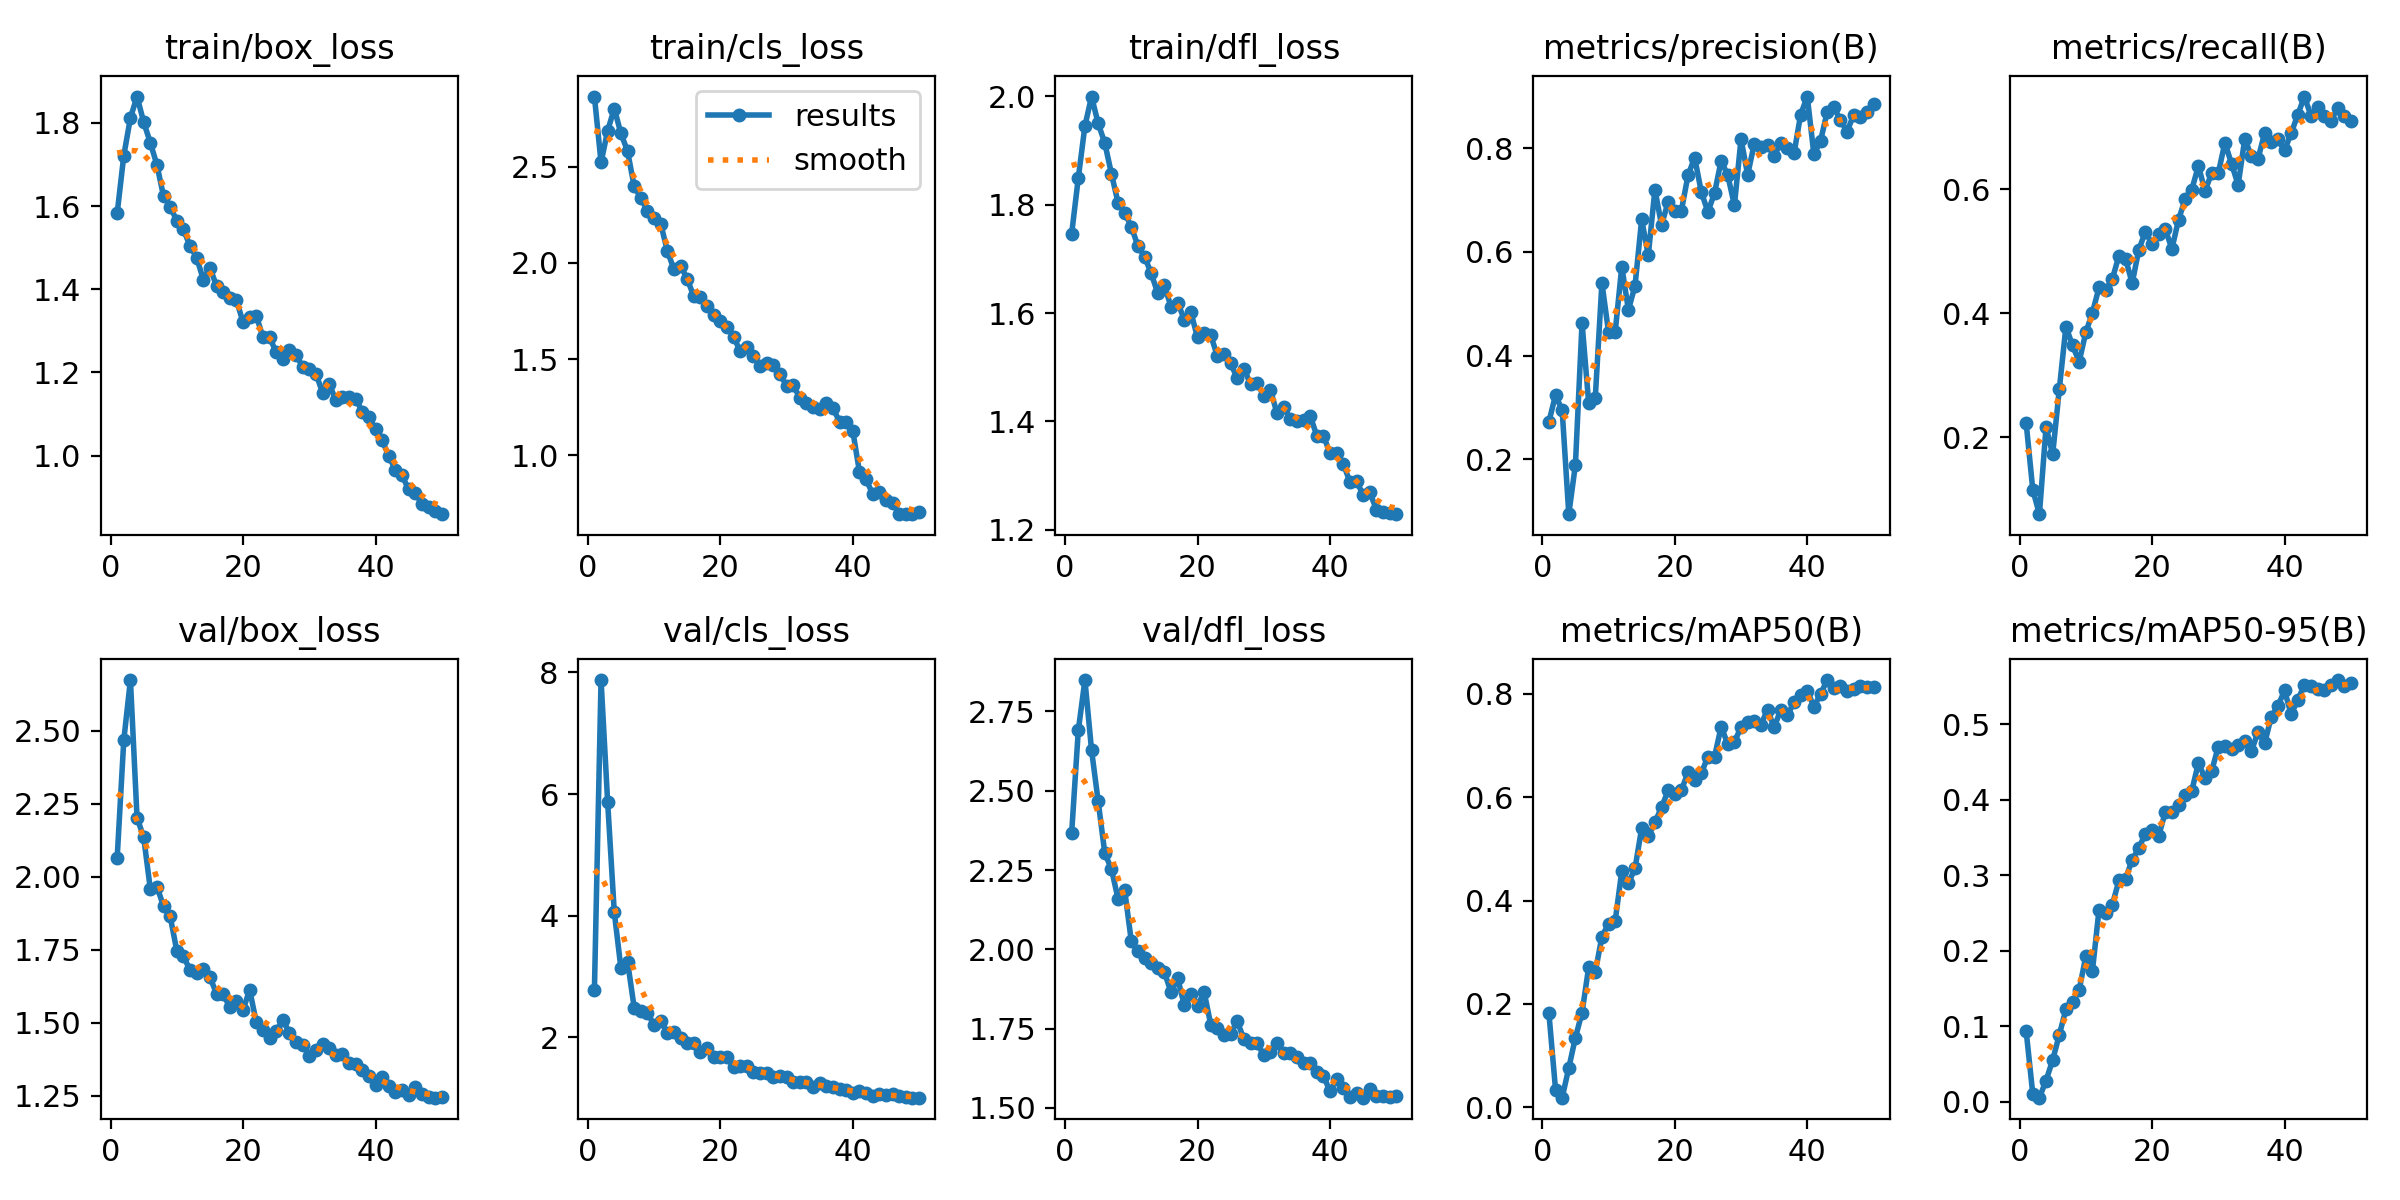

In [ ]:
from IPython.display import Image, display

display(Image(filename='runs/detect/train1/results.png'))

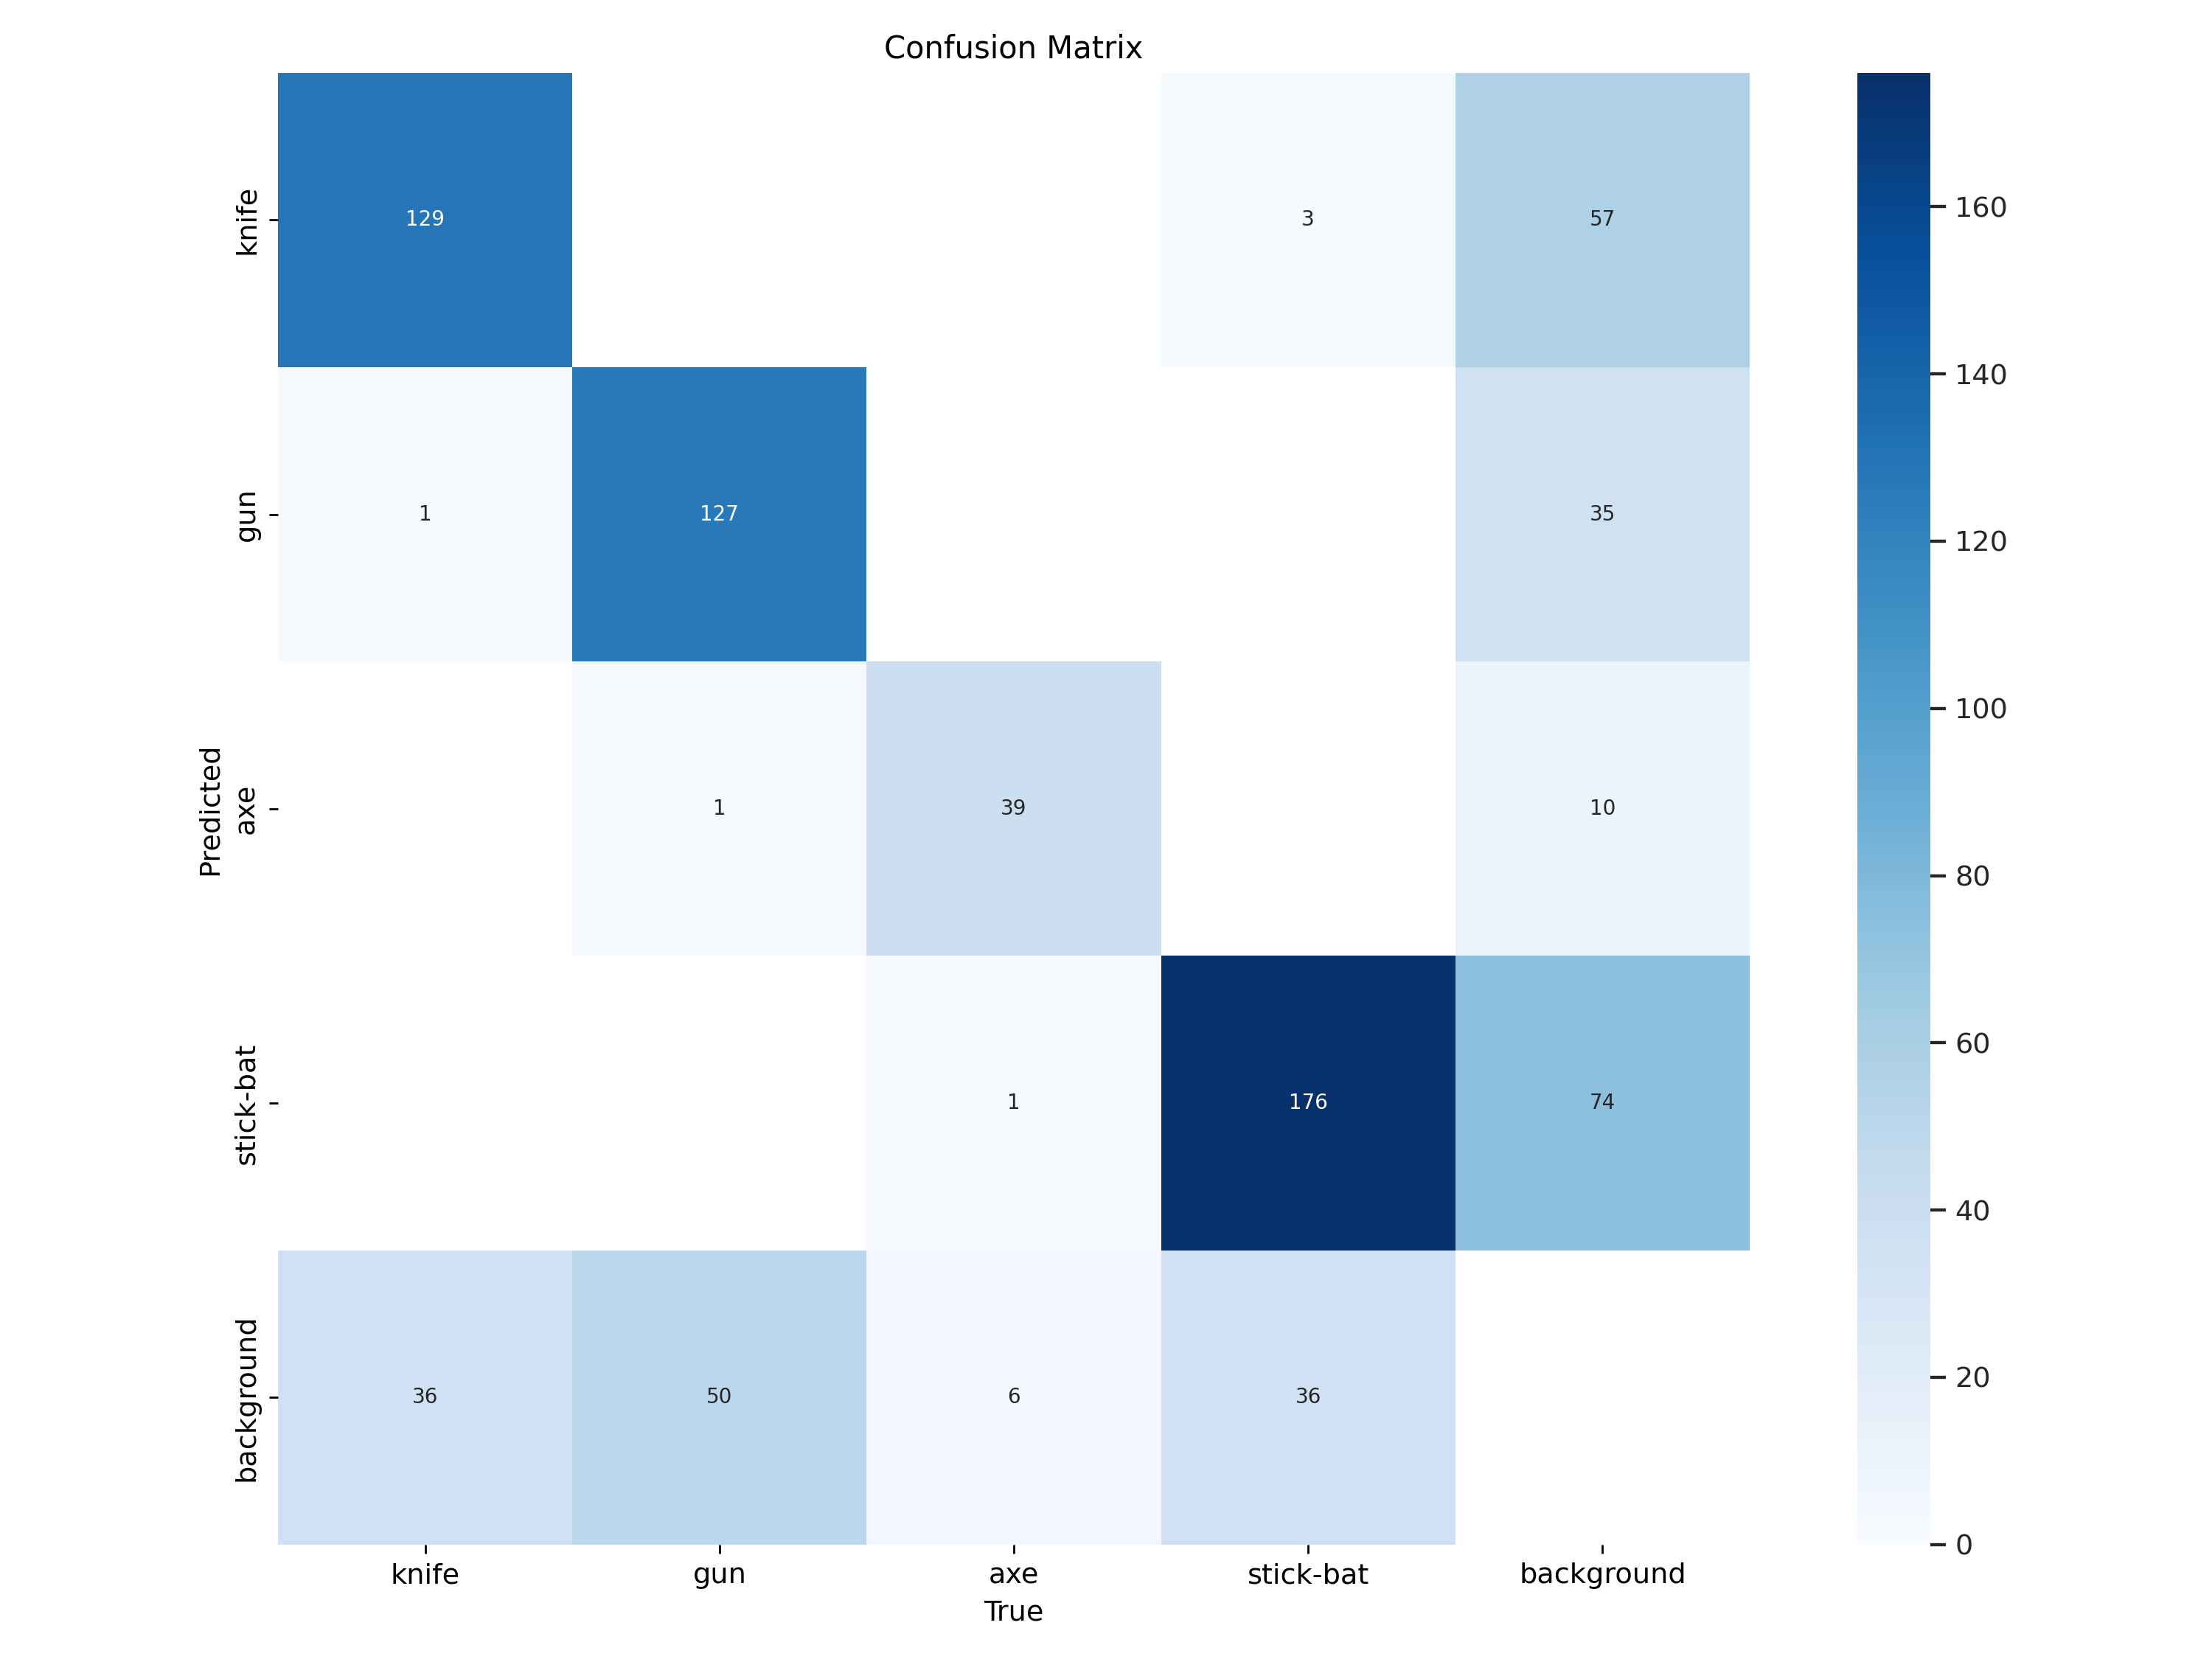

In [ ]:
display(Image(filename='runs/detect/train1/confusion_matrix.png'))

In [ ]:
from ultralytics import YOLO

model = YOLO('runs/detect/train1/weights/best.pt')

results = model.val()

Ultralytics 8.3.123 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 924.8±520.6 MB/s, size: 26.3 KB)


val: Scanning /content/final_dataset/valid/labels.cache... 455 images, 0 backgrounds, 0 corrupt: 100%|██████████| 455/455 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 53, len(boxes) = 605. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.53it/s]


                   all        455        605      0.858      0.729      0.811      0.558
                 knife        143        166      0.821      0.711      0.794      0.521
                   gun        130        178      0.871      0.669      0.747      0.526
                   axe         35         46      0.881      0.802       0.86      0.642
             stick-bat        147        215       0.86      0.735      0.844      0.543
Speed: 1.3ms preprocess, 9.6ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/val


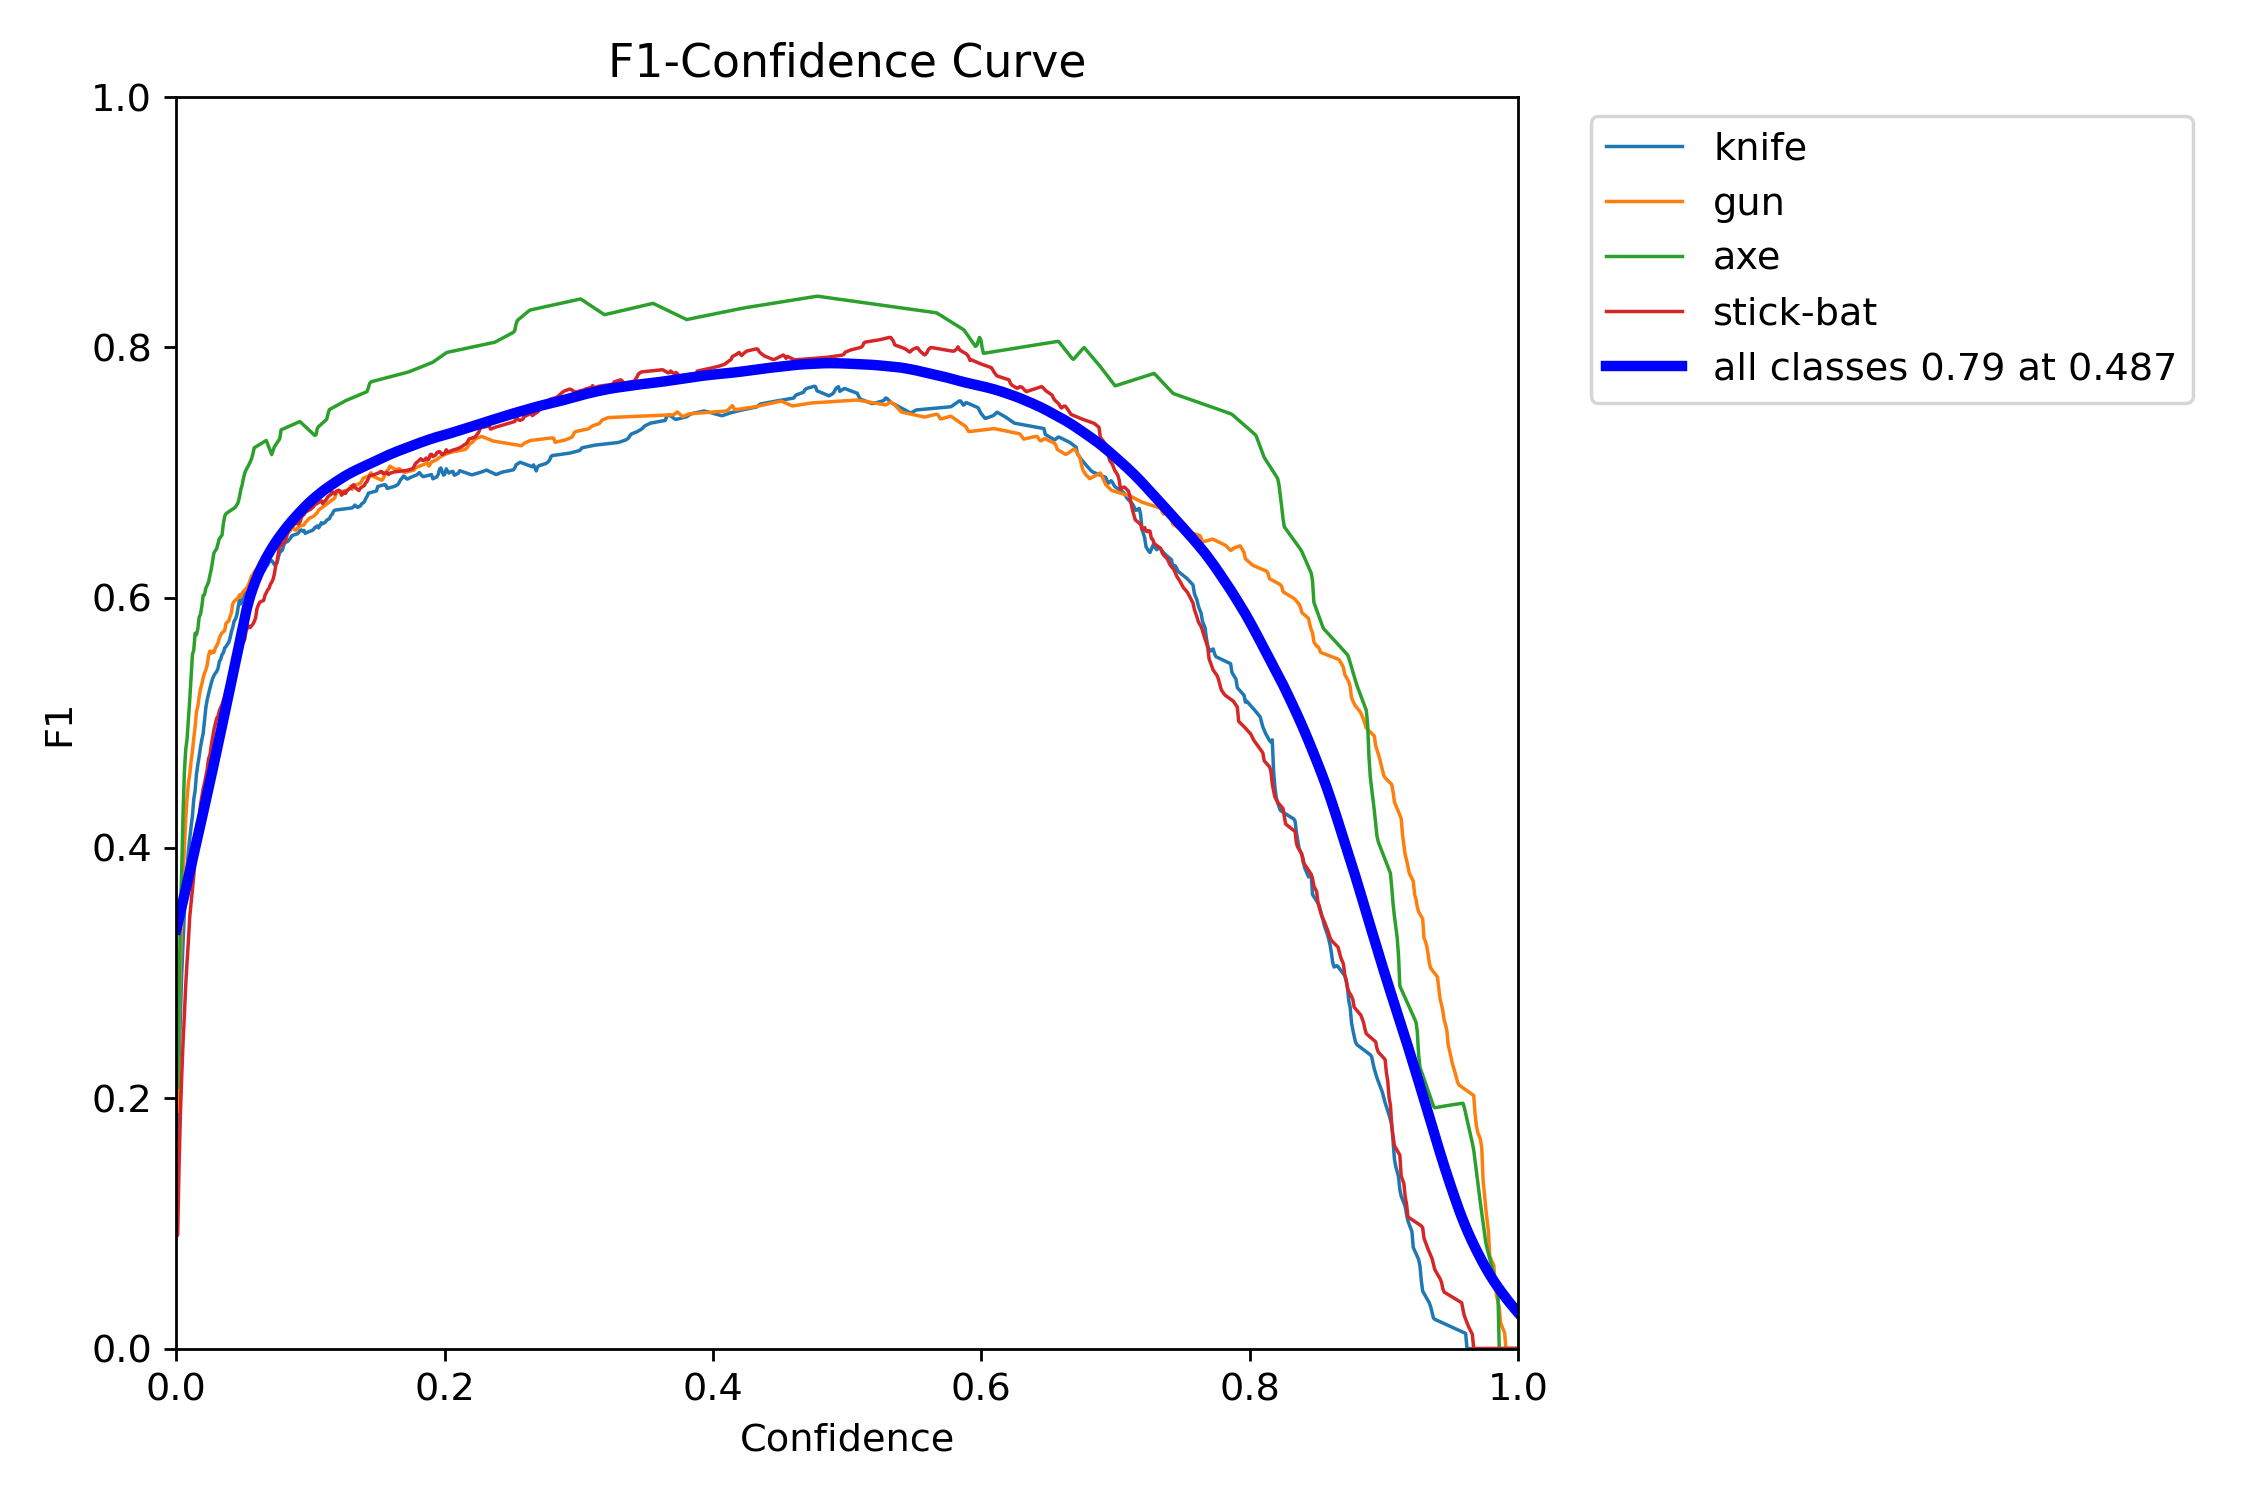

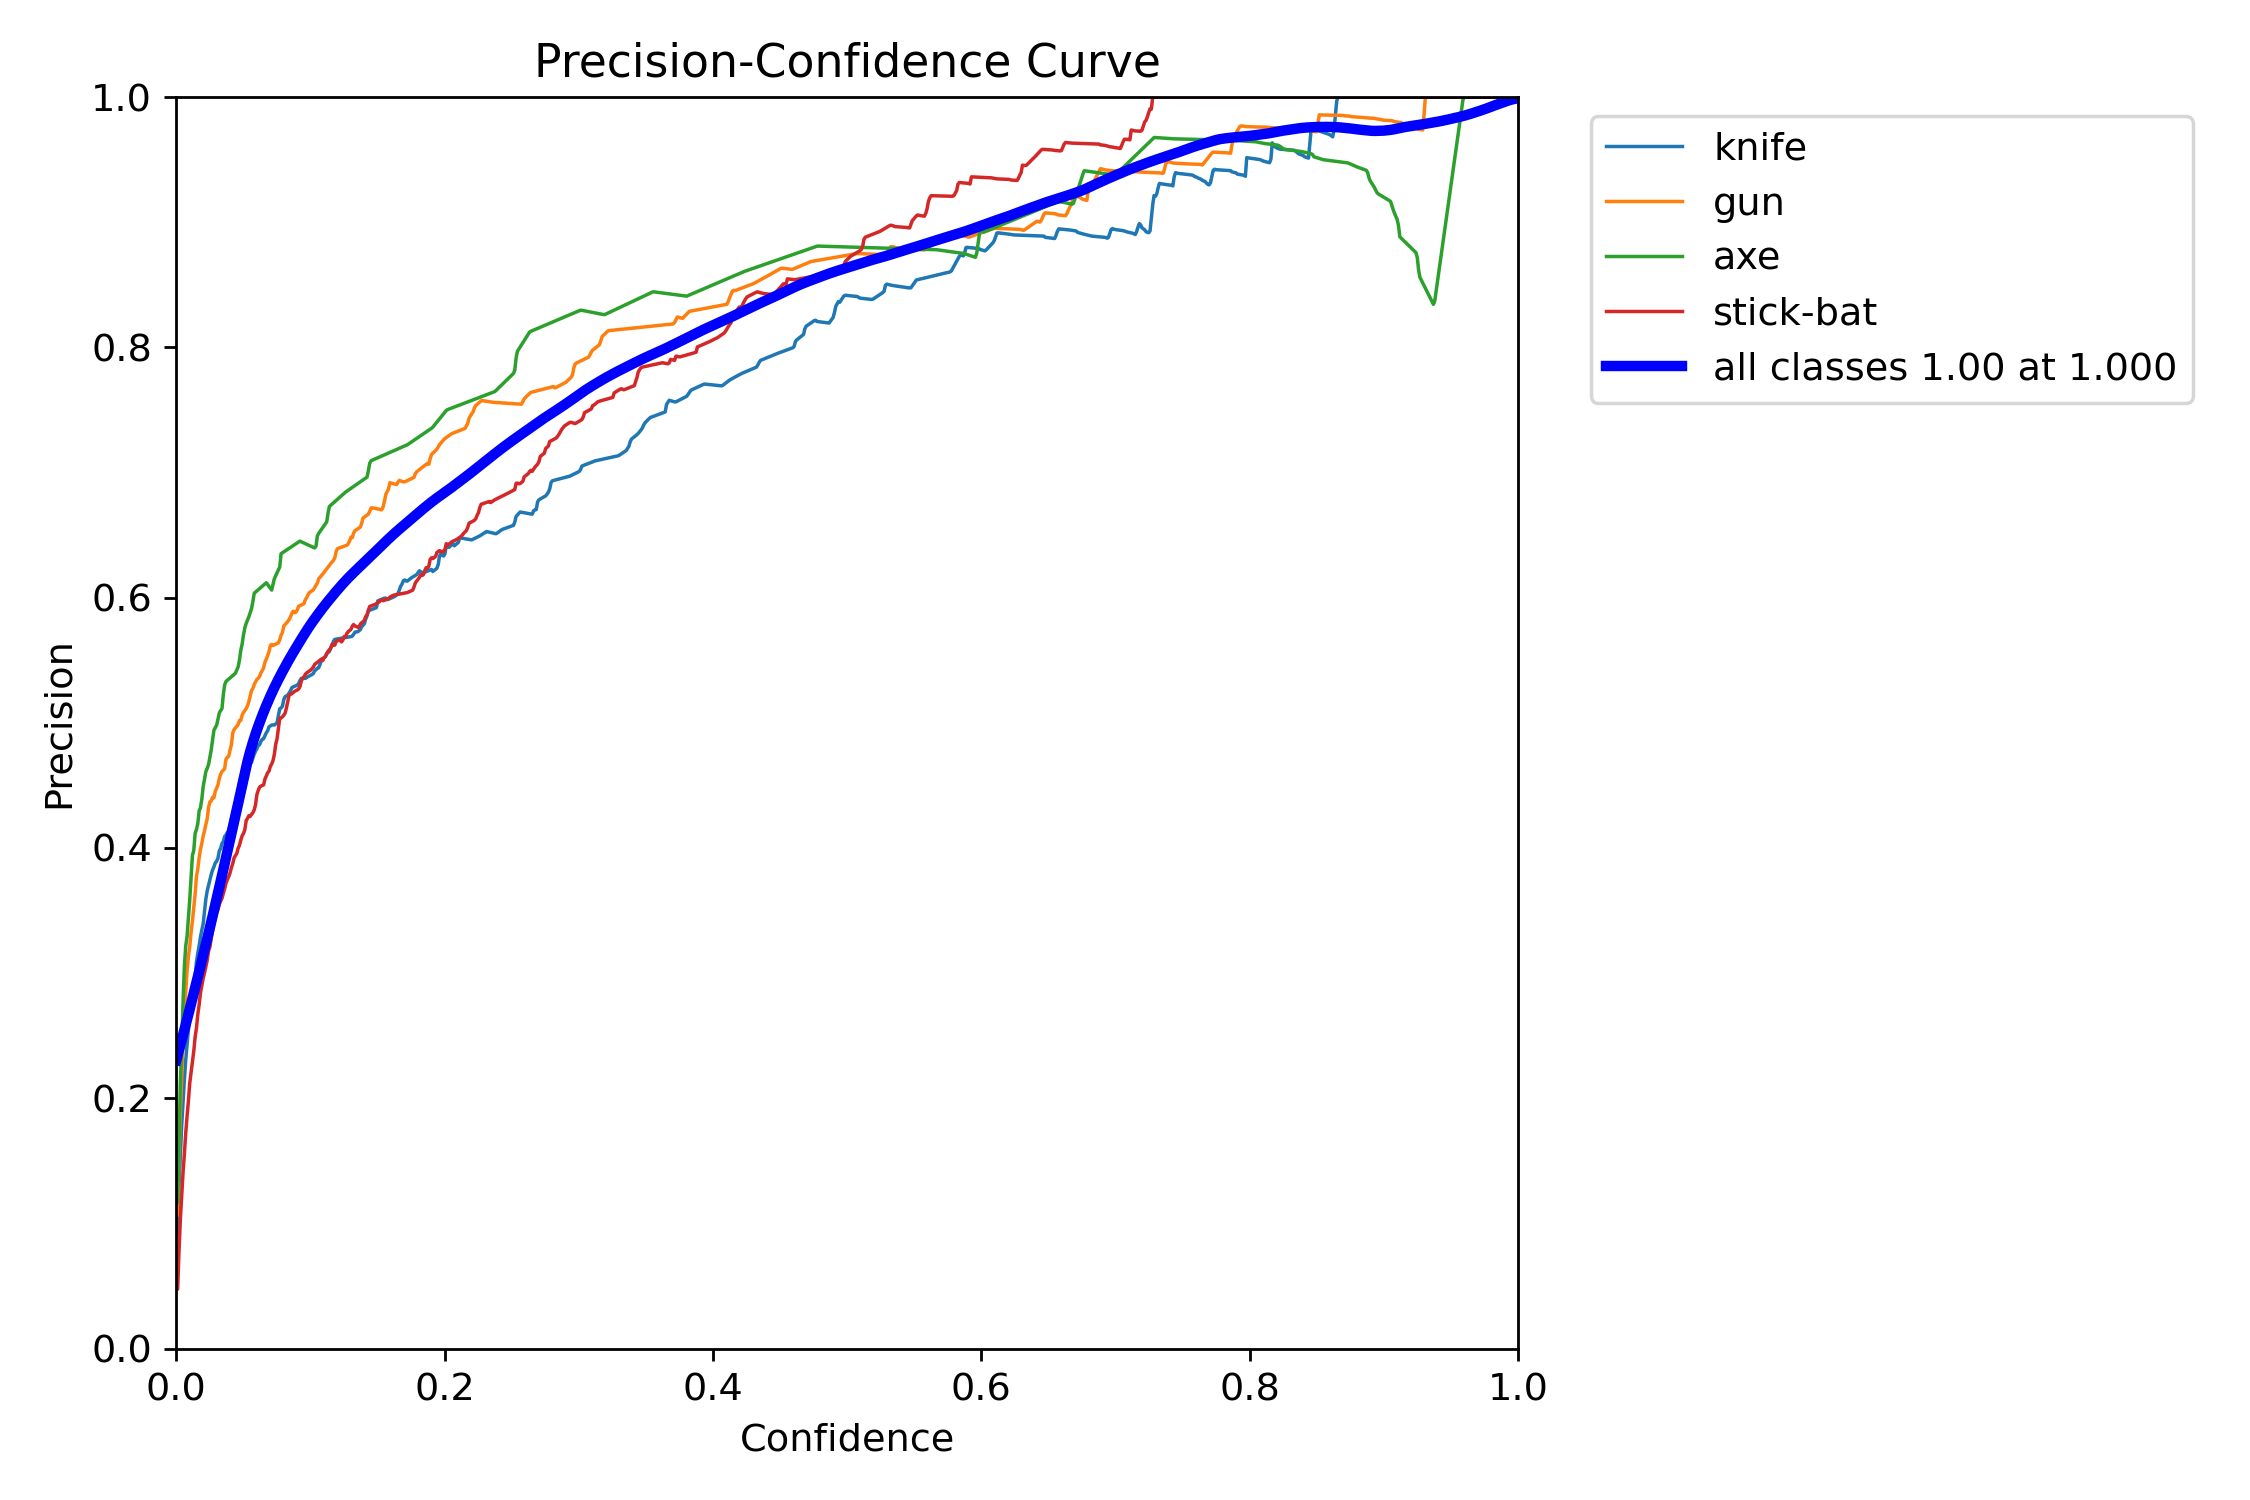

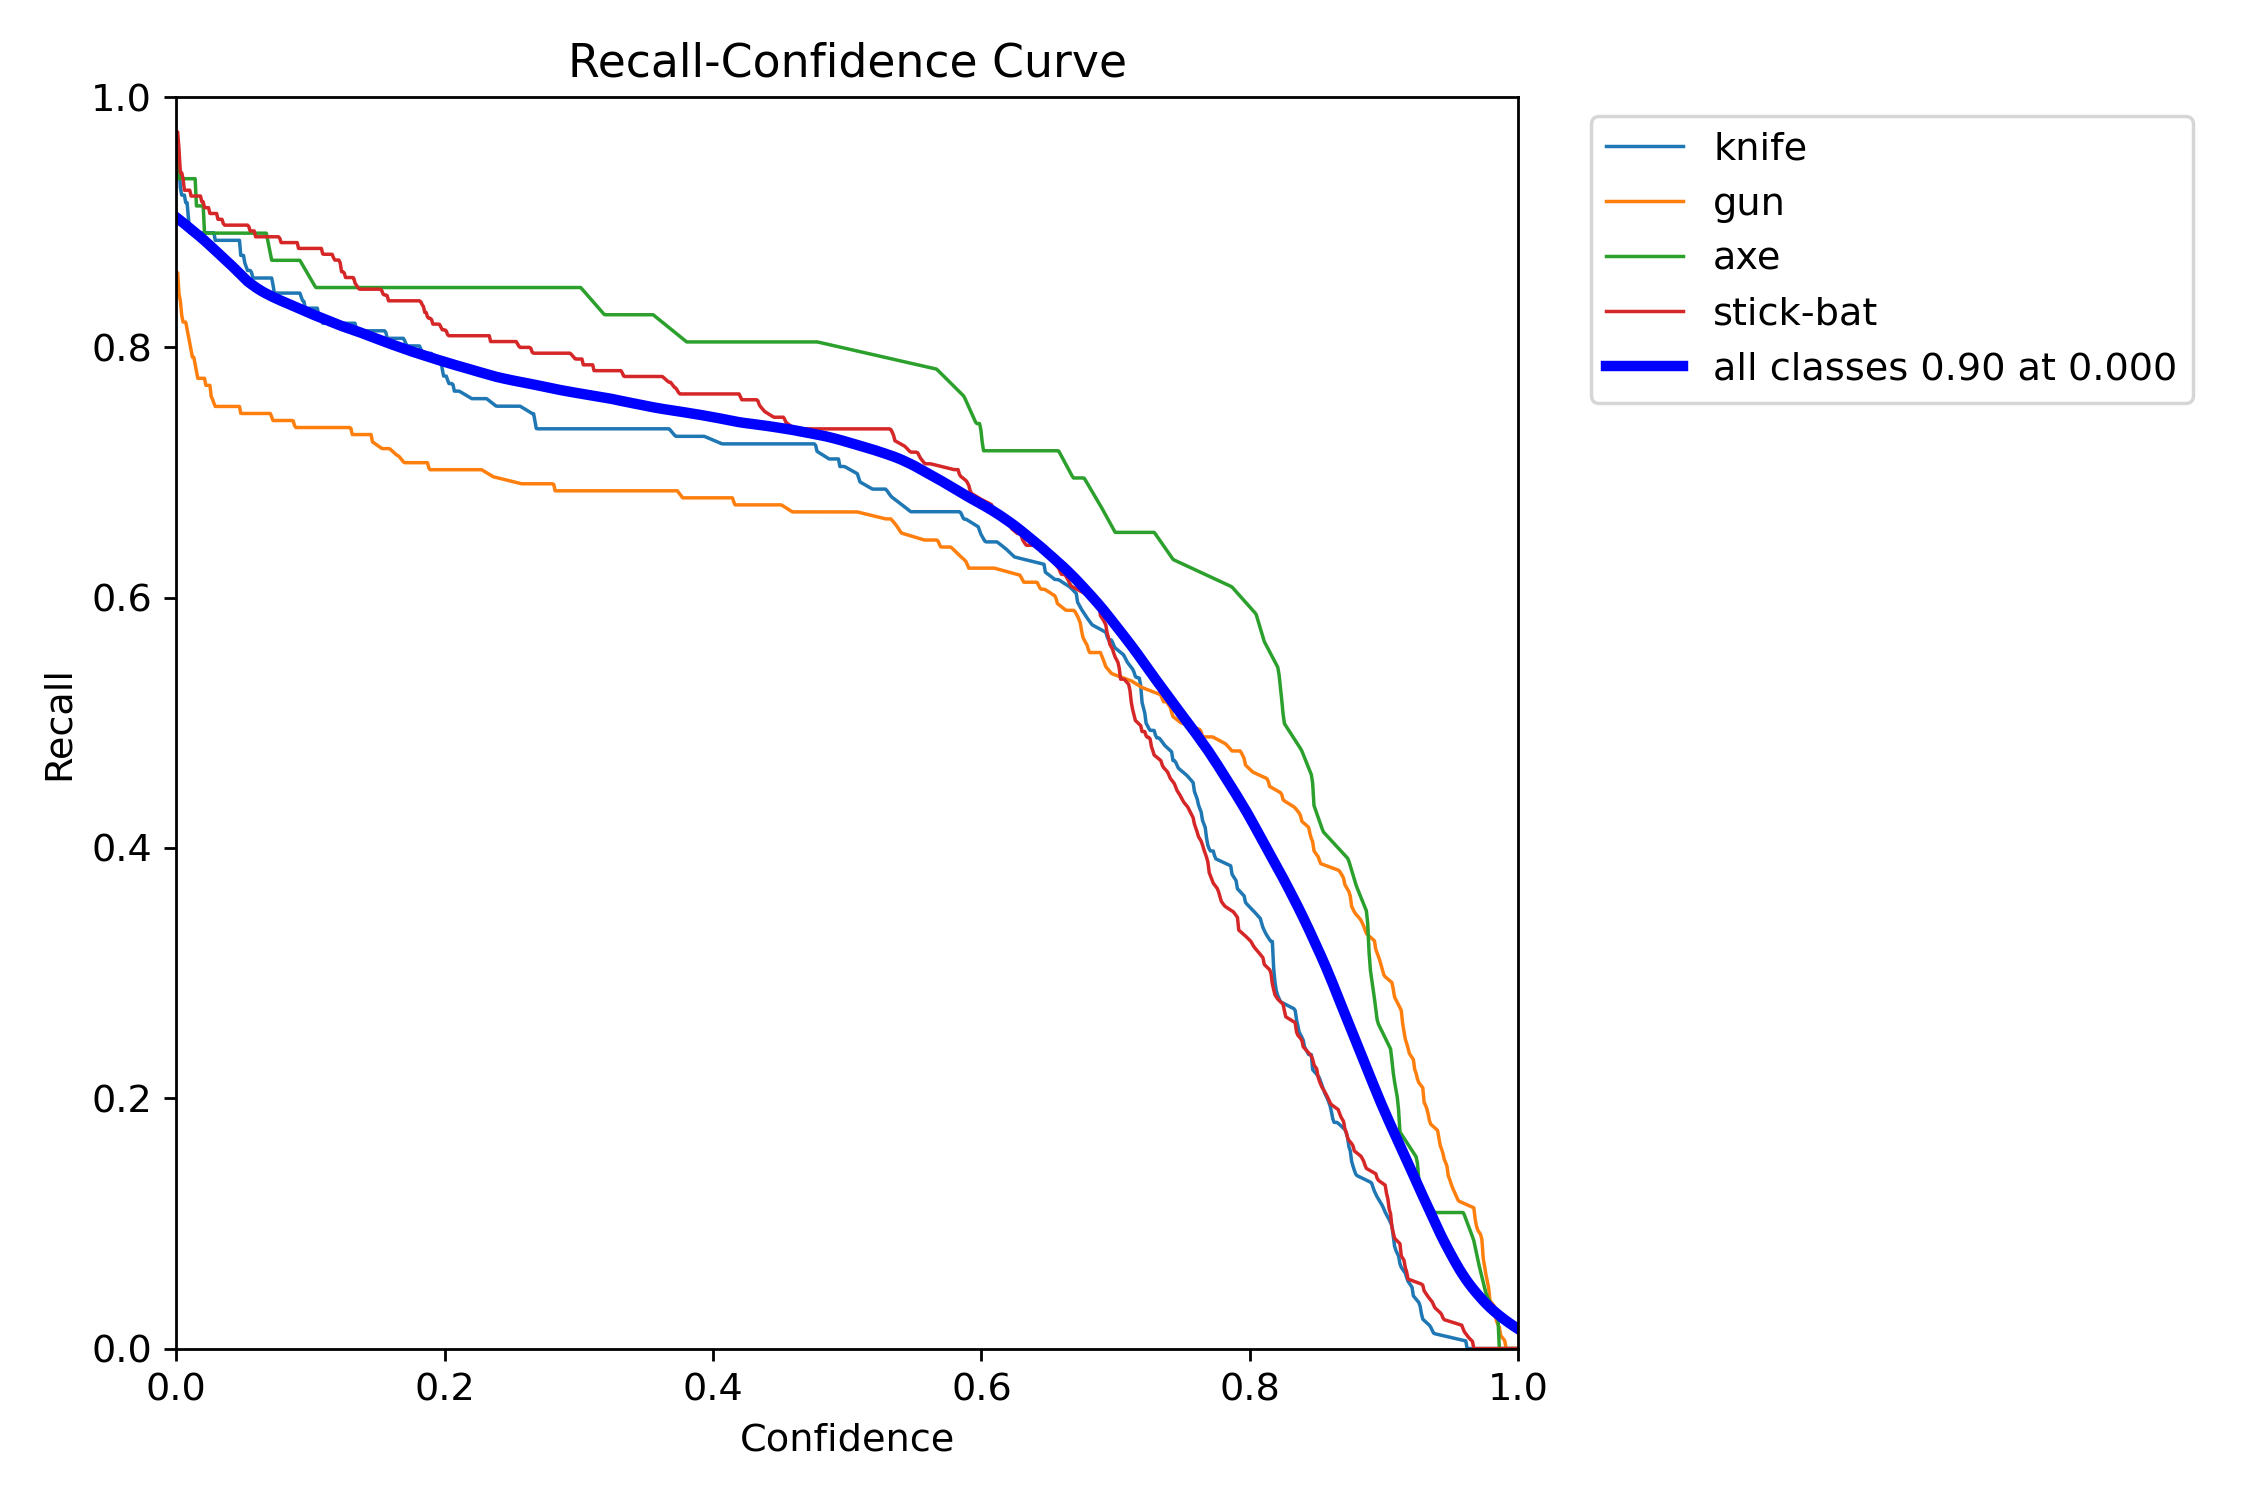

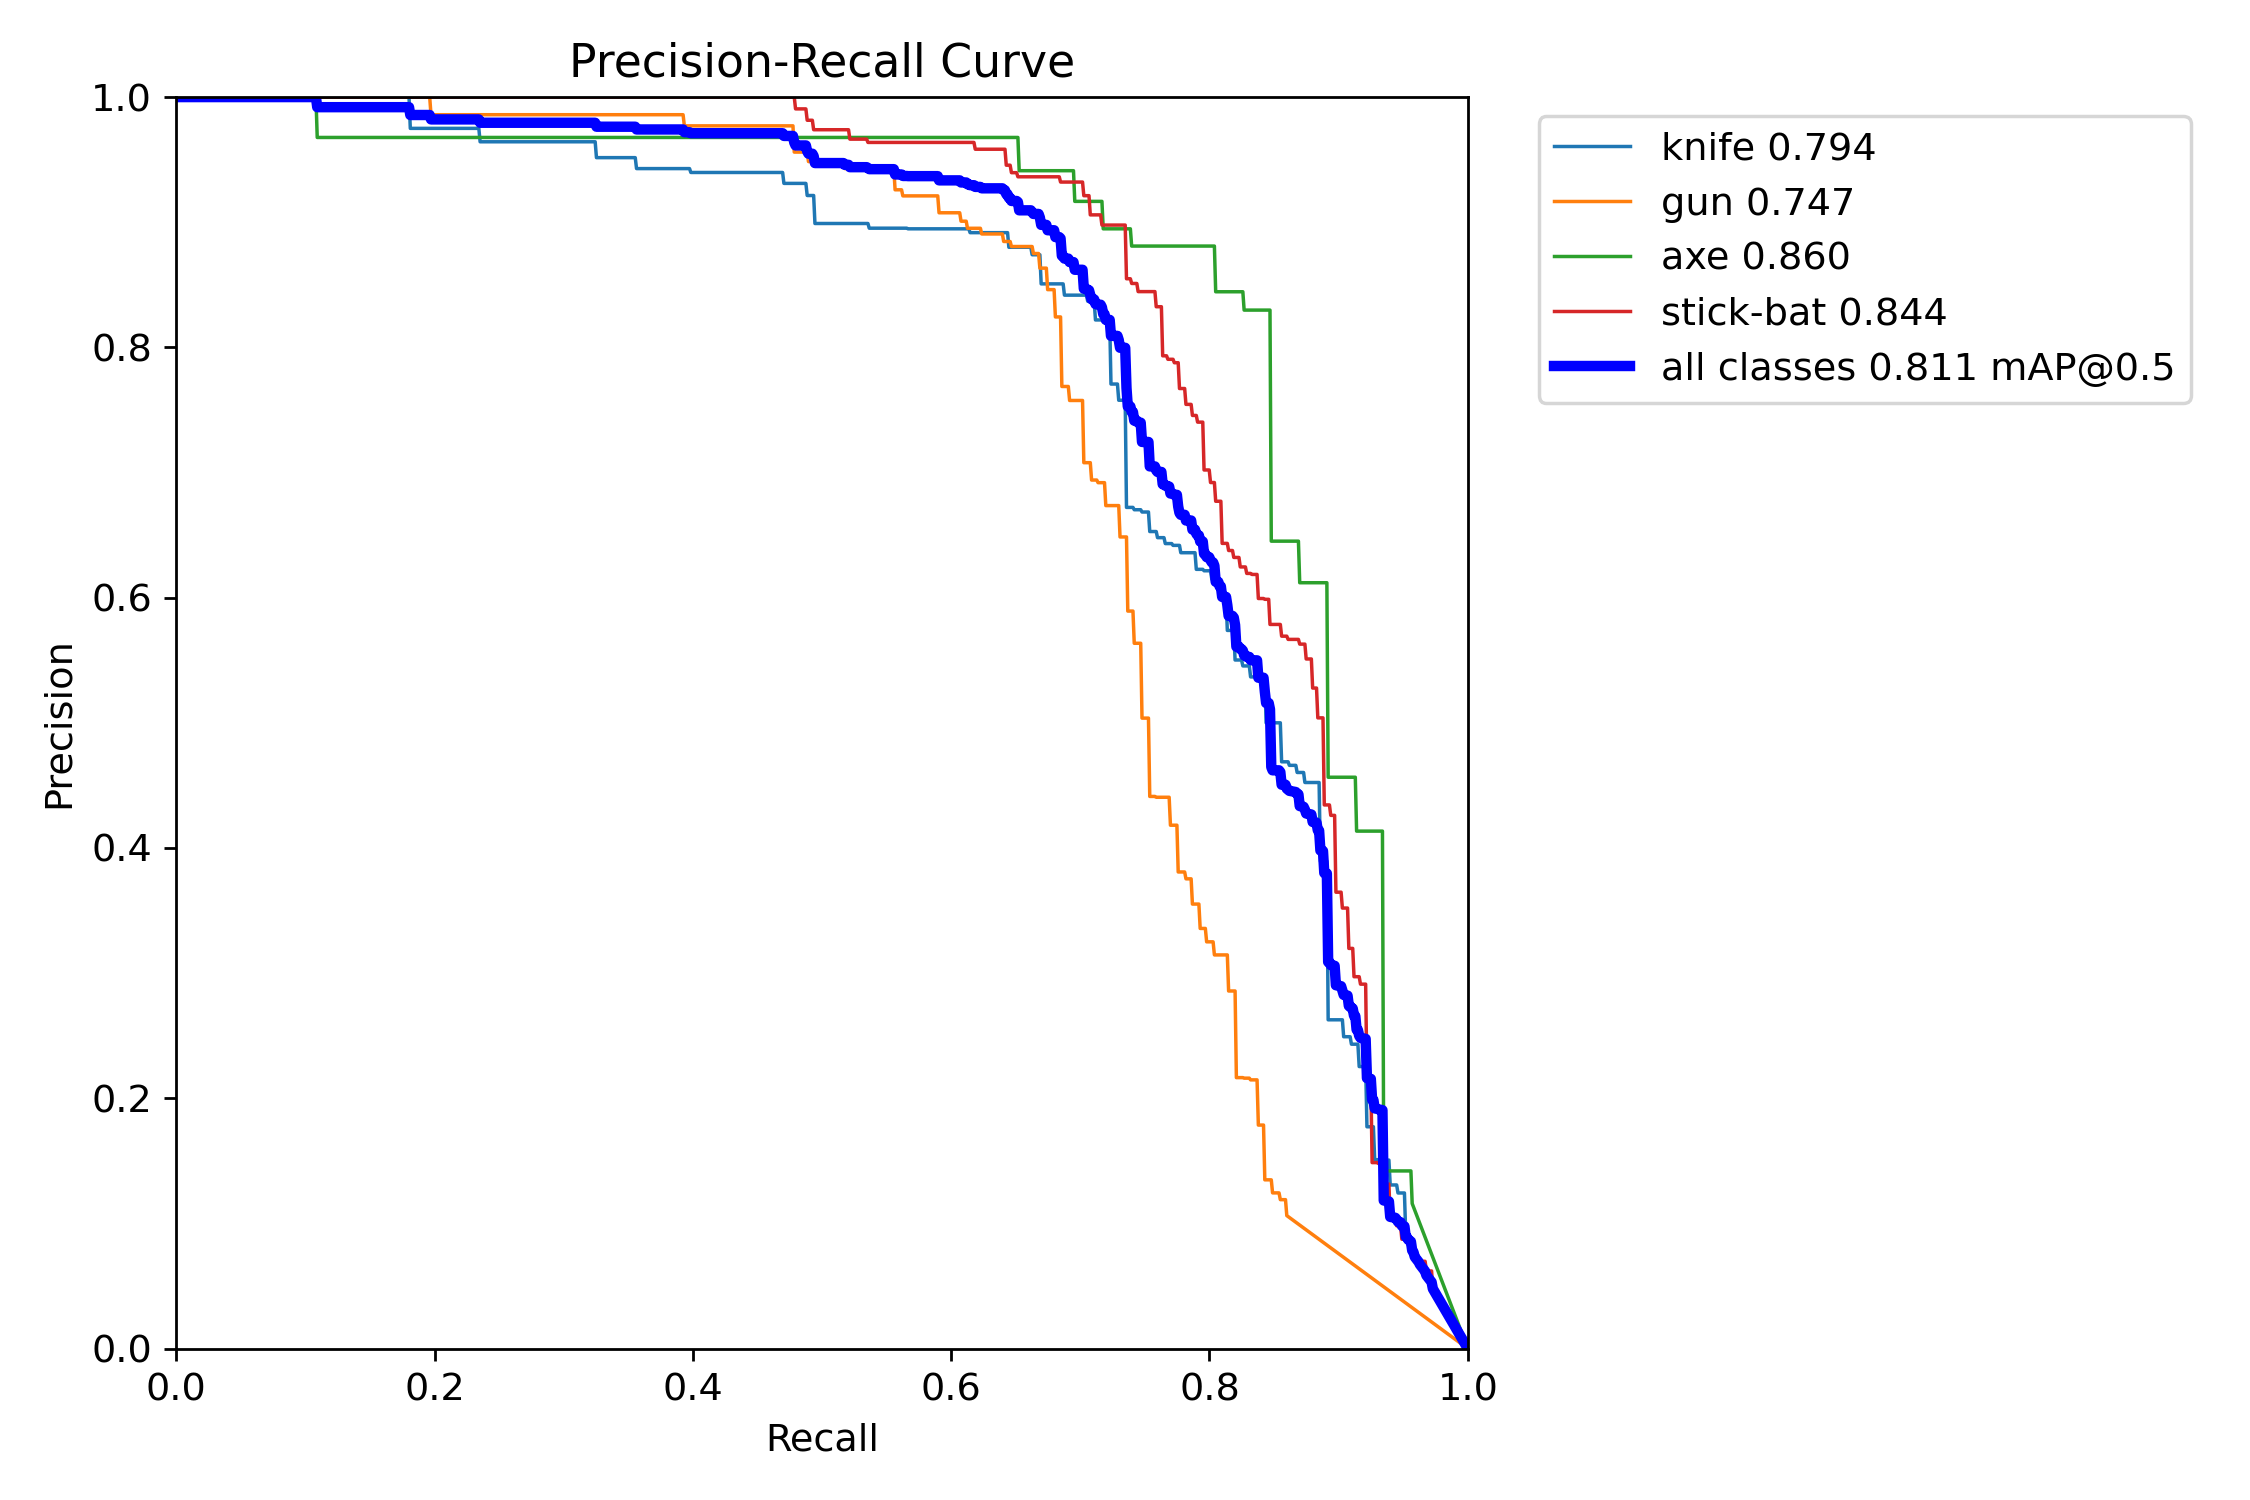

In [ ]:
from IPython.display import Image, display

display(Image(filename='runs/detect/val/F1_curve.png'))
display(Image(filename='runs/detect/val/P_curve.png'))
display(Image(filename='runs/detect/val/R_curve.png'))
display(Image(filename='runs/detect/val/PR_curve.png'))

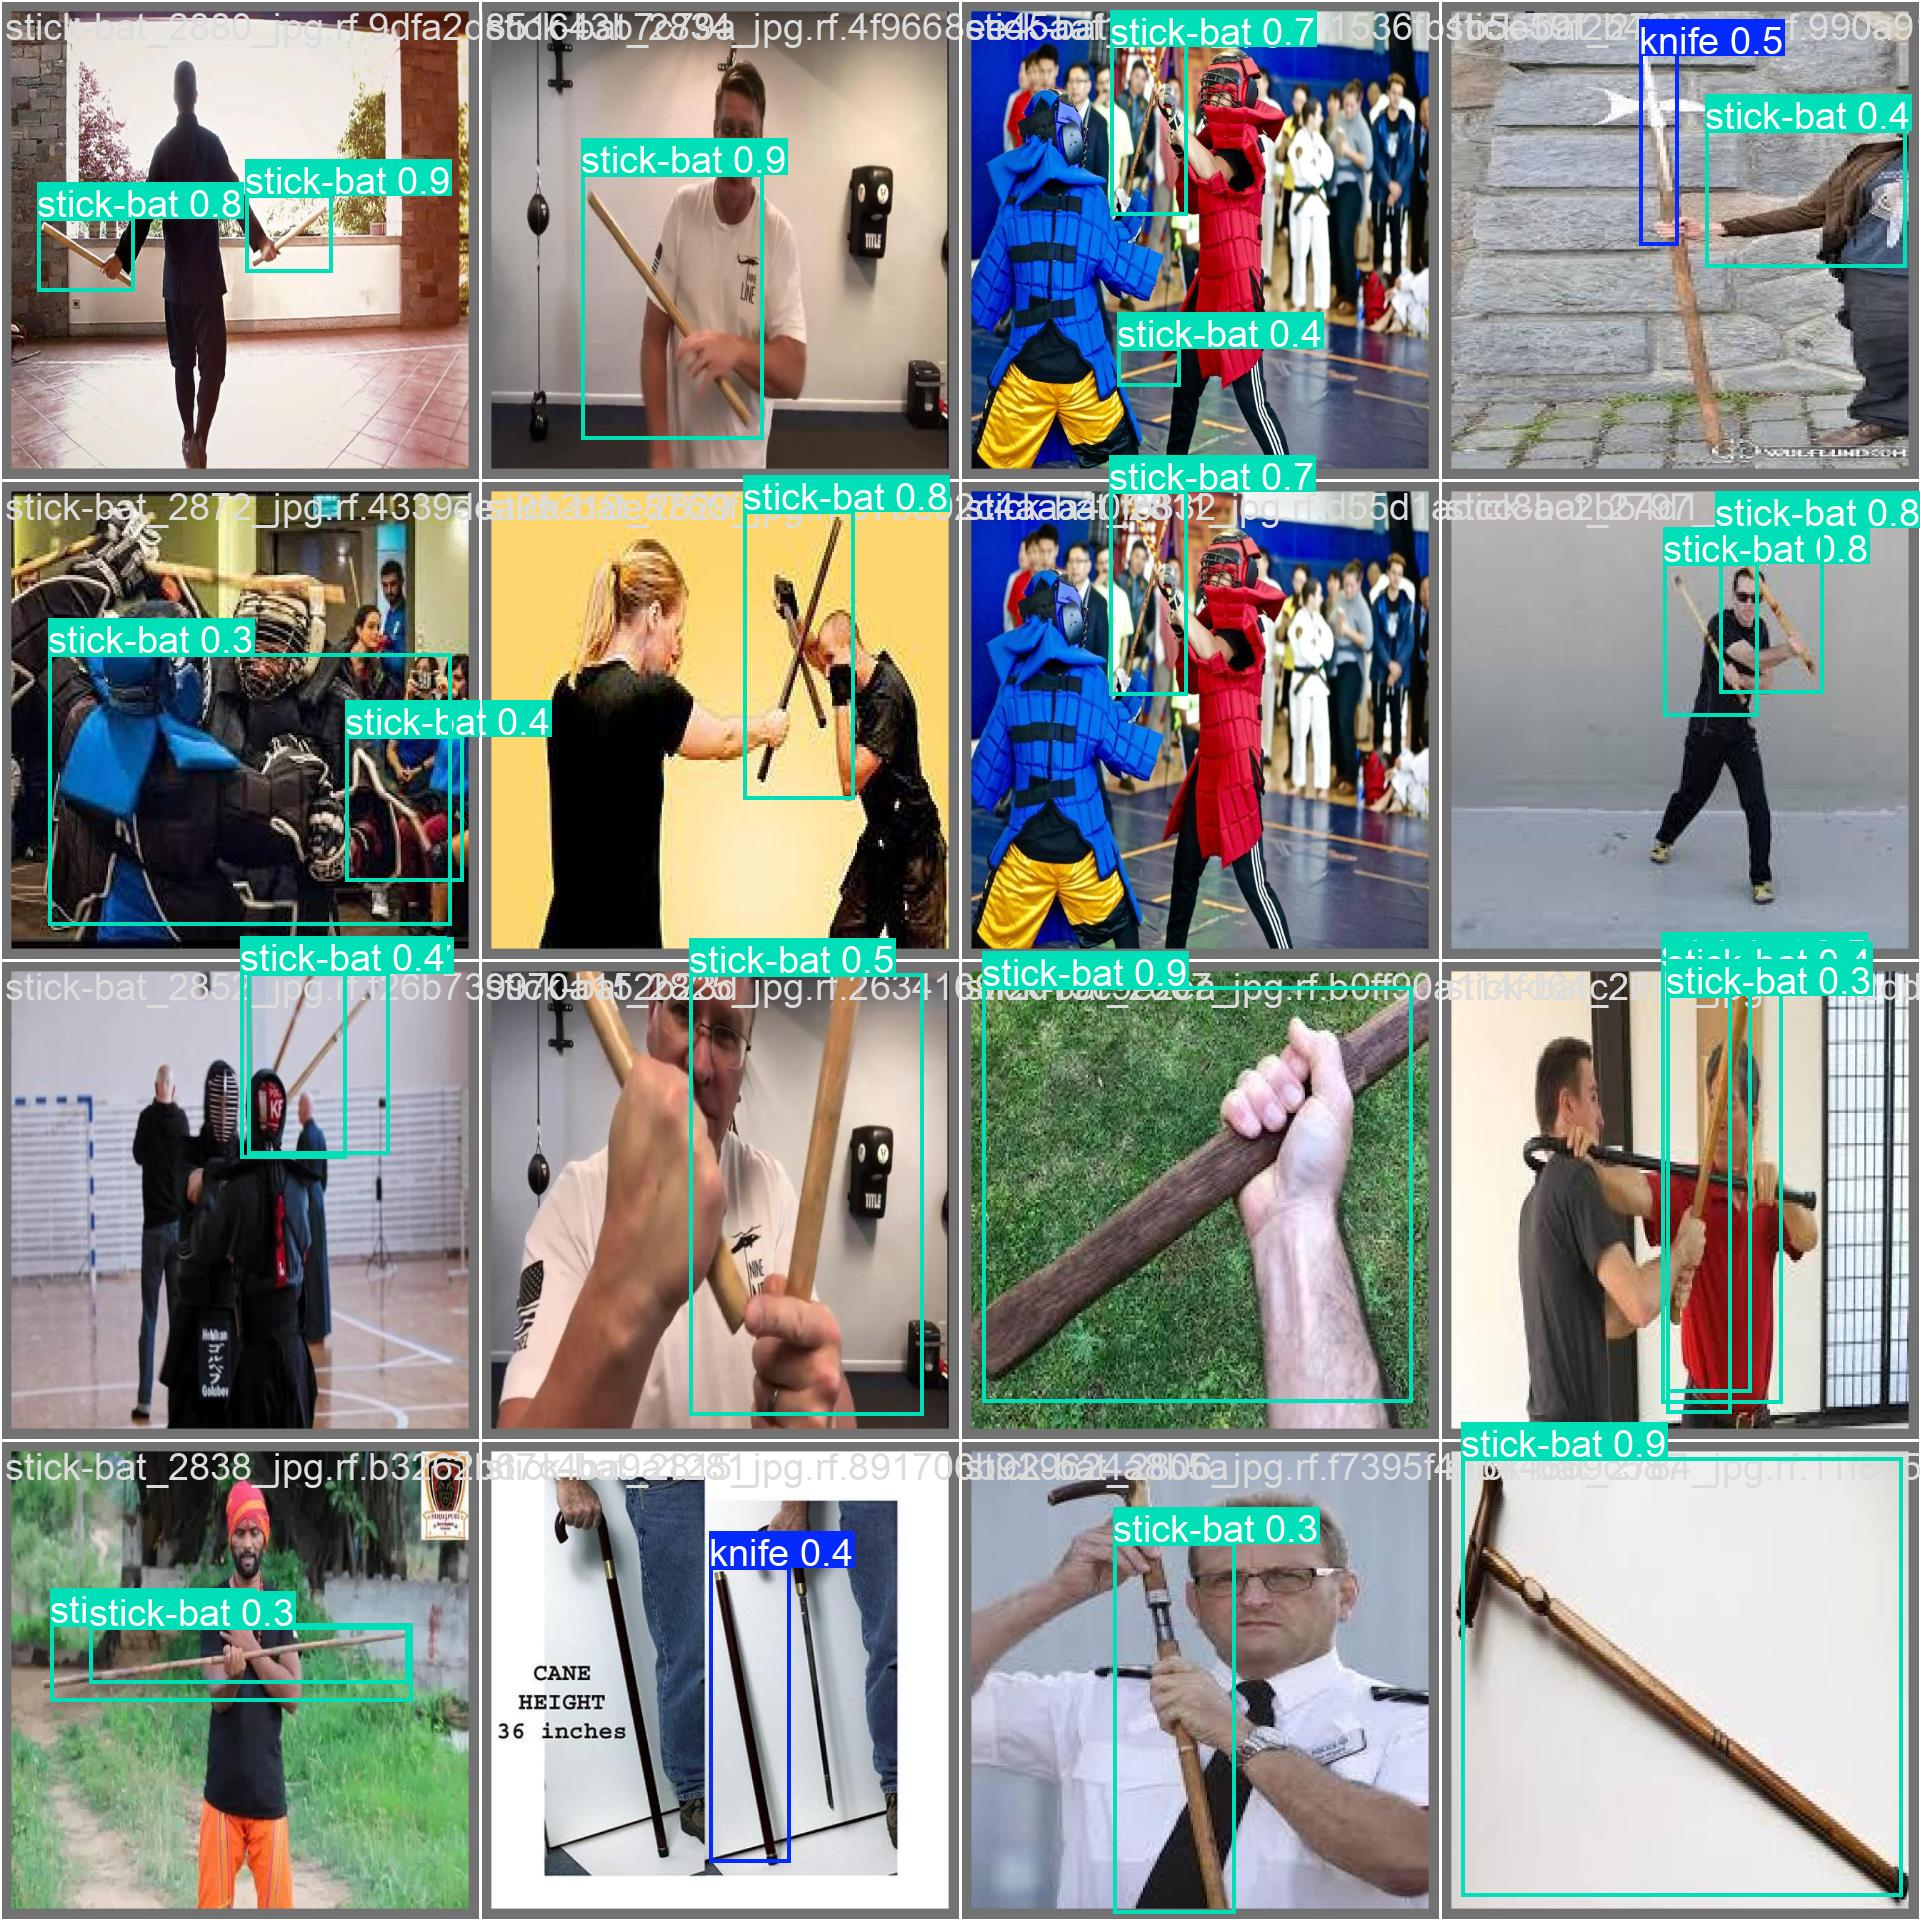

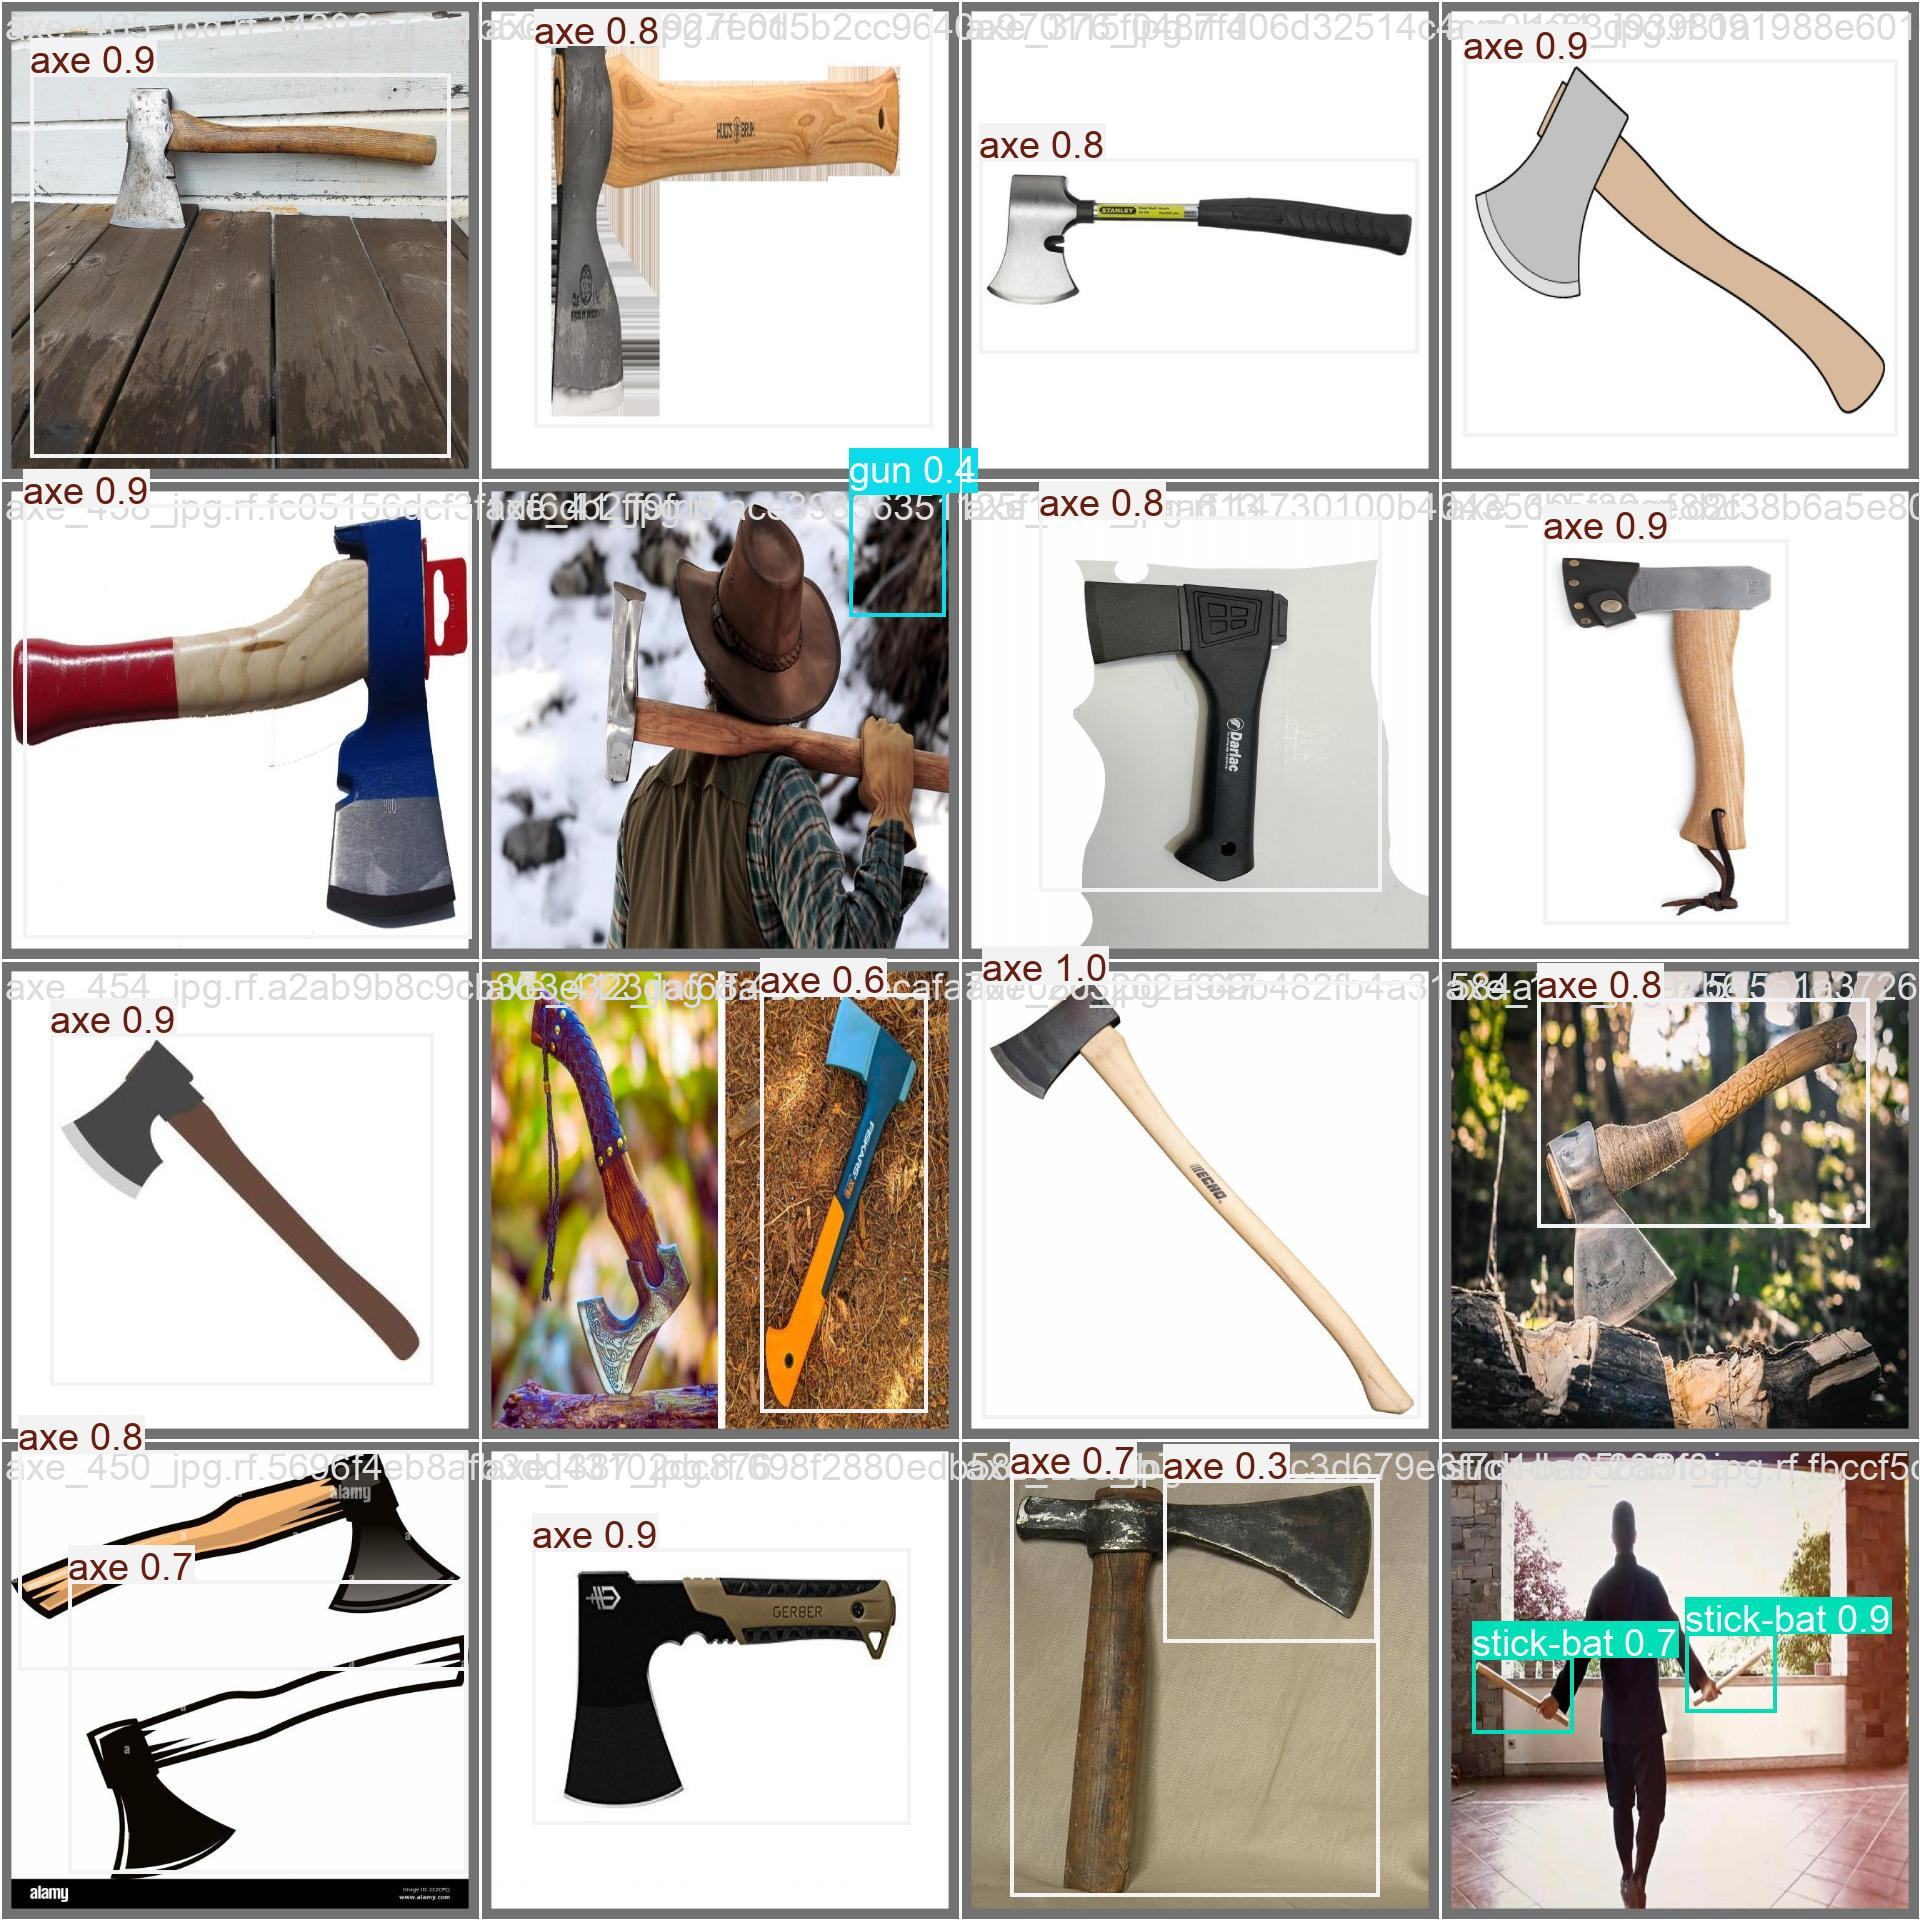

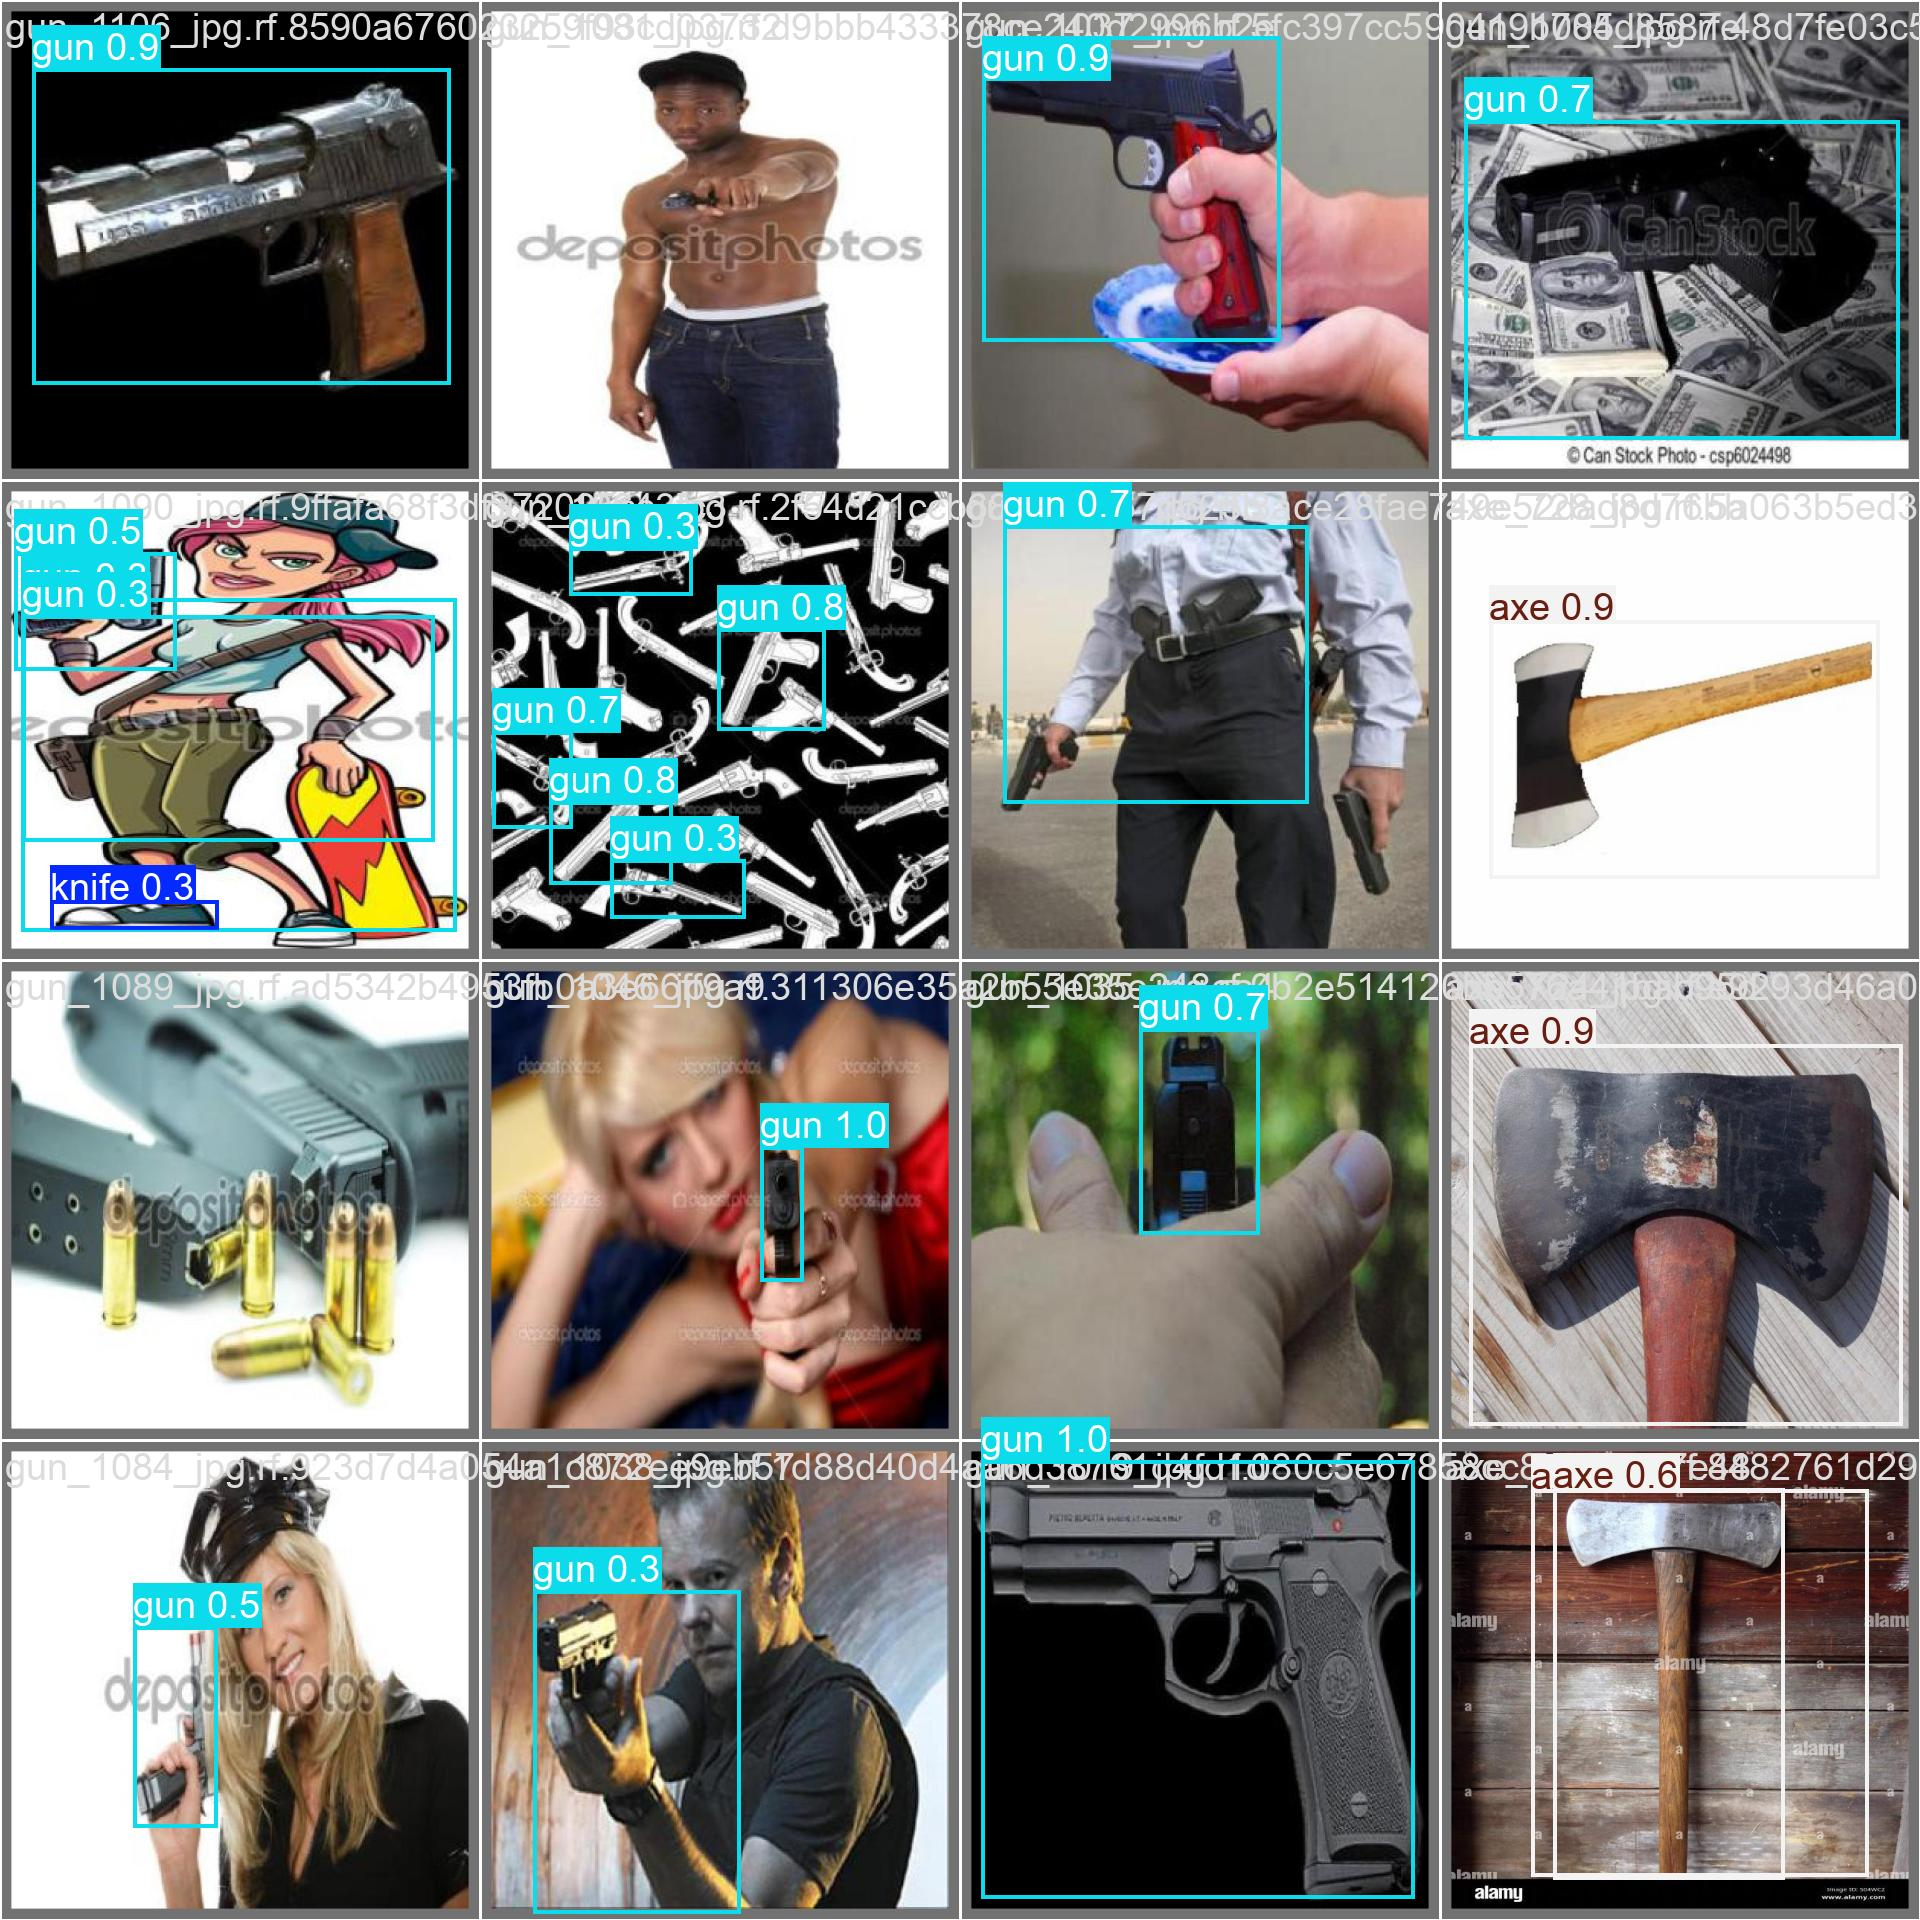

In [ ]:
display(Image(filename='runs/detect/val/val_batch0_pred.jpg'))
display(Image(filename='runs/detect/val/val_batch1_pred.jpg'))
display(Image(filename='runs/detect/val/val_batch2_pred.jpg'))


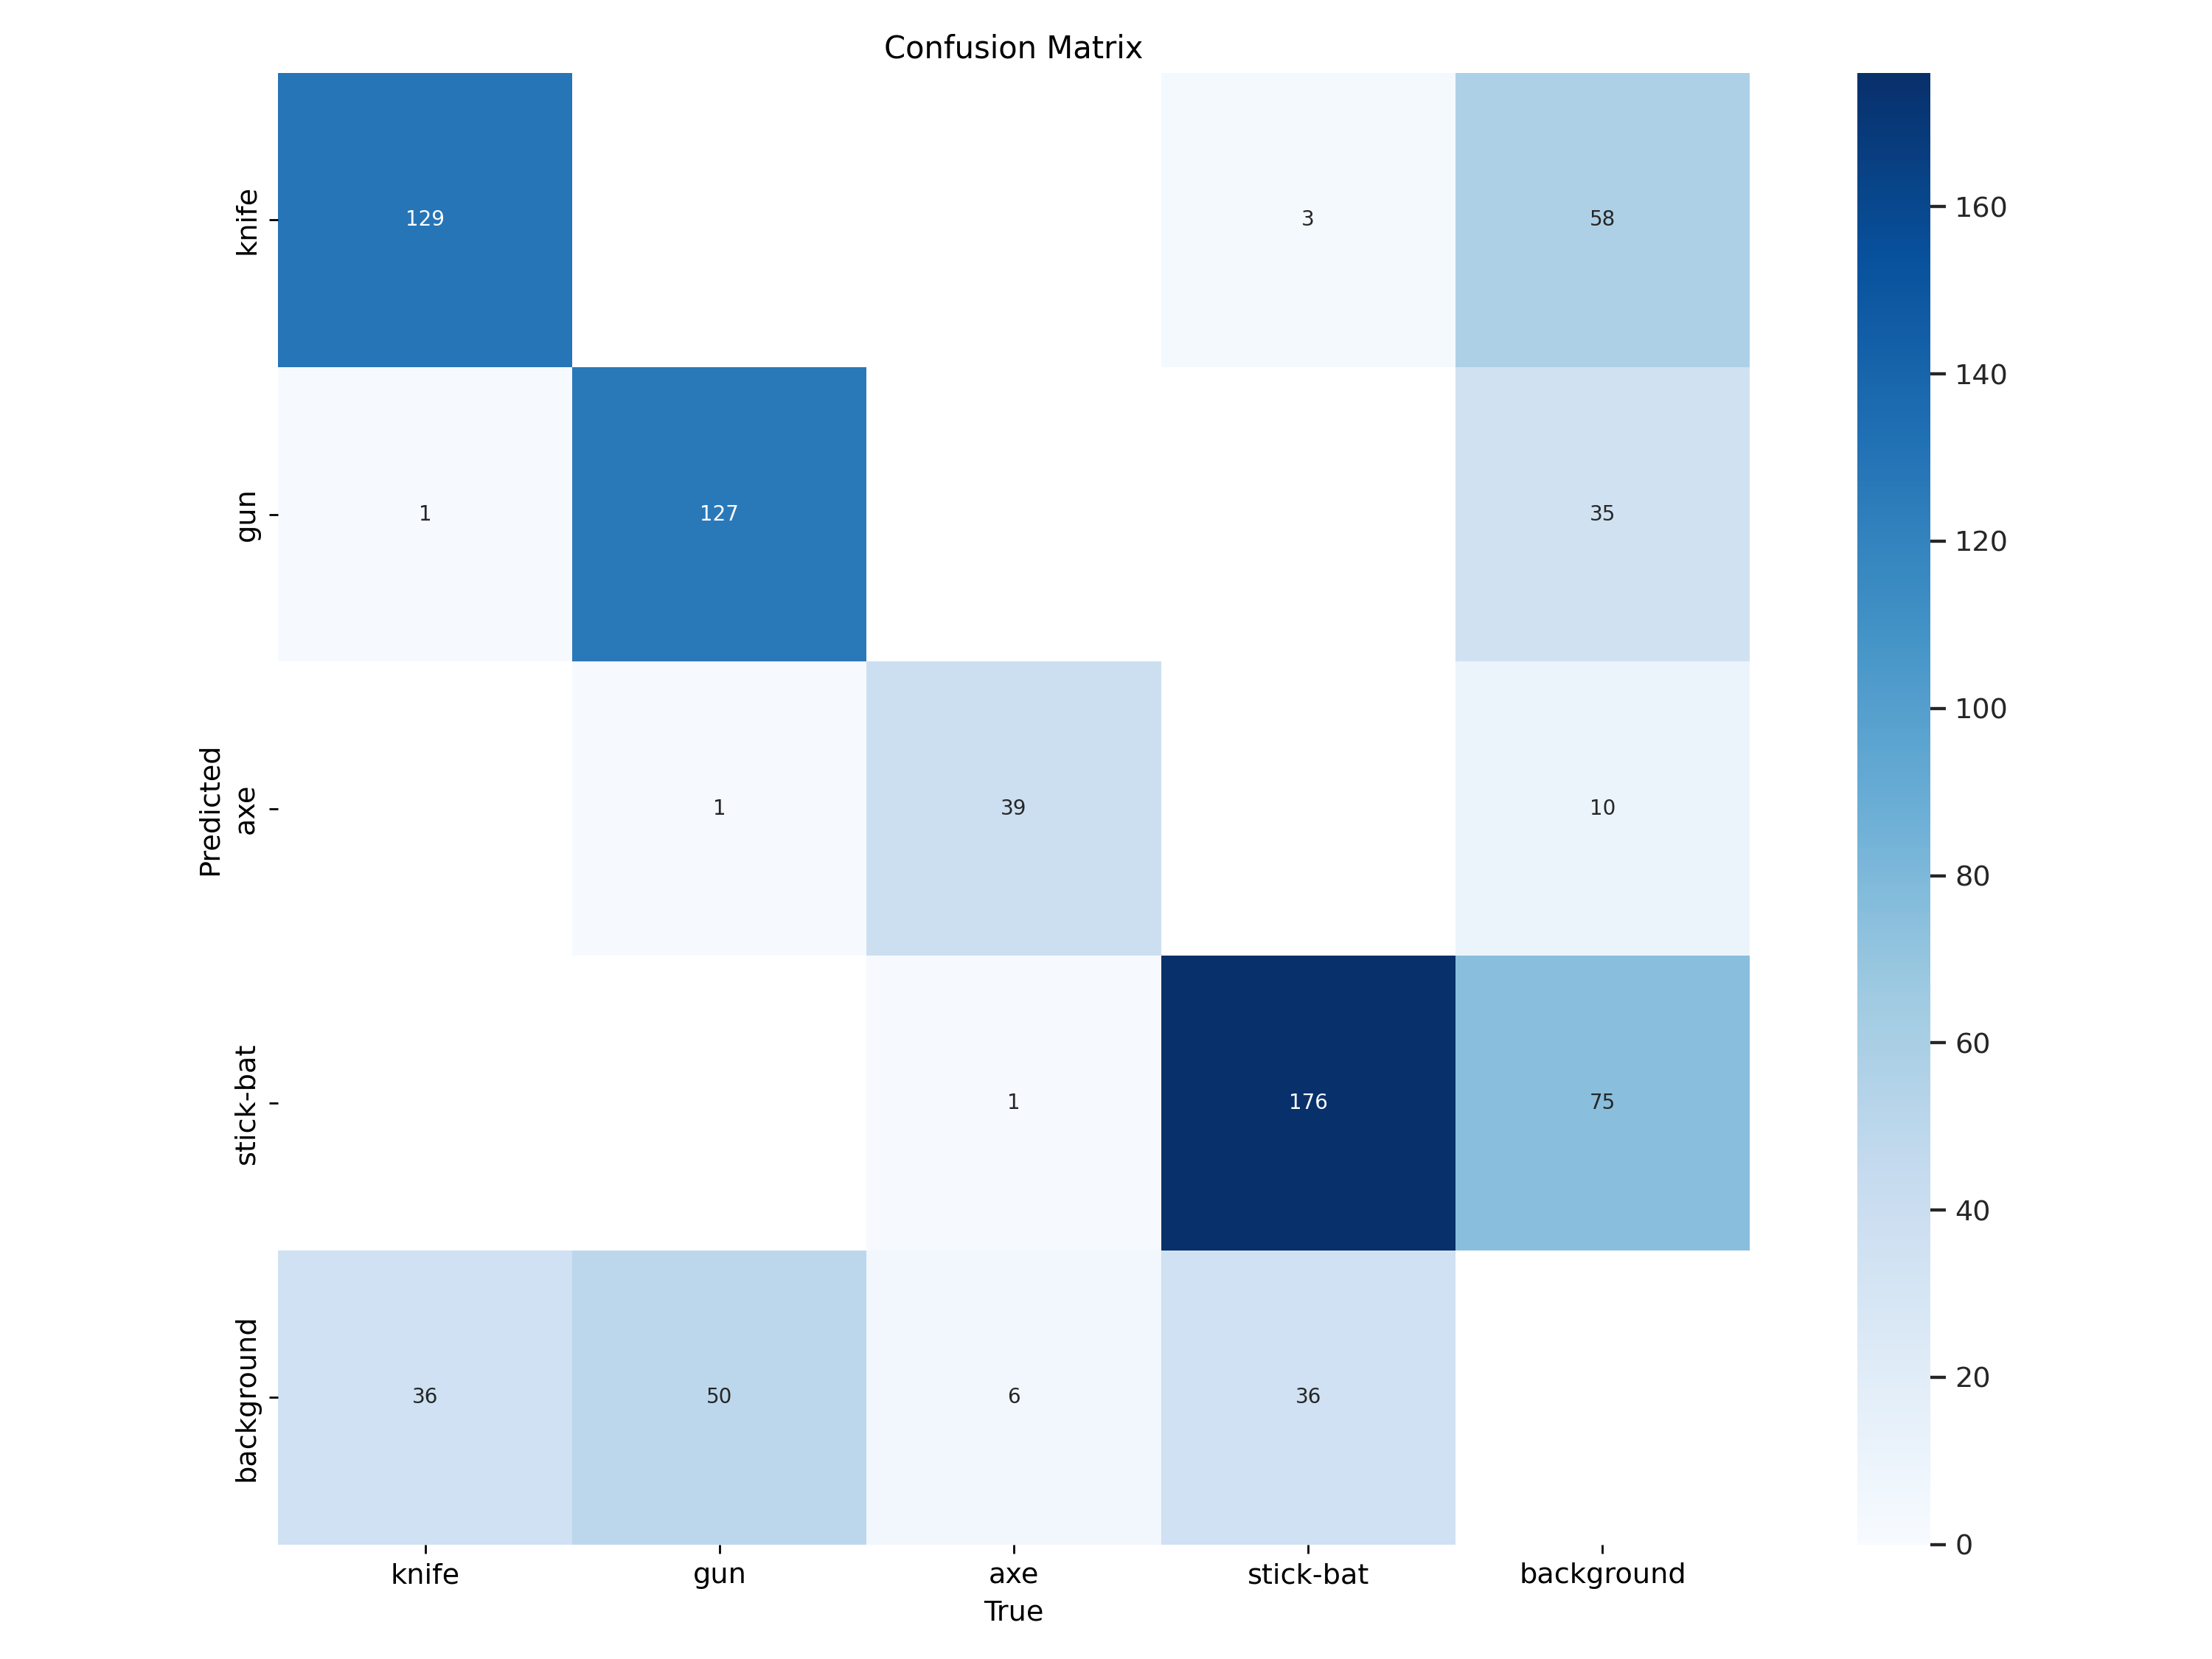

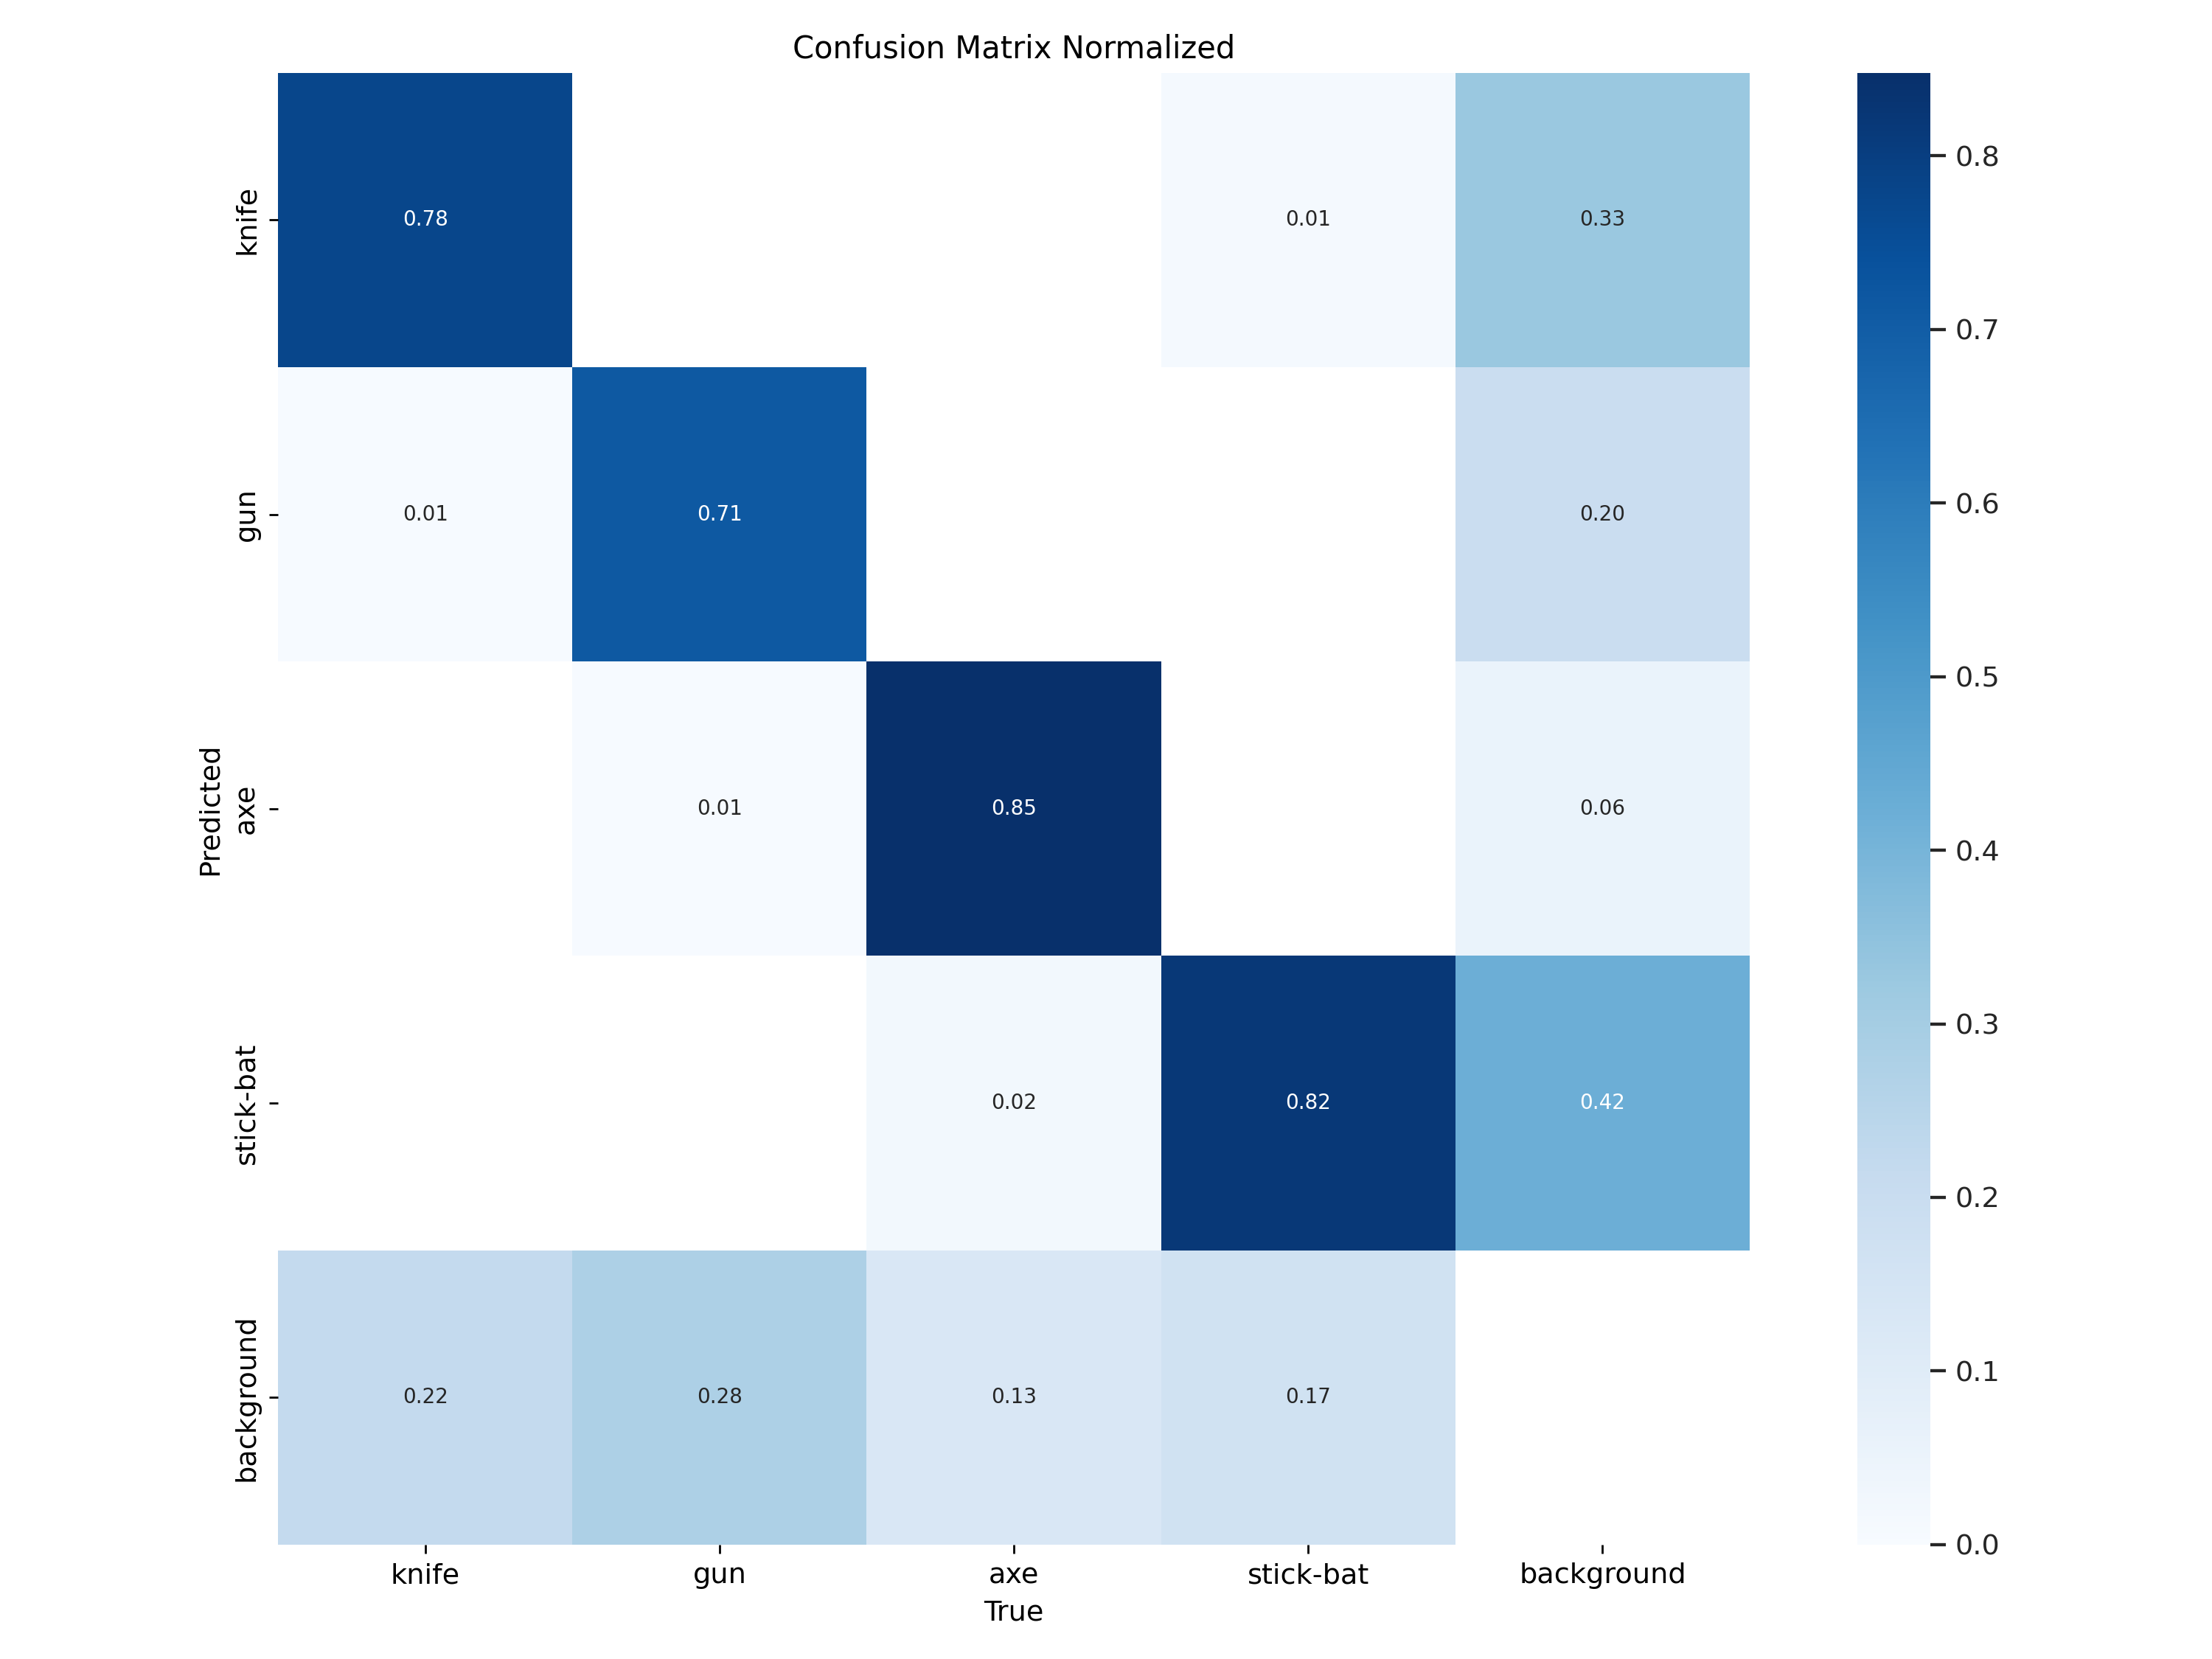

In [ ]:
display(Image(filename='runs/detect/val/confusion_matrix.png'))
display(Image(filename='runs/detect/val/confusion_matrix_normalized.png'))
